In [95]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from functools import reduce
from nltk.stem.wordnet import WordNetLemmatizer
from playsound import playsound
import speech_recognition as sr 
from googletrans import Translator 
from gtts import gTTS 
from pydub import AudioSegment
import os
# geeks:https://www.geeksforgeeks.org/create-a-real-time-voice-translator-using-python/
dic=('afrikaans', 'af', 'albanian', 'sq', 'amharic', 'am',
	'arabic', 'ar', 'armenian', 'hy', 'azerbaijani', 'az',
'basque', 'eu', 'belarusian', 'be', 'bengali', 'bn', 'bosnian',
	'bs', 'bulgarian', 'bg', 'catalan', 'ca',
'cebuano', 'ceb', 'chichewa', 'ny', 'chinese (simplified)',
	'zh-cn', 'chinese (traditional)', 'zh-tw',
'corsican', 'co', 'croatian', 'hr', 'czech', 'cs', 'danish',
	'da', 'dutch', 'nl', 'english', 'en', 'esperanto',
'eo', 'estonian', 'et', 'filipino', 'tl', 'finnish', 'fi',
	'french', 'fr', 'frisian', 'fy', 'galician', 'gl',
'georgian', 'ka', 'german', 'de', 'greek', 'el', 'gujarati',
	'gu', 'haitian creole', 'ht', 'hausa', 'ha',
'hawaiian', 'haw', 'hebrew', 'he', 'hindi', 'hi', 'hmong',
	'hmn', 'hungarian', 'hu', 'icelandic', 'is', 'igbo',
'ig', 'indonesian', 'id', 'irish', 'ga', 'italian', 'it',
	'japanese', 'ja', 'javanese', 'jw', 'kannada', 'kn',
'kazakh', 'kk', 'khmer', 'km', 'korean', 'ko', 'kurdish (kurmanji)',
	'ku', 'kyrgyz', 'ky', 'lao', 'lo',
'latin', 'la', 'latvian', 'lv', 'lithuanian', 'lt', 'luxembourgish',
	'lb', 'macedonian', 'mk', 'malagasy',
'mg', 'malay', 'ms', 'malayalam', 'ml', 'maltese', 'mt', 'maori',
	'mi', 'marathi', 'mr', 'mongolian', 'mn',
'myanmar (burmese)', 'my', 'nepali', 'ne', 'norwegian', 'no',
	'odia', 'or', 'pashto', 'ps', 'persian',
'fa', 'polish', 'pl', 'portuguese', 'pt', 'punjabi', 'pa',
	'romanian', 'ro', 'russian', 'ru', 'samoan',
'sm', 'scots gaelic', 'gd', 'serbian', 'sr', 'sesotho',
	'st', 'shona', 'sn', 'sindhi', 'sd', 'sinhala',
'si', 'slovak', 'sk', 'slovenian', 'sl', 'somali', 'so',
	'spanish', 'es', 'sundanese', 'su',
'swahili', 'sw', 'swedish', 'sv', 'tajik', 'tg', 'tamil',
	'ta', 'telugu', 'te', 'thai', 'th', 'turkish', 'tr',
'ukrainian', 'uk', 'urdu', 'ur', 'uyghur', 'ug', 'uzbek',
	'uz', 'vietnamese', 'vi', 'welsh', 'cy', 'xhosa', 'xh',
'yiddish', 'yi', 'yoruba', 'yo', 'zulu', 'zu')

# Capture Voice
# takes command through microphone
def takecommand(language, record = True, filename = None):
    r = sr.Recognizer()
    if record:
        with sr.Microphone() as source:
            print("listening.....")
            r.pause_threshold = 1
            audio = r.listen(source)
    else:
        with sr.AudioFile(filename) as source:
            audio = r.record(source)
	#print('done')
    try:
        print("Recognizing.....")
        query = r.recognize_google(audio, language=language)
        print(f"user said {query}\n")
    except Exception as e:
        print("say that again please.....")
        return "None"
    return query
def play_video(audio):
    playsound(audio)

In [2]:
def person(vision, man_dim, scaling, gender, child = False):
    x_body,x_leg, x_arm = [], [], []
    y_body,y_leg, y_arm = [], [], []

    x_left_eye, x_right_eye = [], []
    x_eye, y_eye = [], []
    
    #head 
    theta = np.linspace( 0 , 2 * np.pi , 150 )
    a = (man_dim['head radius'] * np.cos( theta )) * scaling  + man_dim['head centroid'][0]
    b = (man_dim['head radius'] * np.sin( theta )) * scaling  + man_dim['head centroid'][1]

    a_nose = []; b_nose = []
    a_mouth = []; b_mouth = []
    if vision == 'right':
        x_leg = np.array([man_dim['root'][0], man_dim['root'][0]]) * scaling 
        y_leg = np.array([man_dim['root'][1], man_dim['root'][1] + 2]) * scaling
        if man_dim['action'] == 'bow':
            x_leg = np.array([man_dim['root'][0], man_dim['root'][0]]) * scaling 
            y_leg = np.array([man_dim['root'][1], man_dim['root'][1] + 2]) * scaling
            x_body = np.array([man_dim['root'][0], man_dim['head centroid'][0] - man_dim['head radius'] * np.sqrt(2)/2 ]) * scaling
            y_body = np.array([man_dim['root'][1] + 2, man_dim['head centroid'][1] - man_dim['head radius'] * np.sqrt(2)/2 ]) * scaling
            if man_dim['holding']:
                x_arm = np.array([man_dim['root'][0] + 1, man_dim['root'][0] + 2]) * scaling
                y_arm = np.array([man_dim['root'][1] + 3, man_dim['root'][1] + 2]) * scaling
            else:
                x_arm = np.array([man_dim['root'][0], man_dim['root'][0] + 1]) * scaling
                y_arm = np.array([man_dim['root'][1] + 2, man_dim['root'][1] + 2]) * scaling
            a_nose = np.array([man_dim['head centroid'][0] + man_dim['head radius']*np.sqrt(2)/2, man_dim['head centroid'][0] + man_dim['head radius']]) * scaling            
            b_nose = np.array([man_dim['head centroid'][1] - man_dim['head radius']*np.sqrt(2)/2, man_dim['head centroid'][1] - man_dim['head radius']]) * scaling
        elif man_dim['action'] == 'lie' or man_dim['action'] == 'lying':
            x_leg = np.array([man_dim['root'][0], man_dim['root'][0] - 2]) * scaling 
            y_leg = np.array([man_dim['root'][1], man_dim['root'][1]]) * scaling
            x_body = np.array([man_dim['root'][0] - 2, man_dim['head centroid'][0] + man_dim['head radius']]) * scaling
            y_body = np.array([man_dim['root'][1], man_dim['root'][1]]) * scaling
            x_arm = np.array([man_dim['root'][0] - 3, man_dim['root'][0] - 3 + np.sqrt(2)/2]) * scaling
            y_arm = np.array([man_dim['root'][1], man_dim['root'][1] + np.sqrt(2)/2]) * scaling
            a_nose = np.array([man_dim['head centroid'][0], man_dim['head centroid'][0]]) * scaling
            b_nose = np.array([man_dim['head centroid'][1] + man_dim['head radius'], man_dim['head centroid'][1] + man_dim['head radius'] + np.sqrt(2)/2]) * scaling
        else:
            x_body = np.array([man_dim['root'][0], man_dim['root'][0]]) * scaling
            y_body = np.array([man_dim['root'][1] + 2, man_dim['root'][1] + 4]) * scaling
            if man_dim['holding']:
                x_arm = np.array([man_dim['root'][0], man_dim['root'][0] + 1]) * scaling
                y_arm = np.array([man_dim['root'][1] + 3, man_dim['root'][1] + 3]) * scaling
            else:
                x_arm = []
                y_arm = []
                if man_dim['arm']:
                    x_arm = np.array([man_dim['root'][0], man_dim['root'][0] + np.sqrt(2)/2]) * scaling
                    y_arm = np.array([man_dim['root'][1] + 3, man_dim['root'][1] + 3 - np.sqrt(2)/2]) * scaling
                else:
                    x_arm =  np.array([man_dim['root'][0], man_dim['root'][0]]) * scaling
                    y_arm = np.array([man_dim['root'][1] + 3, man_dim['root'][1] + 3]) * scaling
                #if not man_dim['nose']:
                #    return {'x_head': a, 'y_head':b, "x_body": x_body, "y_body": y_body, "x_arm": x_arm, "y_arm": y_arm, "x_leg": x_leg, "y_leg": y_leg}
                a_nose = np.array([man_dim['head centroid'][0] + man_dim['head radius'], man_dim['head centroid'][0] + man_dim['head radius'] + np.sqrt(2)/2]) * scaling
                b_nose = np.array([man_dim['head centroid'][1], man_dim['head centroid'][1]]) * scaling
            
        return {'x_head': a, 'y_head':b, "x_nose": a_nose, "y_nose":b_nose, "x_body": x_body, "y_body": y_body, "x_arm": x_arm, "y_arm": y_arm, "x_leg": x_leg, "y_leg": y_leg}

    elif vision == 'front':
        #eye
        x_left_eye = np.array([man_dim['head centroid'][0] - 0.25, man_dim['head centroid'][0] - 0.25]) * scaling
        x_right_eye = np.array([man_dim['head centroid'][0] + 0.25, man_dim['head centroid'][0] + 0.25]) * scaling
        y_eye = np.array([man_dim['head centroid'][1],        man_dim['head centroid'][1] + 0.3]) * scaling
        #nose 
        a_nose = (man_dim['nose radius'] * np.cos( theta ) + man_dim['head centroid'][0]) * scaling
        b_nose = (man_dim['nose radius'] * np.sin( theta ) + man_dim['head centroid'][1]) * scaling
        
        # mouth
        mouth_theta = np.linspace((-5/6)*np.pi , -np.pi/6, 150)
        a_mouth = 0.1 *scaling* np.cos(mouth_theta ) + man_dim['head centroid'][0] * scaling
        b_mouth= 0.1 *scaling* np.sin(mouth_theta ) + (man_dim['head centroid'][1] - 0.5) * scaling
        # arm
        x_arm = np.array([man_dim['head centroid'][0] -1, man_dim['head centroid'][0], man_dim['head centroid'][0] + 1])*scaling
        y_arm = np.array([man_dim['head centroid'][1] -man_dim['head radius'] -1, man_dim['head centroid'][1]-man_dim['head radius'], man_dim['head centroid'][1] -man_dim['head radius'] -1])*scaling
        if child:
            x_arm = np.array([man_dim['head centroid'][0] -0.5, man_dim['head centroid'][0], man_dim['head centroid'][0] + 0.5])*scaling
            y_arm = np.array([man_dim['head centroid'][1] -man_dim['head radius'] -0.5, man_dim['head centroid'][1]-man_dim['head radius'], man_dim['head centroid'][1] -man_dim['head radius'] -0.5])*scaling
            x_body = np.array([man_dim['head centroid'][0], man_dim['head centroid'][0]]) * scaling 
            y_body = np.array([man_dim['head centroid'][1] - man_dim['head radius'], man_dim['head centroid'][1] - man_dim['head radius'] - 1]) * scaling
            x_leg = np.array([man_dim['head centroid'][0]-0.15, man_dim['head centroid'][0], man_dim['head centroid'][0] + 0.15]) * scaling
            y_leg = np.array([0, man_dim['head centroid'][1]-2, 0]) * scaling
            return {'x_head': a, 'y_head':b, 'x_left_eye': x_left_eye, "x_right_eye": x_right_eye, "y_eye": y_eye, "x_nose": a_nose, "y_nose":b_nose, "x_mouth": a_mouth, "y_mouth": b_mouth, "x_body": x_body, "y_body": y_body, "x_arm": x_arm, "y_arm": y_arm, "x_leg": x_leg, "y_leg": y_leg}
        else:
            if gender is ('woman' or 'women'):
                print('women')
                x_body = np.array([man_dim['head centroid'][0], man_dim['head centroid'][0], man_dim['head centroid'][0] -1, man_dim['head centroid'][0] +1, man_dim['head centroid'][0]]) * scaling 
                y_body = np.array([man_dim['head centroid'][1] -1, man_dim['head centroid'][1] - 2, man_dim['head centroid'][1] -3, man_dim['head centroid'][1] -3, man_dim['head centroid'][1] -2]) * scaling
                x_leg = np.array([man_dim['head centroid'][0], man_dim['head centroid'][0]]) * scaling
                y_leg = np.array([man_dim['head centroid'][1]-3, 0]) * scaling
                return {'x_head': a, 'y_head':b, 'x_left_eye': x_left_eye, "x_right_eye": x_right_eye, "y_eye": y_eye, "x_nose": a_nose, "y_nose":b_nose, "x_mouth": a_mouth, "y_mouth": b_mouth, "x_body": x_body, "y_body": y_body, "x_arm": x_arm, "y_arm": y_arm, "x_leg": x_leg, "y_leg": y_leg}
            else:
                x_body = np.array([man_dim['head centroid'][0], man_dim['head centroid'][0]]) * scaling 
                y_body = np.array([man_dim['head centroid'][1] - man_dim['head radius'], man_dim['head centroid'][1] - man_dim['head radius'] - 1]) * scaling
                x_leg = np.array([man_dim['head centroid'][0] -1, man_dim['head centroid'][0], man_dim['head centroid'][0] + 1])*scaling
                y_leg = np.array([0, man_dim['head centroid'][1]-2, 0])*scaling
        
                return {'x_head': a, 'y_head':b, 'x_left_eye': x_left_eye, "x_right_eye": x_right_eye, "y_eye": y_eye, "x_nose": a_nose, "y_nose":b_nose, "x_mouth": a_mouth, "y_mouth": b_mouth, "x_body": x_body, "y_body": y_body, "x_arm": x_arm, "y_arm": y_arm, "x_leg": x_leg, "y_leg": y_leg}
    elif vision == 'left':
        x_leg = np.array([man_dim['root'][0], man_dim['root'][0]]) * scaling 
        y_leg = np.array([man_dim['root'][1], man_dim['root'][1] + 2]) * scaling
        if man_dim['action'] == 'bow':
            # man_dim['root'][0] is negative
            x_body = np.array([man_dim['root'][0], man_dim['head centroid'][0] + man_dim['head radius'] * np.sqrt(2)/2 ]) * scaling 
            y_body = np.array([man_dim['root'][1] + 2, man_dim['head centroid'][1] - man_dim['head radius'] * np.sqrt(2)/2 ]) * scaling
            if man_dim['holding']:
                x_arm = np.array([man_dim['root'][0] - 1, man_dim['root'][0] - 2]) * scaling
                y_arm = np.array([man_dim['root'][1] - 3, man_dim['root'][1] - 2]) * scaling
            else:
                x_arm = np.array([man_dim['root'][0], man_dim['root'][0] - 1]) * scaling
                y_arm = np.array([man_dim['root'][1] + 2, man_dim['root'][1] + 2]) * scaling
            a_nose = np.array([man_dim['head centroid'][0] + man_dim['head radius']*np.sqrt(2)/2, man_dim['head centroid'][0] + man_dim['head radius']]) * scaling            
            b_nose = np.array([man_dim['head centroid'][1] - man_dim['head radius']*np.sqrt(2)/2, man_dim['head centroid'][1] - man_dim['head radius']]) * scaling
        elif man_dim['action'] == 'lie' or man_dim['action'] == 'lying':
            x_leg = np.array([man_dim['root'][0], man_dim['root'][0] + 2]) * scaling 
            y_leg = np.array([man_dim['root'][1], man_dim['root'][1]]) * scaling
            x_body = np.array([man_dim['root'][0] + 2, man_dim['head centroid'][0] - man_dim['head radius']]) * scaling
            y_body = np.array([man_dim['root'][1], man_dim['root'][1]]) * scaling
            x_arm = np.array([man_dim['root'][0] + 3 - np.sqrt(2)/2, man_dim['root'][0] + 3]) * scaling
            y_arm = np.array([man_dim['root'][1] + np.sqrt(2)/2, man_dim['root'][1]]) * scaling
            a_nose = np.array([man_dim['head centroid'][0], man_dim['head centroid'][0]]) * scaling
            b_nose = np.array([man_dim['head centroid'][1] + man_dim['head radius'], man_dim['head centroid'][1] + man_dim['head radius'] + np.sqrt(2)/2]) * scaling
        else:
            x_body = np.array([man_dim['root'][0], man_dim['root'][0]]) * scaling
            y_body = np.array([man_dim['root'][1] + 2, man_dim['root'][1] + 4]) * scaling
            if man_dim['holding']:
                x_arm = np.array([man_dim['root'][0], man_dim['root'][0] - 1]) * scaling
                y_arm = np.array([man_dim['root'][1] + 3, man_dim['root'][1] + 3]) * scaling
            else:
                x_arm = np.array([man_dim['root'][0], man_dim['root'][0]]) * scaling
                y_arm = np.array([man_dim['root'][1] + 4, man_dim['root'][1] + 4]) * scaling
                if man_dim['arm']:
                    x_arm = np.array([man_dim['root'][0], man_dim['root'][0] - np.sqrt(2)/2]) * scaling
                    y_arm = np.array([man_dim['root'][1] + 3, man_dim['root'][1] + 3 - np.sqrt(2)/2]) * scaling
            a_nose = np.array([man_dim['head centroid'][0] - man_dim['head radius'], man_dim['head centroid'][0] - man_dim['head radius'] - np.sqrt(2)/2]) * scaling
            b_nose = np.array([man_dim['head centroid'][1], man_dim['head centroid'][1]]) * scaling
        return {'x_head': a, 'y_head':b, "x_nose": a_nose, "y_nose":b_nose, "x_body": x_body, "y_body": y_body, "x_arm": x_arm, "y_arm": y_arm, "x_leg": x_leg, "y_leg": y_leg}

In [3]:
def tap(origin, length, height, bottom_width, direction, scale):
    mid_pt = 0.5 * height
    x_body = np.array([origin[0], origin[0], origin[0] + length, origin[0] + length, origin[0] + bottom_width, origin[0] + bottom_width, origin[0]]) * scale
    if direction == 'left':
        x_body = np.array([origin[0], origin[0], origin[0] - length, origin[0] - length, origin[0] - bottom_width, origin[0] - bottom_width, origin[0]]) * scale
    y_body = np.array([origin[1], origin[1] + height, origin[1] + height, origin[1] + mid_pt, origin[1] + mid_pt, origin[1], origin[1]]) * scale
    x_valve = np.array([origin[0] + length/2, origin[0] + length/2]) * scale
    y_valve = np.array([origin[1] + height, origin[1] + height + 0.5]) * scale
    x_handle = np.array([origin[0] + length/2 - 0.2, origin[0] + length/2 + 0.2]) * scale
    y_handle = np.array([origin[1] + height + 0.5, origin[1] + height + 0.5]) * scale
    return {'x_body': x_body, 'y_body': y_body, 'x_valve': x_valve, "y_valve": y_valve, 'x_handle':x_handle, 'y_handle':y_handle}
def chair(origin, direction, scale):
    x_back = np.array([origin[0], origin[0]]) * scale
    y_back = np.array([origin[1], origin[1] + 2]) * scale
    x_seat = np.array([])
    y_seat = np.array([])
    if direction == 'left':
        x_seat = np.array([origin[0], origin[0] - 1, origin[0] - 1]) * scale
        y_seat = np.array([origin[1] + 1, origin[1] + 1, origin[1]]) * scale
    elif direction == 'right':
        x_seat = np.array([origin[0], origin[0] + 1, origin[0] + 1]) * scale
        y_seat = np.array([origin[1] + 1, origin[1] + 1, origin[1]]) * scale

    return {'x_back':x_back, 'y_back': y_back, 'x_seat': x_seat, 'y_seat': y_seat}
def table(origin, length, scale, height):
    # leg
    x_leg_left = np.array([origin[0], origin[0]]) * scale; x_leg_right = np.array([origin[0] + length, origin[0] + length])* scale; y_leg = np.array([origin[1], origin[1] + height])* scale
    # tab
    x_tab = np.array([origin[0] - 0.5, origin[0] + length + 0.5]); y_tab = np.array([origin[1] + height, origin[1] + height]) * scale
    return {"x_leg_left":x_leg_left, "x_leg_right":x_leg_right, "y_leg": y_leg, "x_tab": x_tab, "y_tab": y_tab}
def bed(origin, direction, height, length, gap, scale):
    x_leg_left = np.array([origin[0], origin[0]])* scale 
    x_leg_right =np.array([origin[0] + length, origin[0]+length])* scale 
    y_leg_left =np.array([])
    y_leg_right = np.array([])
    if direction=='left':
        # foot to left
        y_leg_right = np.array([origin[1], origin[1]+height + 1])* scale
        y_leg_left = np.array([origin[1], origin[1]+height])* scale
    if direction=='right':
        # foot to right
        y_leg_left = np.array([origin[1], origin[1]+height + 1])* scale
        y_leg_right = np.array([origin[1], origin[1]+height])* scale
    x_body = np.array([origin[0], origin[0] + length])*scale
    y_body = np.array([origin[1] + gap, origin[1] + gap])*scale
    return {
        'x_leg_left':x_leg_left,
        'x_leg_right':x_leg_right,
        'y_leg_left':y_leg_left,
        'y_leg_right':y_leg_right,
        'x_body':x_body,
        'y_body':y_body
    }
def circle(origin, radius, deg = [0, 2]):
    theta = np.linspace( deg[0] * np.pi, deg[1] * np.pi , 150 )
    return {
        'x': radius * np.cos( theta) + origin[0],
        'y': radius * np.sin( theta) + origin[1]
    }
def door(origin, width, height, direction, opened):
    x_door_chime = np.array([origin[0], origin[0], origin[0] + width, origin[0] + width, origin[0]])
    y_door_chime = np.array([origin[1], origin[1] + height, origin[1] + height, origin[1], origin[1]])
    x_door, y_door = np.array([]), np.array([])
    if not opened:
        return {"x_chime":x_door_chime, "y_chime":y_door_chime, "x_door": x_door, "y_door": y_door}
    else:
        if direction == 'left':
            x_door = np.array([origin[0], origin[0] + np.sqrt(2)/2, origin[0] + np.sqrt(2)/2, origin[0], origin[0]])
            y_door = np.array([origin[1], origin[1] - np.sqrt(2)/2, origin[1] + height - np.sqrt(2)/2, origin[1] + height, origin[1]])
            x_door_chime = np.array([origin[0] + np.sqrt(2)/2, origin[0] + width, origin[0] + width, origin[0], origin[0]])
            y_door_chime = np.array([origin[1], origin[1], origin[1] + height, origin[1] + height, origin[1]])
        else:
            x_door = np.array([origin[0] + width - np.sqrt(2)/2, origin[0] + width, origin[0] + width, origin[0], origin[0]])
            y_door = np.array([origin[1] - np.sqrt(2)/2, origin[1], origin[1] + height, origin[1] + height  - np.sqrt(2)/2, origin[1]  - np.sqrt(2)/2])
        return {"x_chime":x_door_chime, "y_chime":y_door_chime, "x_door": x_door, "y_door": y_door}

In [4]:
def clock(m, h, hour_length, minute_length):
    dimension = dict()
    if m > 59:
        h += (m//60)
        m = m%60
    h = h % 12
    if h ==0 or 12 - h ==0:
        dimension['x_hour'] = hour_length * np.array([0, 0])
        dimension['y_hour'] = hour_length * np.array([0, 2])
    elif h ==1 or 12 - h ==1:
        if h == 11:
            dimension['x_hour'] = hour_length * np.array([0, -0.5])
            dimension['y_hour'] = hour_length * np.array([0, np.sqrt(3)/2])
        else:
            dimension['x_hour'] = hour_length * np.array([0, 0.5])
            dimension['y_hour'] = hour_length * np.array([0, np.sqrt(3)/2])
    elif h ==2 or 12 - h ==2:
        if h == 10:
            dimension['x_hour'] = hour_length * np.array([0, -np.sqrt(3)/2])
            dimension['y_hour'] = hour_length * np.array([0, 0.5])
        else:
            dimension['x_hour'] = hour_length * np.array([0, np.sqrt(3)/2])
            dimension['y_hour'] = hour_length * np.array([0, 0.5])
    elif h==3 or 12 - h ==3:
        if h == 9:
            dimension['x_hour'] = hour_length * np.array([0, 0])
            dimension['y_minute'] = hour_length * np.array([0, -1])
        else:
            dimension['x_hour'] = hour_length * np.array([0, 0])
            dimension['y_minute'] = hour_length * np.array([0, 1])
    elif h==4 or 12 - h ==4:
        if h == 8:
            dimension['x_hour'] = hour_length * np.array([0, -np.sqrt(3)/2])
            dimension['y_hour'] = hour_length * np.array([0, -0.5])
        else:
            dimension['x_hour'] = hour_length * np.array([0, -np.sqrt(3)/2])
            dimension['y_hour'] = hour_length * np.array([0, 0.5])
    else:
        if h == 7:
            dimension['x_hour'] = hour_length * np.array([0, -1])
            dimension['y_hour'] = hour_length * np.array([0, -np.sqrt(3)/2])
        else:
            dimension['x_hour'] = hour_length * np.array([0, 1]) #
            dimension['y_hour'] = hour_length * np.array([0, -np.sqrt(3)/2])
    # minute length
    if m == 30:
        dimension['x_minute'] = minute_length * np.array([0, 0])
        dimension['y_minute'] = minute_length * np.array([0, -1])
    elif m == 15 or m==45:
        dimension['y_minute'] = minute_length * np.array([0, 0])
        if m==15:
            dimension['x_minute'] = minute_length * np.array([0, 1])
        else:
            dimension['x_minute'] = minute_length * np.array([0, -1])
    else:
        dimension['x_minute'] = minute_length * np.array([0, 0])
        dimension['y_minute'] = minute_length * np.array([0, 1])
    return dimension
def eating_utensil(req, ut):
    dim = dict()
    # bar
    dim['x_bar'] = np.array([req['origin'][0], req['origin'][0]])
    dim['y_bar'] =  np.array([req['origin'][1], req['origin'][1] + req['length'] ])
    if ut == 'fork':
        dim['x_base'] = np.array([req['origin'][0] - req['thick'], req['origin'][0] + req['thick']])
        dim['y_base'] = np.array([req['origin'][1] + req['length'], req['origin'][1] + req['length']])
        #branch
        dim['x_branch1'] = np.array([req['origin'][0] - req['thick'], req['origin'][0] - req['thick']])
        dim['y_branch1'] = np.array([req['origin'][1] + req['length'], req['origin'][1] + req['length'] + req['stick']])
        dim['x_branch2'] = np.array([req['origin'][0] , req['origin'][0]])
        dim['y_branch2'] = np.array([req['origin'][1] + req['length'], req['origin'][1] + req['length'] + req['stick']])
        dim['x_branch3'] = np.array([req['origin'][0] + req['thick'], req['origin'][0] + req['thick']])
        dim['y_branch3'] = np.array([req['origin'][1] + req['length'], req['origin'][1] + req['length'] + req['stick']])
    else:
        circie_origin = [req['origin'][0], req['origin'][1] + req['length'] + req['radius']]
        dim['circle'] = circle(circie_origin, req['radius'], [0, 2])
    return dim
def train(req):
    # base case
    # width: 1
    # height: 5
    # central base: [0, 0]
    dim = dict()
    # x_body
    # # # width: 1
    # height: 5
    # central base: [0, 0]
    #train_dim = {
    #'width':1,
    #'height':5,
    #'central base':[0, 0]
    #}
    # train body
    dim['x_body'] = np.array( 
        [
            req['central base'][0] - 3*req['width']/4, 
            req['central base'][0] + 3*req['width']/4, 
            req['central base'][0] + req['width'], 
            req['central base'][0] + req['width'],
            req['central base'][0] + req['width']/2,
            req['central base'][0] - req['width']/2,
            req['central base'][0] - req['width'],
            req['central base'][0] - req['width'],
            req['central base'][0] - 3*req['width']/4
        ]
    )
    dim['y_body'] = np.array( 
        [
            req['central base'][1], 
            req['central base'][1], 
            req['central base'][1] + req['width']/2, 
            req['central base'][1] + req['height'],
            req['central base'][1] + req['height'] + 1,
            req['central base'][1] + req['height'] + 1,
            req['central base'][1] + req['height'],
            req['central base'][1] + req['width']/2,
            req['central base'][1]
        ]
    )
    # body, no problem
    # light
    dim['light_x_left'] = np.array(
        [req['central base'][0] - req['width'], 
         req['central base'][0] - req['width'] + 1, 
         req['central base'][0] - req['width'] + 1,
         req['central base'][0] - req['width'],
         req['central base'][0] - req['width']
        ]
    )
    dim['light_y_left'] = np.array(
        [req['central base'][1] + req['height']/3, 
         req['central base'][1] + req['height']/3, 
         req['central base'][1] + req['height']/3 + 1,
         req['central base'][1] + req['height']/3 + 1,
         req['central base'][1] + req['height']/3
        ]
    )
    dim['light_x_right'] = np.array(
        [req['central base'][0] + req['width'], 
         req['central base'][0] + req['width'] - 1, 
         req['central base'][0] + req['width'] - 1,
         req['central base'][0] + req['width'],
         req['central base'][0] + req['width']
        ]
    )
    dim['light_y_right'] = np.array(
        [req['central base'][1] + req['height']/3, 
         req['central base'][1] + req['height']/3, 
         req['central base'][1] + req['height']/3 + 1,
         req['central base'][1] + req['height']/3 + 1,
         req['central base'][1] + req['height']/3
        ]
    )
    dim['x_window'] = np.array([req['central base'][0] - req['width'], req['central base'][0] + req['width'], req['central base'][0], req['central base'][0]])
    dim['y_window'] = np.array([req['central base'][1] + req['height'], req['central base'][1] + req['height'], req['central base'][1] + req['height'], req['central base'][1] + req['height'] + 1])
    # wheel 
    dim['x_wheel'] = np.array([req['central base'][0] - 3*req['width']/4, req['central base'][0] - 3*req['width']/4, req['central base'][0] + 3*req['width']/4, req['central base'][0] + 3*req['width']/4])
    dim['y_wheel'] = np.array([
        req['central base'][1] - 1, 
        req['central base'][1],
        req['central base'][1],
        req['central base'][1] -1
    ])
    dim['x_rail'] = np.array([req['central base'][0] - 4*req['width']/5, req['central base'][0] + 4*req['width']/5])
    dim['y_rail'] = np.array([req['central base'][1] - 1, req['central base'][1] - 1])
    if req['station']:
        dim['x_station'] = np.array([req['central base'][0] + req['width'], req['central base'][0] + req['width'], req['central base'][0] + req['width'] + 5, req['central base'][0] + req['width'] + 5, req['central base'][0] + req['width']])
        dim['y_station'] = np.array([req['central base'][1], req['central base'][1] - 1, req['central base'][1] - 1, req['central base'][1], req['central base'][1]])
    return dim

In [5]:
fork_plan = {
    'length': 1,
    'origin':[0,0],
    'thick':0.1,
    'stick': 0.3
}
spoon_plan = {
    'length': 1,
    'radius':0.2,
    'origin':[0,1],
    'thick':0.1
}

table_plan = {'origin':[0, 0],
              'length':2,
              'scale': 1,
              'height':3}
door_plan = {
    'origin':[0, 0],
    'width':6,
    'height':12,
    'opened':True,
    'direction':'left',
    'scale':1
}
door_plan_right = {
    'origin':[6, 0],
    'width':6,
    'height':12,
    'opened':True,
    'direction':'right',
    'scale':1
}

In [6]:
woman_dim = {
            'root':[0,0],
            'action': 'stand',
            'holding': False,
           'head radius':1, 'head centroid':[2,4], 
           'nose': True,
           'nose radius': 0.01, 
           'scaling': 1,
           'holding': True,
           'vision':'front',
           'child':False,
           'gender':'woman'
           }
# right 
man_bow = {"root": [0, 0],
            "vision": 'right',
            'action': 'bow',
            'holding': True,
            "head radius": 1,
            'head centroid':[2,4], 
            'arm action': 'straight',
            'nose': True,
            'child':False}
man_bow_no_nose = {"root": [0, 0],
            "vision": 'right',
            'action': 'bow',
            'holding': True,
            "head radius": 1,
            'head centroid':[2,4], 
            'arm action': 'straight',
            'nose': False,
            'child':False}

man_stand = {
    "root": [0, 0],
    "vision": 'right',
    'action': 'stand',
    'holding': True,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm action': 'straight',
    'nose':True,
    'child':False}
man_stand_no_nose = {
    "root": [0, 0],
    "vision": 'right',
    'action': 'stand',
    'holding': True,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm action': 'straight',
    'nose':False,
    'child':False}

man_stand_no_hold = {
    "root": [0, 0],
    "vision": 'right',
    'action': 'stand',
    'holding': False,
    'arm':False,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm action': 'straight',
    'nose':True,
    'child':False}
man_stand_no_hold_no_nose = {
    "root": [0, 0],
    "vision": 'right',
    'action': 'stand',
    'holding': False,
    'arm':False,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm action': 'straight',
    'nose':False,
    'child':False}

man_stand_no_hold_w_arm = {
    "root": [0, 0],
    "vision": 'right',
    'action': 'stand',
    'holding': False,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm': True,
    'arm action': 'straight',
    'nose':True,
    'child':False}
man_stand_no_hold_w_arm_lying = {
    "root": [0, 0],
    "vision": 'right',
    'action': 'lying',
    'holding': False,
    "head radius": 1,
    'head centroid':[-5,0], 
    'arm': True,
    'arm action': 'straight',
    'nose':True,
    'child':False}
man_stand_no_hold_w_arm_child = {
    "root": [0, 0],
    "vision": 'right',
    'action': 'stand',
    'holding': False,
    "head radius": 1,
    'head centroid':[0,2.5], 
    'arm': True,
    'arm action': 'straight',
    'hair scale': 0.3,
    'head_adjustment':[0, 4.5],
    'nose':False,
    'scale':0.5,
            'child':False}
man_stand_no_hold_w_arm_no_nose = {
    "root": [0, 0],
    "vision": 'right',
    'action': 'stand',
    'holding': False,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm': True,
    'arm action': 'straight',
    'nose':False,
    'child':False}

In [7]:
# left
man_bow_left = {
    "root": [0, 0],
    "vision": 'left',
    'action': 'bow',
    'holding': True,
    "head radius": 1,
    'head centroid':[-2,4], 
    'arm action': 'straight',
    'nose':True,
            'child':False}
man_bow_left_no_nose = {
    "root": [0, 0],
    "vision": 'left',
    'action': 'bow',
    'holding': True,
    "head radius": 1,
    'head centroid':[-2,4], 
    'arm action': 'straight',
    'nose':False,
            'child':False}

man_stand_left = {
    "root": [0, 0],
    "vision": 'left',
    'action': 'stand',
    'holding': True,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm action': 'straight',
    'nose':True,
            'child':False}
man_stand_left_no_nose = {
    "root": [0, 0],
    "vision": 'left',
    'action': 'stand',
    'holding': True,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm action': 'straight',
    'nose':False,
            'child':False}

man_stand_no_hold_left = {
    "root": [0, 0],
    "vision": 'left',
    'action': 'stand',
    'holding': False,
    'arm':False,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm action': 'straight',
    'nose':True,
            'child':False}
man_stand_no_hold_left_no_nose = {
    "root": [0, 0],
    "vision": 'left',
    'action': 'stand',
    'holding': False,
    'arm':False,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm action': 'straight',
    'nose':False,
            'child':False}
man_stand_no_hold_w_arm_left = {
    "root": [0, 0],
    "vision": 'left',
    'action': 'stand',
    'holding': False,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm': True,
    'arm action': 'straight',
    'nose':True,
            'child':False}
man_stand_no_hold_w_arm_left_lying = {
    "root": [0, 0],
    "vision": 'left',
    'action': 'lying',
    'holding': False,
    "head radius": 1,
    'head centroid':[5,0], 
    'arm': True,
    'arm action': 'straight',
    'nose':True,
            'child':False}
man_stand_no_hold_w_arm_child_left = {
    "root": [0, 0],
    "vision": 'left',
    'action': 'stand',
    'holding': False,
    "head radius": 1,
    'head centroid':[0,2.5], 
    'arm': True,
    'arm action': 'straight',
    'hair scale': 0.3,
    'head_adjustment':[0, 4.5],
    'nose':False,
    'scale':0.5,
            'child':False}
man_stand_no_hold_w_arm_left_no_nose = {
    "root": [0, 0],
    "vision": 'left',
    'action': 'stand',
    'holding': False,
    "head radius": 1,
    'head centroid':[0,5], 
    'arm': True,
    'arm action': 'straight',
    'nose':False,
            'child':False}

In [8]:
def draw(row_size, col_size, x_limit, y_limit,data):
    fig = plt.figure(figsize=(row_size, col_size))
    for e in data:
        item = e[0]
        req = e[1]
        adjust = np.array(e[2])
        color_shape = e[3]
        filled = e[4]
        remove = None
        scale = 1
        dimension = dict()
        if len(e)>5:
            remove = e[5]
        if item=='person':
            if 'scale' in req:
                dimension = person(req['vision'], req, req['scale'], 'man',  False)
            else:
                dimension = person(req['vision'], req, 1, 'man',  False)
            if 'gender' in req and req['gender']=='women':
                dimension = person(req['vision'], req, 1, 'woman',  False)
            # plot here 
            #leg
            if remove!= 'leg':
                plt.plot(dimension['x_leg']  + adjust[0], dimension['y_leg']  + adjust[1], color = color_shape)
            #body
            if remove!='body':
                plt.plot(dimension['x_body']  + adjust[0], dimension['y_body'] + adjust[1], color = color_shape)
            if remove!='head':
                plt.plot(dimension['x_head']  + adjust[0], dimension['y_head']  + adjust[1], color = color_shape)
            if remove!='arm':
                plt.plot(dimension['x_arm']  + adjust[0], dimension['y_arm']  + adjust[1], color = color_shape)
            # nose 
            if req['nose']:
                plt.plot(dimension['x_nose']  + adjust[0], dimension['y_nose']  + adjust[1], color = color_shape)
            #plt.plot(dimension['x_nose']  + adjust[0], dimension['y_nose']  + adjust[1], color = color_shape)
            if filled and req['action']!='bow':
                if req['action']=='lie' or req['action']=='lying':
                    if req['child']:
                        if req['vision']=='right':
                            # hair
                            plt.fill_between(
                                req['hair scale']*req['head radius']*np.cos( np.linspace(3*np.pi/4, 7*np.pi/4,150) ) + req['head centroid'][0]  + adjust[0] + req['head_adjustment'][0],
                                req['hair scale']*req['head radius']*np.sin( np.linspace(3*np.pi/4, 7*np.pi/4,150) ) + req['head centroid'][1]  + adjust[1] +  req['head_adjustment'][1],
                                req['hair scale']*req['head radius']*np.cos( np.linspace(3*np.pi/4, 7*np.pi/4,150) ) + req['head centroid'][1] + adjust[1]+ req['head_adjustment'][1],
                                color='black')
                            plt.fill_between(
                                req['hair scale']*req['head radius']*np.cos( 7*np.linspace(np.pi/4, 11*np.pi/4,150) ) + req['head centroid'][0]  + adjust[0] + req['head_adjustment'][0],
                                req['hair scale']*req['head radius']*np.sin( 7*np.linspace(np.pi/4, 11*np.pi/4,150) ) + req['head centroid'][1]  + adjust[1] +  req['head_adjustment'][1],
                                req['hair scale']*req['head radius']*np.cos( 7*np.linspace(np.pi/4, 11*np.pi/4,150) ) + req['head centroid'][1] + adjust[1]+ req['head_adjustment'][1],
                                color='black')
                        elif req['vision']=='left':
                        # hair
                            plt.fill_between(
                            req['hair scale']*req['head radius']*np.cos( np.linspace(5*np.pi/4, 9*np.pi/4, 150) ) + req['head centroid'][0] + adjust[0] + req['head_adjustment'][0],
                            req['hair scale']*req['head radius']*np.sin( np.linspace(5*np.pi/4, 9*np.pi/4, 150)) + req['head centroid'][1] + adjust[1] + req['head_adjustment'][1],
                            req['hair scale']*req['head radius']*np.cos( np.linspace(5*np.pi/4, 9*np.pi/4, 150)) + req['head centroid'][1] + adjust[1]+ req['head_adjustment'][1],
                                color='black')
                            plt.fill_between(
                                req['hair scale']*req['head radius']*np.cos( np.linspace(np.pi/4, 5*np.pi/4,150) ) + req['head centroid'][0]  + adjust[0] + req['head_adjustment'][0],
                                req['hair scale']*req['head radius']*np.sin( np.linspace(np.pi/4, 5*np.pi/4,150) ) + req['head centroid'][1]  + adjust[1] +  req['head_adjustment'][1],
                                req['hair scale']*req['head radius']*np.cos( np.linspace(np.pi/4, 5*np.pi/4,150) ) + req['head centroid'][1] + adjust[1]+ req['head_adjustment'][1],
                                color='black')       
                    else:
                        if req['vision']=='right':
                            # hair
                            plt.fill_between(
                                scale*req['head radius']*np.cos(np.linspace(3*np.pi/4, 7*np.pi/4,150)) + req['head centroid'][0]  + adjust[0],
                                scale*req['head radius']*np.sin(np.linspace(3*np.pi/4, 7*np.pi/4,150)) + req['head centroid'][1]  + adjust[1],
                                scale*req['head radius']*np.cos(np.linspace(3*np.pi/4, 7*np.pi/4,150)) + req['head centroid'][1]  + adjust[1],
                                color='black')
                            plt.fill_between(
                                scale*req['head radius']*np.cos( 7*np.linspace(np.pi/4, 11*np.pi/4,150) ) + req['head centroid'][0]  + adjust[0],
                                scale*req['head radius']*np.sin( 7*np.linspace(np.pi/4, 11*np.pi/4,150) ) + req['head centroid'][1]  + adjust[1],
                                scale*req['head radius']*np.cos( 7*np.linspace(np.pi/4, 11*np.pi/4,150) ) + req['head centroid'][1] + adjust[1],
                                color='black')
                        elif req['vision']=='left':
                            # hair
                            plt.fill_between(
                                scale*req['head radius']*np.cos( np.linspace(5*np.pi/4, 9*np.pi/4, 150)) + req['head centroid'][0] + adjust[0],
                                scale*req['head radius']*np.sin( np.linspace(5*np.pi/4, 9*np.pi/4, 150)) + req['head centroid'][1] + adjust[1],
                                scale*req['head radius']*np.cos(np.linspace(5*np.pi/4, 9*np.pi/4, 150)) + req['head centroid'][1] + adjust[1],
                                color='black')
                            plt.fill_between(
                                scale*req['head radius']*np.cos( np.linspace(np.pi/4, 5*np.pi/4,150) ) + req['head centroid'][0]  + adjust[0],
                                scale*req['head radius']*np.sin( np.linspace(np.pi/4, 5*np.pi/4,150) ) + req['head centroid'][1]  + adjust[1],
                                scale*req['head radius']*np.cos( np.linspace(np.pi/4, 5*np.pi/4,150) ) + req['head centroid'][1] + adjust[1],
                                color='black')  
                else:
                    if req['vision']=='right':
                        if req['child']:
                            plt.fill_between(
                            req['hair scale']*req['head radius']*np.cos(  np.linspace(5*np.pi/4, 9*np.pi/4, 150) ) + req['head centroid'][0]  + adjust[0],
                            req['hair scale']*req['head radius']*np.cos( np.linspace(5*np.pi/4, 9*np.pi/4, 150) )  + req['head centroid'][1]  + adjust[1],
                            req['hair scale']*req['head radius']*np.sin( np.linspace(5*np.pi/4, 9*np.pi/4, 150) )  + req['head centroid'][1]  + adjust[1],
                            color='black')
                            plt.fill_between(
                                    req['hair scale']*req['head radius']*np.cos( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][0]  + adjust[0],
                                    req['hair scale']*req['head radius']*np.cos( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][1]  + adjust[1],
                                    req['hair scale']*req['head radius']*np.sin( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][1]  + adjust[1],
                                    color='black')
                        else:
                            plt.fill_between(
                            scale*req['head radius']*np.cos(  np.linspace(5*np.pi/4, 9*np.pi/4, 150) ) + req['head centroid'][0]  + adjust[0],
                            scale*req['head radius']*np.cos( np.linspace(5*np.pi/4, 9*np.pi/4, 150) )  + req['head centroid'][1]  + adjust[1],
                            scale*req['head radius']*np.sin( np.linspace(5*np.pi/4, 9*np.pi/4, 150) )  + req['head centroid'][1]  + adjust[1],
                        color='black')
                            plt.fill_between(
                                    scale*req['head radius']*np.cos( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][0]  + adjust[0],
                                    scale*req['head radius']*np.cos( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][1]  + adjust[1],
                                    scale*req['head radius']*np.sin( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][1]  + adjust[1],
                                    color='black')    
                    else:
                        if req['child']:
                            plt.fill_between(
                            req['hair scale']*req['head radius']*np.cos(  np.linspace(3*np.pi/4, 7*np.pi/4,150)    ) + req['head centroid'][0]  + adjust[0],
                            -req['hair scale']*req['head radius']*np.cos( np.linspace(3*np.pi/4, 7*np.pi/4,150)   ) + req['head centroid'][1]  + adjust[1],
                            req['hair scale']*req['head radius']*np.sin( np.linspace(3*np.pi/4, 7*np.pi/4,150)   ) + req['head centroid'][1]  + adjust[1],
                            color='black')
                            plt.fill_between(
                                    req['hair scale']*req['head radius']*np.cos( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][0] + adjust[0],
                                -req['hair scale']*req['head radius']**np.cos( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][1] + adjust[1],
                                    req['hair scale']*req['head radius']*np.sin( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][1] + adjust[1],
                                    color='black')
                        else:
                            plt.fill_between(
                            scale*req['head radius']*np.cos(  np.linspace(3*np.pi/4, 7*np.pi/4,150)    ) + req['head centroid'][0]  + adjust[0],
                            -scale*req['head radius']*np.cos( np.linspace(3*np.pi/4, 7*np.pi/4,150)   ) + req['head centroid'][1]  + adjust[1],
                            scale*req['head radius']*np.sin( np.linspace(3*np.pi/4, 7*np.pi/4,150)   ) + req['head centroid'][1]  + adjust[1],
                            color='black')
                            plt.fill_between(
                                    scale*req['head radius']*np.cos( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][0] + adjust[0],
                                    -scale*req['head radius']*np.cos( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][1] + adjust[1],
                                    scale*req['head radius']*np.sin( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][1] + adjust[1],
                                    color='black')
            else:
                if req['action']=='bow':
                # color head
                    if req['vision']=='right':
                        plt.fill_between(
                            scale*req['head radius']*np.cos(np.linspace(0, np.pi, 150)) + req['head centroid'][0]  + adjust[0],
                            scale*req['head radius']*np.repeat([req['head centroid'][1]],150)  + adjust[1],
                            scale*req['head radius']*np.sin(np.linspace(0, np.pi, 150)) + req['head centroid'][1]  + adjust[1]
                            ,color= 'black')
                elif req['action']=='lie' or req['action']=='lying':
                    if req['child']:
                        if req['vision']=='right':
                            # hair
                            plt.fill_between(
                                req['hair scale']*req['head radius']*np.cos( np.linspace(3*np.pi/4, 7*np.pi/4,150) ) + req['head centroid'][0]  + adjust[0] + req['head_adjustment'][0],
                                req['hair scale']*req['head radius']*np.sin( np.linspace(3*np.pi/4, 7*np.pi/4,150) ) + req['head centroid'][1]  + adjust[1] +  req['head_adjustment'][1],
                                req['hair scale']*req['head radius']*np.cos( np.linspace(3*np.pi/4, 7*np.pi/4,150) ) + req['head centroid'][1] + adjust[1]+ req['head_adjustment'][1],
                                color='black')
                        elif req['vision']=='left':
                        # hair
                            plt.fill_between(
                            req['hair scale']*req['head radius']*np.cos( np.linspace(5*np.pi/4, 9*np.pi/4, 150) ) + req['head centroid'][0] + adjust[0] + req['head_adjustment'][0],
                            req['hair scale']*req['head radius']*np.sin( np.linspace(5*np.pi/4, 9*np.pi/4, 150)) + req['head centroid'][1] + adjust[1] + req['head_adjustment'][1],
                            req['hair scale']*req['head radius']*np.cos( np.linspace(5*np.pi/4, 9*np.pi/4, 150)) + req['head centroid'][1] + adjust[1]+ req['head_adjustment'][1],
                                color='black')
                            
                    else:
                        if req['vision']=='right':
                            # hair
                            plt.fill_between(
                                scale*req['head radius']*np.cos(np.linspace(3*np.pi/4, 7*np.pi/4,150)) + req['head centroid'][0]  + adjust[0],
                                scale*req['head radius']*np.sin(np.linspace(3*np.pi/4, 7*np.pi/4,150)) + req['head centroid'][1]  + adjust[1],
                                scale*req['head radius']*np.cos(np.linspace(3*np.pi/4, 7*np.pi/4,150)) + req['head centroid'][1]  + adjust[1],
                                color='black')
                        elif req['vision']=='left':
                            # hair
                            plt.fill_between(
                                scale*req['head radius']*np.cos( np.linspace(5*np.pi/4, 9*np.pi/4, 150)) + req['head centroid'][0] + adjust[0],
                                scale*req['head radius']*np.sin( np.linspace(5*np.pi/4, 9*np.pi/4, 150)) + req['head centroid'][1] + adjust[1],
                                scale*req['head radius']*np.cos(np.linspace(5*np.pi/4, 9*np.pi/4, 150)) + req['head centroid'][1] + adjust[1],
                                color='black')

                
                else:
                    if req['child']:
                        if req['vision']=='right':
                            # hair
                            plt.fill_between(
                                req['hair scale']*req['head radius']*np.cos( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][0]  + adjust[0] + req['head_adjustment'][0],
                                req['hair scale']*req['head radius']*np.cos( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][1]  + adjust[1] + req['head_adjustment'][1],
                                req['hair scale']*req['head radius']*np.sin( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][1]  + adjust[1] + req['head_adjustment'][1],
                                color='black')
                        elif req['vision']=='left':
                        # hair
                            plt.fill_between(
                            req['hair scale']*req['head radius']*np.cos( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][0] + adjust[0] + req['head_adjustment'][0],
                            -req['hair scale']*req['head radius']*np.cos( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][1] + adjust[1]+ req['head_adjustment'][1],
                            req['hair scale']*req['head radius']*np.sin( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][1] + adjust[1] + req['head_adjustment'][1],
                                color='black')
                            
                    else:
                        if req['vision']=='right':
                            # hair
                            plt.fill_between(
                                scale*req['head radius']*np.cos( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][0]  + adjust[0],
                                scale*req['head radius']*np.cos( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][1]  + adjust[1],
                                scale*req['head radius']*np.sin( np.concatenate( (np.linspace(np.pi/4, np.pi,75), (np.linspace(np.pi, 5*np.pi/4,75) ) ) ) ) + req['head centroid'][1]  + adjust[1],
                                color='black')
                        elif req['vision']=='left':
                            # hair
                            plt.fill_between(
                                scale*req['head radius']*np.cos( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][0] + adjust[0],
                                -scale*req['head radius']*np.cos( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][1] + adjust[1],
                                scale*req['head radius']*np.sin( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + req['head centroid'][1] + adjust[1],
                                color='black')
        elif 'fork' in item:
            dimension = eating_utensil(req, 'fork')
            plt.plot(dimension['x_bar'] + adjust[0], dimension['y_bar'] + adjust[1],color = color_shape)
            plt.plot(dimension['x_base']+ adjust[0], dimension['y_base']+ adjust[1] ,color = color_shape)
            plt.plot(dimension['x_branch1']+adjust[0],dimension['y_branch1']+adjust[1],color = color_shape)
            plt.plot(dimension['x_branch2']+adjust[0],dimension['y_branch2']+ adjust[1],color = color_shape)
            plt.plot(dimension['x_branch3']+adjust[0], dimension['y_branch3']+adjust[1],color = color_shape)
            
            #else:
            #circie_origin = [req['origin'][0], req['origin'][1] + req['length']]
            #dim['circle'] = circle(circie_origin, req['radius'], [0, 2])
            print()
        elif 'spoon' in item:
            dimension = eating_utensil(req, 'spoon')
            plt.plot(dimension['x_bar'] + adjust[0], dimension['y_bar'] + adjust[1],color = color_shape)
            plt.plot(dimension['circle']['x'] + adjust[0], dimension['circle']['y']+ adjust[1],color = color_shape)
        elif item=='restaurant' or item=='food' or item == 'diner':
            #
            print()
        elif item=='flower':
            #"root":np.array([0, 0]),
            # 'radius':0.5,
            #"stem length":2,
            #"color":'r'
            # plot branches
            dimension_1 = circle(req['root'] + np.array([0, req['radius']]), req['radius'], deg = [0, 2])
            dimension_2 = circle(req['root'] + np.array([-req['radius'], 3*req['radius']]), req['radius'], deg = [0, 2])
            dimension_3 = circle(req['root'] + np.array([req['radius'], 3*req['radius']]), req['radius'], deg = [0, 2])
            plt.plot(
                dimension_1['x'] + adjust[0], 
                dimension_1['y'] + adjust[1], 
                color = req['color']
            )
            plt.plot(dimension_2['x'] + adjust[0], 
                    dimension_2['y'] + adjust[1], 
                    color = req['color']
            )
            plt.plot(dimension_3['x'] + adjust[0], 
                    dimension_3['y'] + adjust[1], 
                    color = req['color']
            )
            plt.plot([req['root'][0] + adjust[0], req['root'][0] + adjust[0]], 
                     [req['root'][1] + adjust[1] , req['root'][1] - req["stem length"] + adjust[1]],
                    color = 'black'
            )
            plt.plot([req['root'][0] -  req["stem length"]*np.sqrt(2)/2 + adjust[0], req['root'][0] + adjust[0], req['root'][0] +  req["stem length"]*np.sqrt(2)/2 + adjust[0]],
                     [req['root'][1]-0.5*req["stem length"] + 1 + adjust[1], req['root'][1]-0.5*req["stem length"] + adjust[1], req['root'][1]-0.5*req["stem length"] + 1 + adjust[1]],
                     color = 'green')
                        
        elif item=='door':
            #req needs scale parameter
            dimension = door(req['origin'], req['width'], req['height'], req['direction'], req['opened'])
            # door
            plt.plot(dimension['x_door']*req['scale'] + adjust[0], dimension['y_door']*req['scale'] + adjust[1], color = color_shape)
            plt.plot(dimension['x_chime']*req['scale'] + adjust[0], dimension['y_chime']*req['scale'] + adjust[1], color = color_shape)
            
        elif item=='chair':
            
            dimension = chair(req['origin'], req['direction'], req['scale'])
            # plot here
            #{'x_back':x_back, 'y_back': y_back, 'x_seat': x_seat, 'y_seat': y_seat}
            plt.plot(dimension['x_back'] + adjust[0], dimension['y_back'] + adjust[1], color = color_shape)
            plt.plot(dimension['x_seat'] + adjust[0], dimension['y_seat'] + adjust[1], color = color_shape)
        elif item=='table':

            dimension = table(req['origin'], req['length'], req['scale'], req['height'])
            plt.plot(dimension['x_leg_left'] + adjust[0], dimension['y_leg']+ adjust[1], color = color_shape)
            plt.plot(dimension['x_leg_right'] + adjust[0], dimension['y_leg']+ adjust[1], color = color_shape)
            plt.plot(dimension['x_tab']+ adjust[0], dimension['y_tab']+ adjust[1], color = color_shape)
        elif item=='square' or item=='box':
            if filled:
                plt.fill_between(
                            np.array([req['origin'][0] + adjust[0], req['origin'][0] + req['length'] + adjust[1]]),
                            np.array([req['origin'][1] + req['height']+ adjust[1], req['origin'][1] + req['height']+ adjust[1]]),
                            np.array([req['origin'][1]+ adjust[1], req['origin'][1]+ adjust[1]]),
                            color=color_shape)
            else:
                plt.plot( np.array( [req['origin'][0]+ adjust[0], req['origin'][0]+ adjust[0], req['origin'][0] + req['length']+ adjust[0], req['origin'][0] + req['length']+ adjust[0], req['origin'][0]+ adjust[0]] ), 
                        np.array( [req['origin'][1]+ adjust[1], req['origin'][1] + req['height']+ adjust[1], req['origin'][1] + req['height']+ adjust[1], req['origin'][1]+ adjust[1], req['origin'][1]+ adjust[1]] ),
                        color = color_shape)
        elif item=='circle':
            dimension = circle(req['centroid'], req['radius'], deg = [0, 2])
            plt.plot(dimension['x'] + adjust[0], 
                    dimension['y'] + adjust[1], 
                    color = color_shape)
        elif item=='tap':
            dimension = tap(req['origin'], req['length'], req['height'], req['bottom_width'], req['direction'], req['scale'])
            plt.plot(dimension['x_body'] + adjust[0], dimension['y_body'] + adjust[1],color=color_shape)
            plt.plot(dimension['x_valve']+ adjust[0], dimension['y_valve']+ adjust[1],color=color_shape)
            plt.plot(dimension['x_handle']+adjust[0], dimension['y_handle']+adjust[1],color=color_shape)
        elif item=='bed':
            dimension = bed(req['origin'], req['direction'], req['height'], req['length'], req['gap'], req['scale'])
            plt.plot(dimension['x_leg_left'] + adjust[0], dimension['y_leg_left']+ adjust[1],color=color_shape)
            plt.plot(dimension['x_leg_right']+ adjust[0], dimension['y_leg_right']+ adjust[1],color=color_shape)
            plt.plot(dimension['x_body'] + adjust[0], dimension['y_body']+ adjust[1],color=color_shape)
        elif item=='pant':
            if filled:
                plt.fill_between(np.array([req['origin'][0] + adjust[0], req['origin'][0] + req['leg width'] + adjust[0]]),
                                 np.array([req['origin'][1] + adjust[1], req['origin'][1] + adjust[1]]),
                                 np.array([req['origin'][1] + 0.5*req['length'] + adjust[1], req['origin'][1] + 0.5*req['length'] + adjust[1]]),
                color = 'black' )
                plt.fill_between(np.array([req['origin'][0] + req['leg width'] + adjust[0], req['origin'][0] + 0.5* req['waist width'] + adjust[0]]),
                                 np.array([req['origin'][1] + adjust[1], req['origin'][1] + 0.5 * req['length'] + adjust[1]]),
                                 np.array([req['origin'][1] + 0.5 * req['length'] + adjust[1], req['origin'][1] + 0.5 * req['length'] + adjust[1]]),
                color = 'black' )
                plt.fill_between(np.array([req['origin'][0] + 0.5* req['waist width'] + adjust[0], req['origin'][0] + req['waist width'] - req['leg width'] + adjust[0]]),
                                np.array([req['origin'][1] + 0.5 * req['length'] + adjust[1], req['origin'][1] + adjust[1]]),
                                np.array([req['origin'][1] + 0.5 * req['length'] + adjust[1], req['origin'][1] + 0.5 * req['length'] + adjust[1]]),
                color = 'black' )
                plt.fill_between(np.array([req['origin'][0] + req['waist width'] - req['leg width'] + adjust[0], req['origin'][0] + req['waist width'] + adjust[0]]),
                                 np.array([req['origin'][1] + adjust[1], req['origin'][1] + adjust[1]]),
                                 np.array([req['origin'][1] + 0.5 * req['length'] +adjust[1], req['origin'][1] + 0.5 * req['length'] + adjust[1]]),
                color = 'black')
                plt.fill_between(np.array([req['origin'][0] + adjust[0], req['origin'][0] + req['waist width'] + adjust[0]]),
                                np.array([req['origin'][1] + 0.5 * req['length'] +adjust[1], req['origin'][1] + 0.5 * req['length'] + adjust[1]]),
                                np.array([req['origin'][1] + req['length'] +adjust[1], req['origin'][1] + req['length'] + adjust[1]]),
                color = 'black')
            else:
                plt.plot(np.array([req['origin'][0] + adjust[0], req['origin'][0] + adjust[0], req['origin'][0] + req['waist width'] + adjust[0], 
                                   req['origin'][0] + req['waist width'] + adjust[0], req['origin'][0] + req['waist width'] - req['leg width'] + adjust[0],
                                   req['origin'][0] + 0.5* req['waist width'] + adjust[0], req['origin'][0] + req['leg width'] + adjust[0],
                                req['origin'][0] + adjust[0]]),
                         np.array([req['origin'][1] + adjust[1], req['origin'][1] + req['length'] +adjust[1], req['origin'][1] + req['length'] +adjust[1], 
                                   req['origin'][1] + adjust[1], req['origin'][1] + adjust[1],
                                   req['origin'][1] + 0.5*req['length']+ adjust[1],
                                   req['origin'][1] + adjust[1], req['origin'][1] + adjust[1]]),
                 color = 'black')
        elif item == 'time':
            # general 
            hour_length = req['hour_length']
            minute_length = req['minute_length']
            clock_radius = minute_length + 0.5
            # clock 0
            circle_dim = circle([0, 0], clock_radius, deg = [0, 2])
            clock_dim = clock(0, 12, hour_length, minute_length)
            plt.plot(circle_dim['x'] + adjust[0], 
                    circle_dim['y'] + adjust[1], 
                    color = color_shape)
            # hour 
            plt.plot(clock_dim['x_hour'] + adjust[0], clock_dim['y_hour'] + adjust[1], color = color_shape)
            # minute
            plt.plot(clock_dim['x_minute'] + adjust[0], clock_dim['y_minute'] + adjust[1], color = color_shape)
            # separation
            plt.plot(np.array([clock_radius + 1, clock_radius + 1])  + adjust[0], np.array([-clock_radius, clock_radius]) + adjust[1], color = color_shape)
            clock_dim1 = clock(0, 1, hour_length, minute_length)
            plt.plot(circle_dim['x'] + adjust[0] + clock_radius + 4, 
                     circle_dim['y'] + adjust[1], 
                    color = color_shape)
            # hour 
            plt.plot(clock_dim1['x_hour'] + adjust[0] + clock_radius + 4, clock_dim1['y_hour'] + adjust[1], color = color_shape)
            # minute
            plt.plot(clock_dim1['x_minute']+ adjust[0]+ clock_radius + 4, clock_dim1['y_minute']+adjust[1], color = color_shape)
        elif item == 'way':
            plt.plot(np.array([-1, -1, 1, 1]) + adjust[0], np.array([0, 1, 1, 0]) + adjust[1], color = color_shape)
            plt.plot(np.array([2.5, 2.5]) + adjust[0], np.array([1.5, 1.5])+ adjust[1], color = color_shape)
            plt.plot(np.array([-2, 2]) + adjust[0], np.array([1, 1]) + adjust[1], color = color_shape)
            plt.plot(np.array([-1, -1, 1, 1]) + adjust[0] + 5, np.array([0, 1, 1, 0]) + adjust[1], color = color_shape)
            # sep 
            plt.plot(np.array([2.5, 2.5]) + adjust[0] , np.array([-10, 10]) + adjust[1], color = color_shape)
            plt.plot(np.array([-2, 2 + adjust[0] + 5]) , np.array([1, 1]) + adjust[1], color = color_shape)
            # second way
            plt.plot(np.array([0, 0]) + adjust[0] + 5, np.array([0, 0.6]) + adjust[1], color = color_shape)
            plt.plot(np.array([-0.5, 0, 0.5]) + adjust[0] + 5, np.array([0.4, 0.6, 0.4]) + adjust[1], color = color_shape)
            plt.plot(np.array([-2, 2]) + adjust[0] + 5, np.array([1, 1]) + adjust[1], color = color_shape)
            #plt.plot(np.array([-2, 2]) + adjust[0] + 5, np.array([1, 1]) + adjust[1], color = color_shape)
        elif item == 'eye':
            # pair: True
            # input: 
            # lens: 
            # pupil centroid: [x, y], upper rec radius: [x - 2, y], lower rec radius: [x + 2, y]
            paired = req['pair']
            pupil_centroid = req['pupil centroid']
            pupil_radius = req['pupil radius']
            rec_radius = pupil_radius * 3
            pupil_dim = circle(pupil_centroid, pupil_radius, deg = [0, 2])
            plt.plot(pupil_dim['x'] + adjust[0] - 2, pupil_dim['y'] + adjust[1] + 2,color = color_shape)
            rec_up = circle([pupil_centroid[0] - 2*pupil_radius, pupil_centroid[1]], rec_radius, deg = [1/4, 3/4])
            rec_down = circle([pupil_centroid[0] + 2*pupil_radius, pupil_centroid[1]], rec_radius, deg = [5/4, 7/4])
            plt.plot(rec_up['x'] + adjust[0], rec_up['y'] + adjust[1],color = color_shape)
            plt.plot(rec_down['x'] + adjust[0] - 4, rec_down['y'] + adjust[1] + 4,color = color_shape)
            if paired:
                plt.plot(pupil_dim['x'] + adjust[0] - 2 + 7, pupil_dim['y'] + adjust[1] + 2,color = color_shape)
                plt.plot(rec_up['x'] + adjust[0] + 7, rec_up['y'] + adjust[1],color = color_shape)
                plt.plot(rec_down['x'] + adjust[0] - 4 + 7, rec_down['y'] + adjust[1] + 4,color = color_shape)
        elif item == 'hand':
            # req['width']
            # req['finger width']
            plt.plot((np.array([-req['finger width'], -1/2, -1/2, 0]))*2 + adjust[0], (np.array([0, 1/2, 1/2 + req['finger width'], req['finger width']]))*2 + adjust[1],color = color_shape)
            plt.plot((np.array([0, -1/2, -1/2 + req['finger width'], 0]))*2 + adjust[0], (np.array([req['finger width'], req['finger width'] + 1/2 * 1.6, 1/2 * 1.6 + req['finger width'], req['finger width'] * 2]))*2+ adjust[1],color = color_shape)
            plt.plot(np.array([0, 0, req['finger width'], req['finger width']]) + adjust[0], (np.array([req['finger width'] * 2, req['finger width'] + 1/2 * 2, 1/2 * 2 + req['finger width'], req['finger width'] * 2]))*2 + adjust[1],color = color_shape)
            plt.plot(np.array([req['finger width'], req['finger width'] + 1/2, 2*req['finger width'] + 1/2, 2*req['finger width']]) + adjust[0] , (np.array([req['finger width'] * 2, req['finger width'] + 1/2 * 1.6, 1/2 * 1.6 + req['finger width'], req['finger width'] * 2]))*2+ adjust[1],color = color_shape)
            plt.plot(np.array([2*req['finger width'], 2*req['finger width'] + 1/3, 3*req['finger width'] + 1/3, 3*req['finger width']]) + adjust[0] , (np.array([req['finger width'] * 2, 2*req['finger width'] + 1/3, 1/3+ 3*req['finger width'], req['finger width'] * 3]))*2+ adjust[1],color = color_shape)
        elif 'train' in item:
            dimension = train(req)
            plt.plot(dimension['x_body'] + adjust[0], dimension['y_body'] + adjust[1], color = color_shape)
            plt.plot(dimension['light_x_left'] + adjust[0], dimension['light_y_left'] + adjust[1], color = color_shape)
            plt.plot(dimension['light_x_right'] + adjust[0], dimension['light_y_right'] + adjust[1], color = color_shape)
            plt.plot(dimension['x_window'] + adjust[0], dimension['y_window'] + adjust[1], color = color_shape)
            plt.plot(dimension['x_wheel'] + adjust[0], dimension['y_wheel'] + adjust[1], color = color_shape)
            plt.plot(dimension['x_rail'] + adjust[0], dimension['y_rail'] + adjust[1], color = color_shape)
            if 'station' in item:
                plt.plot(dimension['x_station'] + adjust[0], dimension['y_station'] + adjust[1], color = color_shape)
        else:
            if filled:
                plt.fill_between(
                    np.array([req['x_lower']+ adjust[0], req['x_upper']+ adjust[1]]),
                    np.array([req['y_low_i']+ adjust[0], req['y_low_f']+ adjust[1]]),
                    np.array([req['y_high_i']+ adjust[0], req['y_high_f']+ adjust[1]]),
                color = color_shape)
            else:
                plt.plot(req['x']+ adjust[0], req['y']+ adjust[1], color = color_shape)
    plt.xlim(x_limit[0], x_limit[1])
    plt.ylim(y_limit[0], y_limit[1])
    return fig

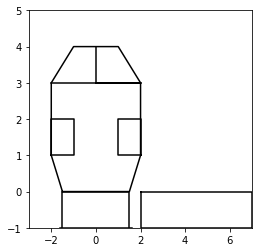

In [9]:
# # width: 1
    # height: 4
    # central base: [0, 0]
train_dim = {
    'width':2,
    'height':3,
    'central base':[0, 0],
    'station': True
}
train_draw = draw(4, 4, (-3, 7), (-1, 5), [['train station', train_dim, [0, 0], 'black', False]])

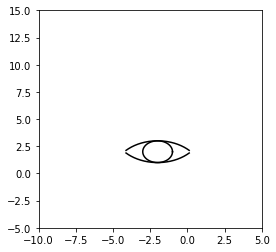

In [10]:
eye_dim = {'pair': False,
               'pupil centroid':[0,0],
               'pupil radius':1}
eye_as_noun = draw(4, 4, (-10,5), (-5, 15), [['eye', eye_dim, [0, 0], 'black', False]])

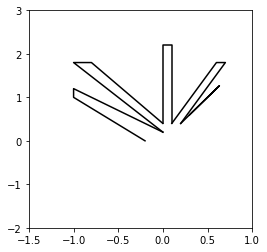

In [11]:
hand_dim = {'width': 1,
            'finger width': 0.1
}
hand_as_noun = draw(4, 4, (-1.5,1), (-2, 3), [['hand', hand_dim, [0, 0], 'black', False]])

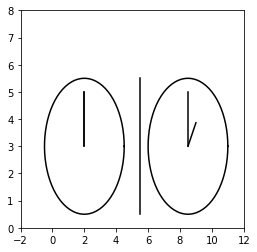

In [12]:
time_length = draw(4, 4, (-2,12), (0, 8), [['time', {
        'hour_length': 1,
        'minute_length':2,
}, [2, 3], 'black', False]])
# hour_length = req['hour_length']
#            minute_length = req['minute_length']

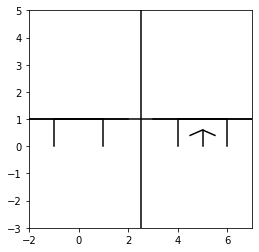

In [13]:
# way
way_as_noun = draw(4, 4,(-2, 7), (-3, 5),[['way', {'origin':[0,0]}, 
                      [0, 0], 'black', False]])


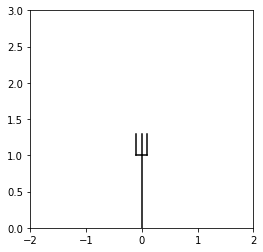

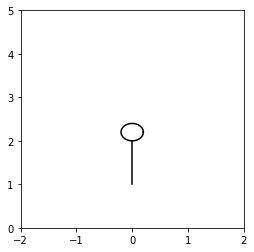

In [14]:
fork_as_noun = draw(4, 4,(-2, 2), (0, 3),[['fork', fork_plan, [0, 0], 'black', False]])
spoon_as_noun = draw(4, 4,(-2, 2), (0, 5),[['spoon', spoon_plan, [0, 0], 'black', False]])

Sample picture generation

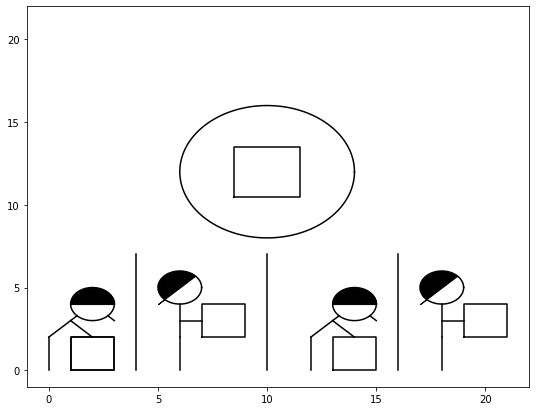

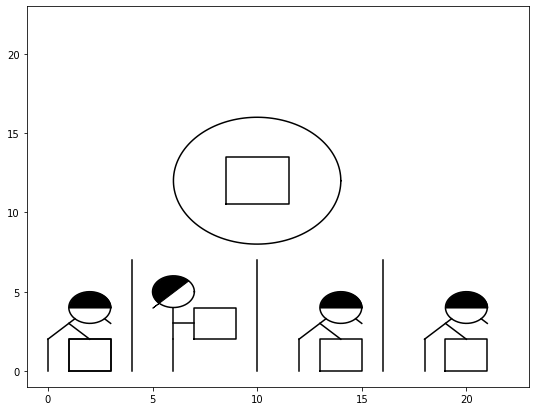

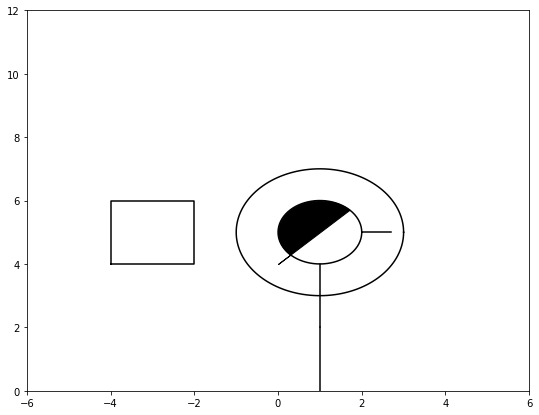

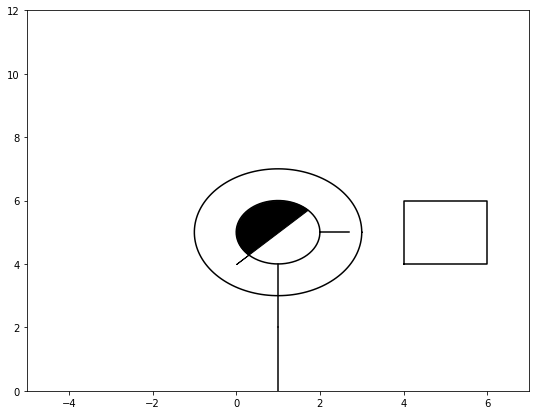

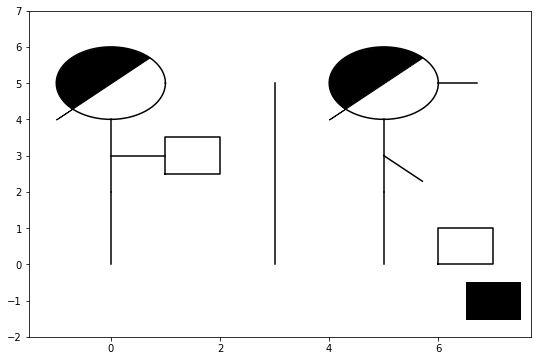

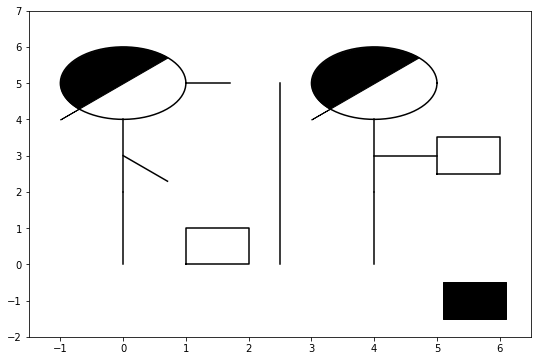

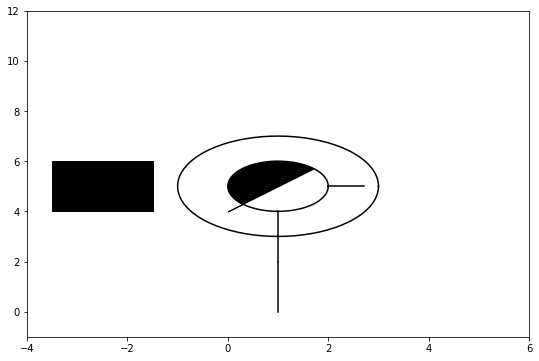

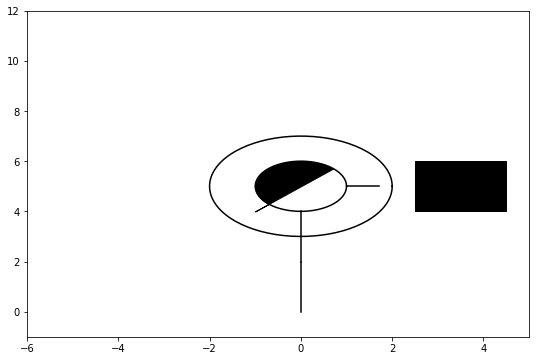

In [15]:
# item = e[0]
# req = e[1]
# adjust = e[2]
# color_shape = e[3]
# filled = e[4]
one_a0P5 = [['person', man_bow, [0, 0], 'black', False], 
            ['box',{'origin':[1,0],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', False],
            ['others', {
                'x':[4, 4],
                'y':[0, 7],
            }, [0,0], 'black', False],
            ['box',{'origin':[1,0],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', False],
            ['person', man_stand, [6, 0], 'black', False],
            ['box',{'origin':[7,2],
                        'height': 2,
                        "length": 2},
            [0, 0],'black', False],
            ['others', {
                'x':[10, 10],
                'y':[0, 7],
            }, [0,0], 'black', False],
            ['person', man_bow, [12, 0], 'black', False],
            ['box',{'origin':[13,0],
                        'height': 2,
                        "length": 2}, [0, 0],'black', False],
            ['others', {
                'x':[16, 16],
                'y':[0, 7],
            }, [0,0], 'black', False],
            ['person', man_stand, [18, 0], 'black', False],
            ['box',{'origin':[19,2],
                        'height': 2,
                        "length": 2}, [0, 0],'black', False],
            ['circle', {'radius':4,
                        'centroid':[10, 12]
                    }, [0, 0], 'black', False],
            ['box',{'origin':[8.5,10.5],
                        'height': 3,
                        "length": 3}, [0, 0],'black', False]
]                                
fig1aP5 = draw(9, 7, (-1, 22), (-1,22), one_a0P5)
fig1aP5.savefig("fig1a_P5")
one_a1P5 = [['person', man_bow, 
                      [0, 0], 'black', False], 
            ['box',{'origin':[1,0],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', False],
            ['others', {
                'x':[4, 4],
                'y':[0, 7],
            }, [0,0], 'black', False],
            ['box',{'origin':[1,0],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', False],
            ['person', man_stand,
                        [6, 0], 'black', False],
            ['box',{'origin':[7,2],
                        'height': 2,
                        "length": 2},
            [0, 0],'black', False],
            ['others', {
                'x':[10, 10],
                'y':[0, 7],
            }, [0,0], 'black', False],
            ['person', man_bow, 
                      [12, 0], 'black', False],
            ['box',{'origin':[13,0],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', False],
            ['others', {
                'x':[16, 16],
                'y':[0, 7],
            }, [0,0], 'black', False],
            ['person', man_bow,
                        [18, 0], 'black', False],
            ['box',{'origin':[19,0],
                        'height': 2,
                        "length": 2},
            [0, 0],'black', False],
            ['circle', {'radius':4,
                        'centroid':[10, 12]
                    },
            [0, 0], 'black', False],
            ['box',{'origin':[8.5,10.5],
                        'height': 3,
                        "length": 3},
                        [0, 0],'black', False]
]   
fig1bP5 = draw(9, 7, (-1, 23), (-1,23), one_a1P5)
fig1bP5.savefig("fig1b_P5")

one_a2P5 = [
    ['person', man_stand_no_hold, [1, 0], 'black', False],
    ['circle', {'radius':2,
                'centroid':[1, 5]
    }, [0, 0], 'black', False],
    ['box',{'origin':[-4,4],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', False]
]
fig1cP5 = draw(9, 7, (-6, 6), (0,12), one_a2P5)
fig1cP5.savefig("fig1c_P5")

one_a3P5 = [
    ['person', man_stand_no_hold, [1, 0], 'black', False],
    ['circle', {'radius':2,
                'centroid':[1, 5]
    }, [0, 0], 'black', False],
    ['box',{'origin':[4,4],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', False]
]
fig1dP5 = draw(9, 7, (-5, 7), (0,12), one_a3P5)
fig1dP5.savefig("fig1d_P5")
# fig 2a, P5
two_a0P5 = [['person', man_stand,
                        [0, 0], 'black', False],
            ['box',{'origin':[1,2.5],
                        'height': 1,
                        "length": 1},
            [0, 0],'black', False],
            ['others', {
                'x':[3, 3],
                'y':[0, 5],
            }, [0,0], 'black', False],
            ['person', man_stand_no_hold_w_arm, 
                      [5, 0], 'black', False],
            ['box',{'origin':[6,0],
                        'height': 1,
                        "length": 1},
                        [0, 0],'black', False],
            ['box',{'origin':[6.5,-1.5],
                        'height': 1,
                        "length": 1},
            [0, 0],'black', True]
            
]   
fig2aP5 = draw(9, 6, (-1.5,7.7), (-2,7), two_a0P5)
fig2aP5.savefig("fig2a_P5")

# fig 2b, P5
two_a1P5 = [['person', man_stand_no_hold_w_arm, 
                      [0, 0], 'black', False],
            ['box',{'origin':[1,0],
                        'height': 1,
                        "length": 1},
                        [0, 0],'black', False],
            ['others', {
                'x':[2.5, 2.5], 'y':[0, 5]}, [0,0], 'black', False],
            ['person', man_stand,
                        [4, 0], 'black', False],
        
            ['box',{'origin':[5,2.5],
                        'height': 1,
                        "length": 1},
            [0, 0],'black', False],
            ['box',{'origin':[5.1,-1.5],
                        'height': 1,
                        "length": 1},
            [0, 0],'black', True]
            
]   
fig2bP5 = draw(9, 6, (-1.5, 6.5), (-2,7), two_a1P5)
fig2bP5.savefig("fig2b_P5")
# fig 2c, P5
two_b0P5 = [['person', man_stand_no_hold,
                        [1, 0], 'black', False],
            ['circle', {'radius':2,
                        'centroid':[1, man_stand_no_hold['head centroid'][1]]
                    }, [0, 0], 'black', False],
            ['box',{'origin':[-3.5, 4],
                        'height': 2,
                        "length": 2},
            [0, 0],'black', True]   
]   

fig2cP5 = draw(9, 6, (-4, 6), (-1, 12), two_b0P5)
fig2cP5.savefig("fig2c_P5")
# fig 2d, P5
two_b1P5 = [['person', man_stand_no_hold,
                        [0, 0], 'black', False],
            ['circle', {'radius':2,
                        'centroid':[0, 5]
                    }, [0, 0], 'black', False],
            ['box',{'origin':[2.5, 4],
                        'height': 2,
                        "length": 2},
            [0, 0],'black', True]   
]   

fig2dP5 = draw(9, 6, (-6, 5), (-1, 12), two_b1P5)
fig2dP5.savefig("fig2d_P5")



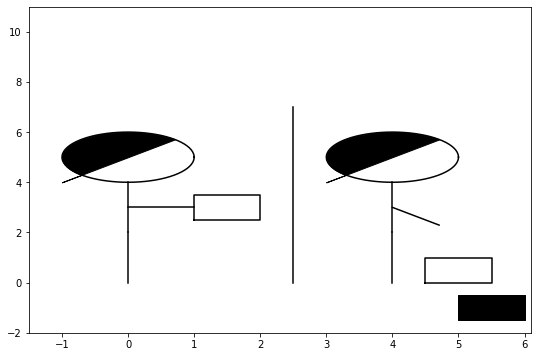

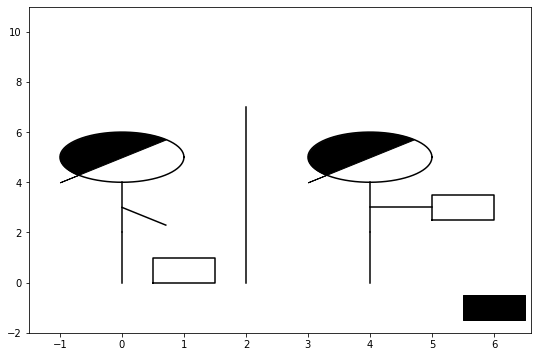

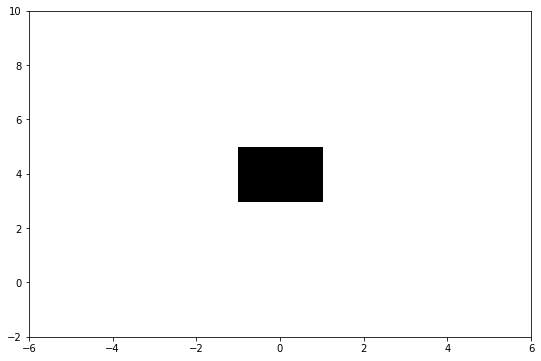

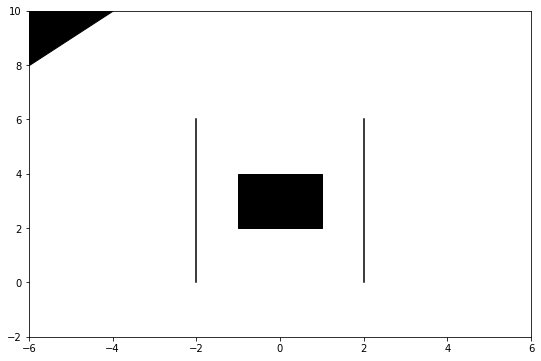

In [16]:
# figure 5, page 7
five_a0P7 = [
        ['person', man_stand_no_nose,
                        [0, 0], 'black', False],
        ['box',{'origin':[man_stand_no_nose['root'][0] + 1, man_stand_no_nose['root'][1] + 2.5],
                        'height': 1,
                        "length": 1}, [0, 0],'black', False],
        ['other',{'x':[man_stand_no_nose['root'][0] + 2.5, man_stand_no_nose['root'][0] + 2.5], 
                  'y':[0, 7]}, [0, 0],'black', False],
                  
        ['person', man_stand_no_hold_w_arm_no_nose,
                        [4, 0], 'black', False],
        ['box',{'origin':[4.5, 0],
                        'height': 1,
                        "length": 1}, [0, 0],'black', False],
        ['box',{'origin':[5, -1.5],
                        'height': 1,
                        "length": 1}, [0, 0],'black', True],
]   
fig5aP7 = draw(9, 6, (-1.5, 6.1), (-2, 11), five_a0P7)
fig5aP7.savefig("fig5a_P7")
# fig 5b
five_a1P7 = [
        ['person', man_stand_no_hold_w_arm_no_nose,
                        [0, 0], 'black', False],
        ['box',{'origin':[0.5, 0],
                        'height': 1,
                        "length": 1}, [0, 0],'black', False],
        ['other',{'x':[man_stand_no_nose['root'][0] + 2, man_stand_no_nose['root'][0] + 2], 
                  'y':[0, 7]}, [0, 0],'black', False],
        ['person', man_stand_no_nose,
                        [4, 0], 'black', False],
        
        ['box',{'origin':[man_stand_no_nose['root'][0] + 5, man_stand_no_nose['root'][1] + 2.5],
                        'height': 1,
                        "length": 1}, [0, 0],'black', False],
        
        ['box',{'origin':[5.5, -1.5],
                        'height': 1,
                        "length": 1}, [0, 0],'black', True]
]   
fig5bP7 = draw(9, 6, (-1.5, 6.6), (-2, 11), five_a1P7)
fig5bP7.savefig("fig5b_P7")
# fig 5c
five_b0P7 = [
        
        ['box',{'origin':[-1, 3],
                        'height': 2,
                        "length": 2}, [0, 0],'black', True],
        
]   
fig5cP7 = draw(9, 6, (-6, 6), (-2, 10), five_b0P7)
fig5cP7.savefig("fig5c_P7")
# fig 5d
five_b1P7 = [
        
        ['other',{'x':[-2, -2], 'y':[0, 6]}, [0, 0],'black', False],
        ['box',{'origin':[-1, 2],
                        'height': 2,
                        "length": 2}, [0, 0],'black', True],
        ['other', {
            'x_lower':-6, "x_upper":-4,
            "y_low_i":8, 'y_low_f':10,
            "y_high_i":10, 'y_high_f':10,
        }, [0, 0], 'black', True],
        ['other',{'x':[2, 2], 'y':[0, 6]}, [0, 0], 'black', False]    
]   
fig5dP7 = draw(9, 6, (-6, 6), (-2, 10), five_b1P7)
fig5dP7.savefig("fig5d_P7")

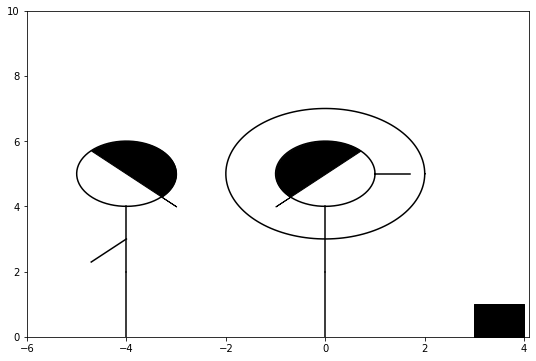

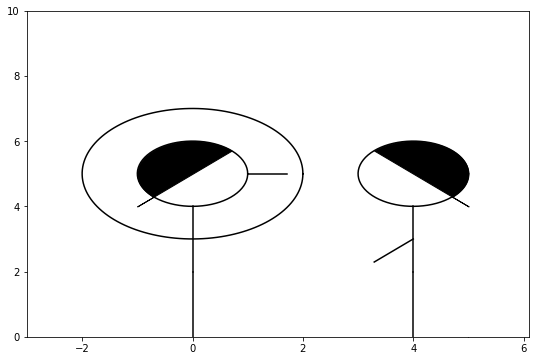

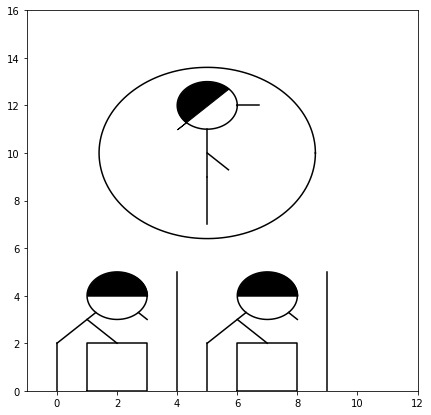

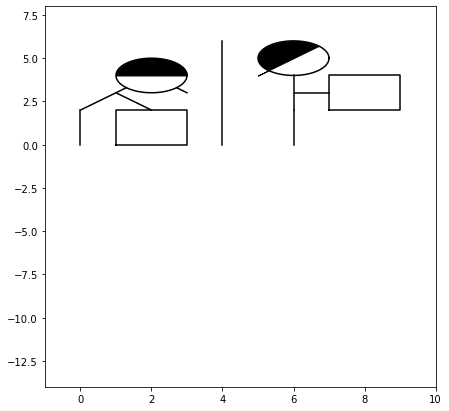

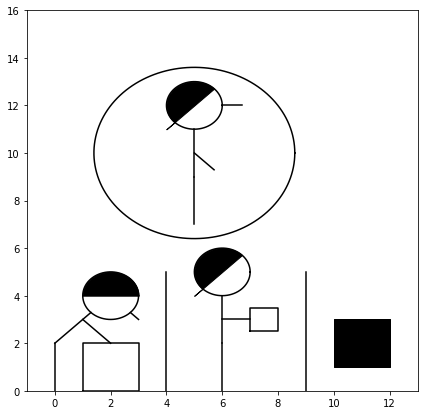

In [17]:
# figure 6a, page 8
six_a0P8 = [
        ['person', man_stand_no_hold_w_arm_left_no_nose, [-4, 0], 'black', False],
        ['person', man_stand_no_hold, [0, 0], 'black', False],
        ['circle', {'radius': 2, 'centroid': [0, 5]}, [0,0], 'black', False],
        ['box',{'origin':[3, 0],
                        'height': 1,
                        "length": 1}, [0, 0],'black', True]
]   

fig6aP8 = draw(9, 6, (-6,4.1), (0, 10), six_a0P8)
fig6aP8.savefig("fig6a_P8")
# figure 6b, page 8
six_a1P8 = [
        
        ['person', man_stand_no_hold, [0, 0], 'black', False],
        ['circle', {'radius': 2, 'centroid': [0, 5]}, [0,0], 'black', False],
        ['person', man_stand_no_hold_w_arm_left_no_nose, [4, 0], 'black', False],
        ['box',{'origin':[5, 0],
                        'height': 1,
                        "length": 1}, [0, -1],'black', True]
]   

fig6bP8 = draw(9, 6, (-3,6.1), (0, 10), six_a1P8)
fig6bP8.savefig("fig6b_P8")
# figure 6c, page 8
six_b0P8 = [
        ['person', man_bow, [0, 0], 'black', False],
        ['box',{'origin':[1, 0],
                        'height': 2,
                        "length": 2}, [0, 0],'black', False],
        ['other',{'x':[man_bow['head centroid'][0] + 2, man_bow['head centroid'][0] + 2], 'y':[0, 5]}, [0, 0], 'black', False],
        ['person', man_bow, [5, 0], 'black', False],
        ['box',{'origin':[6, 0],
                        'height': 2,
                        "length": 2}, [0, 0],'black', False],
        ['other',{'x':[man_stand['head centroid'][0] + 9, man_stand['head centroid'][0] + 9], 'y':[0, 5]}, [0, 0], 'black', False],
        ['person', man_stand_no_hold_w_arm, [5, 7], 'black', False],
        ['circle', {'radius': 3.6, 'centroid': [5, 10]}, [0,0], 'black', False]
] 
fig6cP8 = draw(7, 7, (-1,12), (0, 16), six_b0P8)
fig6cP8.savefig("fig6c_P8")

# figure 6d, page 8
six_b1P8 = [
        ['person', man_bow, [0, 0], 'black', False],
        ['box',{'origin':[1, 0],
                        'height': 2,
                        "length": 2}, [0, 0],'black', False],
        ['other',{'x':[man_bow['head centroid'][0] + 2, man_bow['head centroid'][0] + 2], 'y':[0, 6]}, [0, 0], 'black', False],
        ['person', man_stand, [6, 0], 'black', False],
        ['box',{'origin':[7, 2],
                        'height': 2,
                        "length": 2}, [0, 0],'black', False]
        
] 
fig6dP8 = draw(7, 7, (-1,10), (-14, 8), six_b1P8)
fig6dP8.savefig("fig6d_P8")

# figure 6e, page 8
six_b2P8 = [
        ['person', man_bow, [0, 0], 'black', False],
        ['box',{'origin':[1, 0],
                        'height': 2,
                        "length": 2}, [0, 0],'black', False],
        ['other',{'x':[man_bow['head centroid'][0] + 2, man_bow['head centroid'][0] + 2], 'y':[0, 5]}, [0, 0], 'black', False],
        ['person', man_stand, [6, 0], 'black', False],
        ['box',{'origin':[7, 2.5],
                        'height': 1,
                        "length": 1}, [0, 0],'black', False],
        ['other',{'x':[man_stand['head centroid'][0] + 9, man_stand['head centroid'][0] + 9], 'y':[0, 5]}, [0, 0], 'black', False],
        ['box',{'origin':[10, 1],
                        'height': 2,
                        "length": 2}, [0, 0],'black', True],
        ['person', man_stand_no_hold_w_arm, [5, 7], 'black', False],
        ['circle', {'radius': 3.6, 'centroid': [5, 10]}, [0,0], 'black', False]
] 
fig6eP8 = draw(7, 7, (-1,13), (0, 16), six_b2P8)
fig6eP8.savefig("fig6e_P8")
## picture index 1
# 
# 

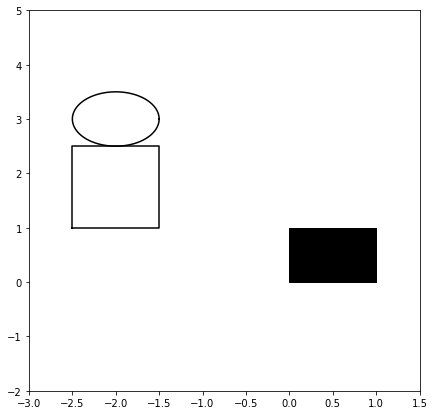

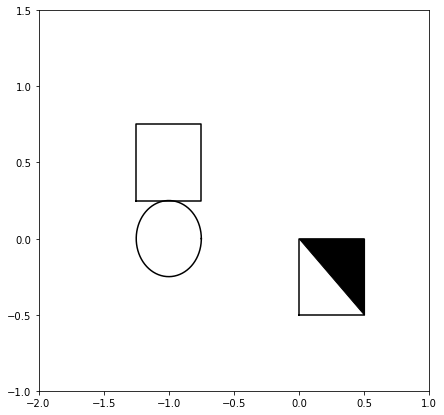

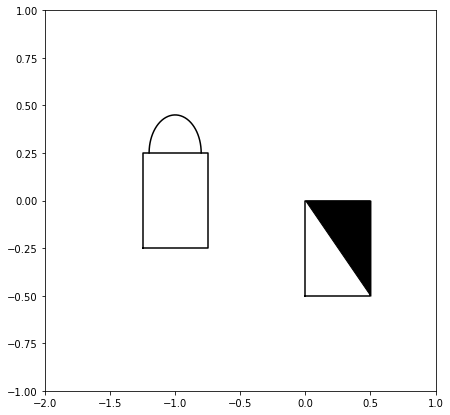

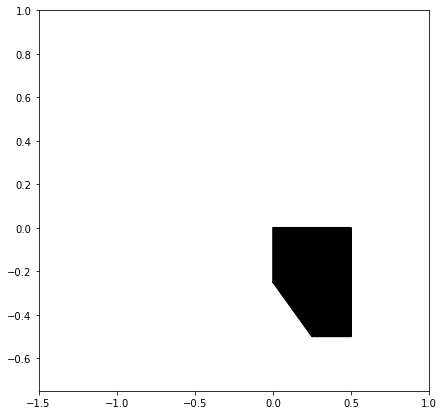

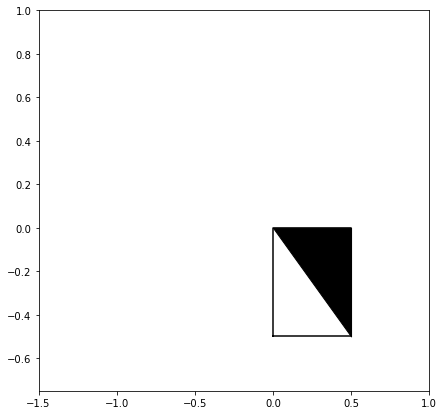

In [18]:
# figure 7 and 8
seven_and_eight_aP9 = [

        ['box',{'origin':[-2.5, 1],
                        'height': 1.5,
                        "length": 1}, [0, 0],'black', False],
        ['box',{'origin':[0, 0],
                        'height': 1,
                        "length": 1}, [0, 0],'black', True],
        ['box',{'origin':[7, 2.5],
                        'height': 1,
                        "length": 1}, [0, 0],'black', False],
        ['circle', {'radius': 0.5, 'centroid': [-2, 3]}, [0,0], 'black', False]
] 
fig7_8_aP9 = draw(7, 7, (-3,1.5), (-2, 5), seven_and_eight_aP9)
fig7_8_aP9.savefig("fig7_8_aP9")
seven_and_eight_bP9 = [
        #['person', man_bow, [0, 0], 'black', False],
        ['box',{'origin':[-1.25, 0.25],
                        'height': 0.5,
                        "length": 0.5}, [0, 0],'black', False],
        ['box',{'origin':[0, -0.5],
                        'height': 0.5,
                        "length": 0.5}, [0, 0],'black', False],
        ['other',{'x_lower':0, 'x_upper': 0.5, 'y_low_i':0, 'y_low_f':-0.5, 'y_high_i':0, 'y_high_f':0}, [0, 0], 'black', True],
        
        ['circle', {'radius': 0.25, 'centroid': [-1, 0]}, [0,0], 'black', False]
] 
fig7_8_bP9 = draw(7, 7, (-2,1), (-1, 1.5), seven_and_eight_bP9)

fig7_8_bP9.savefig("fig7_8_bP9")
fig7_8_aP9.savefig("fig7_8_aP9")
seven_and_eight_cP9 = [
        #['person', man_bow, [0, 0], 'black', False],
        ['box',{'origin':[-1.25, -0.25],
                        'height': 0.5,
                        "length": 0.5}, [0, 0],'black', False],
        ['box',{'origin':[0, -0.5],
                        'height': 0.5,
                        "length": 0.5}, [0, 0],'black', False],
        ['other',{'x_lower':0, 'x_upper': 0.5, 'y_low_i':0, 'y_low_f':-0.5, 'y_high_i':0, 'y_high_f':0}, [0, 0], 'black', True],
        
        ['other', {'x': 0.2* np.cos( np.linspace( 0 ,  np.pi , 150 ) ) + (-1), 'y': 0.2 * np.sin( np.linspace( 0 ,  np.pi , 150 ) ) + 0.25}, [0,0], 'black', False]
] 
fig7_8_cP9 = draw(7, 7, (-2,1), (-1, 1), seven_and_eight_cP9)

fig7_8_cP9.savefig("fig7_8_cP9")

seven_dP9 = [
        
        ['other', {'x':np.array([0, 0, 0.5, 0.5, 0.25, 0]), 
                   'y':np.array([-0.25, 0, 0, -0.5, -0.5, -0.25])}, [0, 0], 'black', False],
        ['other',{'x_lower':0, 'x_upper': 0.25, 'y_low_i':-0.25, 'y_low_f':-0.5, 'y_high_i':-0.25, 'y_high_f':-0.25}, [0, 0], 'black', True],
        ['box',{'origin':[0, -0.25],
                        'height': 0.25,
                        "length": 0.5}, [0, 0],'black', True],
        ['box',{'origin':[0.25, -0.5],
                        'height': 0.25,
                        "length": 0.25}, [0, 0],'black', True]
] 
fig7dP9 = draw(7, 7, (-1.5, 1), (-0.75, 1), seven_dP9)

fig7dP9.savefig("fig7d_P9")


eight_dP9 = [
        #['person', man_bow, [0, 0], 'black', False],
        
        ['box',{'origin':[0, -0.5],
                        'height': 0.5,
                        "length": 0.5}, [0, 0],'black', False],
        
        ['other',{'x_lower':0, 'x_upper': 0.5, 'y_low_i':0, 'y_low_f':-0.5, 'y_high_i':0, 'y_high_f':0}, [0, 0], 'black', True]
] 
fig8dP9 = draw(7, 7, (-1.5,1), (-0.75, 1), eight_dP9)

fig8dP9.savefig("fig8d_P9")

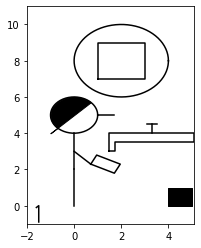

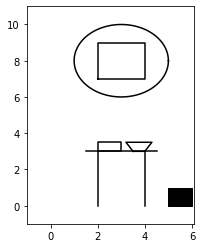

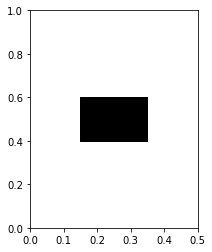

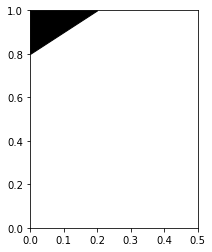

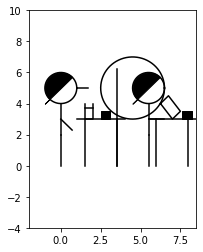

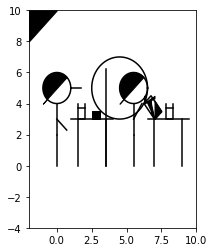

In [19]:
# page 15
# 0, 0
#        item = e[0]
#        req = e[1]
#        adjust = e[2]
#        color_shape = e[3]
#        filled = e[4]
one_00P15 = [['person', man_stand_no_hold_w_arm, [0, 0], 'black', False], 
            ['box',{'origin':[4,0],
                        'height': 1,
                        "length": 1},
                        [0, 0],'black', True],
            ['circle', {'radius':2,
                        'centroid':[2, 8]
                    }, [0, 0], 'black', False],
            ['cup', {"x":np.array([np.sqrt(2)/2, np.sqrt(2)/2 + 0.5/2, np.sqrt(2)/2 + 2.5/2, np.sqrt(2)/2 + 2/2, np.sqrt(2)/2]), 
                     "y":np.array([ 3 - np.sqrt(2)/2, 3 -np.sqrt(2)/2 + 1/2, 3 - np.sqrt(2)/2 + 0, 3 - np.sqrt(2)/2 -1/2, 3 - np.sqrt(2)/2  ])                       
            }, [0, 0], 'black', False],
            ['tap', {'origin':[1.5, 3],
                        "length": 3.6,
                        'height': 1,
                        'bottom_width': 1/4,
                        'direction': 'right',
                        'scale':1
                        },
                        [0, 0],'black', True],
            ['box',{'origin':[1,7],
                        'height': 2,
                        "length": 2}, [0, 0],'black', False],
            ['other', {
                'x':np.array([-1.5, -1.5, -1.6]),
                'y':np.array([-0.9, 0, -0.1])
            },
                        [0, 0],'black', False]
]   
#tap(req['origin'], req['length'], req['height'], req['bottom_width'], req['direction'], req['scale'])
fig1_00P15 = draw(3, 4, (-2, 5.1), (-1,11), one_00P15)
fig1_00P15.savefig("fig1_00P15")

one_00P15_partB = [
            ['box',{'origin':[2, 7],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', False],
            ['circle', {'radius':2,
                        'centroid':[3, 8]
                    }, [0, 0], 'black', False],
            ['box',{'origin':[2, 3],
                        'height': 0.5,
                        "length": 1}, [0, 0],'black', False],
            
            ['table',table_plan, [2, 0], 'black', False],
            ['other',{
                'x':np.array([3.5, 3.2, 4.3, 4, 3.5]),
                'y':np.array([3, 3.5, 3.5, 3, 3])
            }, [0, 0], 'black', False],
            ['box',{'origin':[5, 0],
                        'height': 1,
                        "length": 1}, [0, 0],'black', True]
]   
fig1_00P15_partB = draw(3, 4, (-1, 6.1), (-1, 11), one_00P15_partB)
fig1_00P15_partB.savefig("fig1_00P15_partB")

one_01P15 = [
            ['box',{'origin':[0.15,0.4],
                        'height': 0.2,
                        "length": 0.2}, [0, 0],'black', True]
]   
#tap(req['origin'], req['length'], req['height'], req['bottom_width'], req['direction'], req['scale'])
fig1_01P15 = draw(3, 4, (0, 0.5), (0,1), one_01P15)
fig1_01P15.savefig("fig1_01P15")

one_01P15_partB = [
            
            ['other',{
                'x_lower':0,'x_upper':0.2,'y_low_i':0.8, 'y_low_f':1, 'y_high_i':1, 'y_high_f':1
            }, [0, 0], 'black', True]
]   
fig1_01P15_partB = draw(3, 4, (0, 0.5), (0,1), one_01P15_partB)
fig1_01P15_partB.savefig("fig1_01P15_partB")
# [0, 2]
one_02P15 = [['person', man_stand_no_hold_w_arm, [0, 0], 'black', False], 
            ['table', table_plan,[1.5, 0], 'black', False],
            ['circle', {'radius':2,
                        'centroid':[4.5, 5]
                    }, [0, 0], 'black', False],
            ['cup', {"x":np.array([1.5, 1.5, 2, 2]), 
                     "y":np.array([4, 3, 3, 4])                      
            }, [0, 0], 'black', False],
            ['other', {'x':np.array([1.5, 2]), 
                       'y':np.array([3.7, 3.7]),
                    }, [0, 0],'black', False],
            ['box',{'origin':[2.5, 3],
                        'height': 0.5,
                        "length": 0.6}, [0, 0],'black', True],
            ['other', {'x':np.array([3.5, 3.5]), 
                       'y':np.array([0, 6.25]),
                    }, [0, 0],'black', False],
            ['person', man_stand_no_nose, [5.5, 0], 'black', False], 
            ['cup', {"x":np.array([6.25, 7, 7.5, 6.75, 6.25]),
                     "y":np.array([4, 3, 3.5, 4.5, 4])                     
            }, [0, 0], 'black', False],
            ['table', table_plan,[6, 0], 'black', False],
            ['box',{'origin':[7.6, 3],
                        'height': 0.5,
                        "length": 0.6}, [0, 0],'black', True]
]   

fig1_02P15 = draw(3, 4, (-2, 8.5), (-4,10), one_02P15)
fig1_02P15.savefig("fig1_02P15")

one_02P15_partB = [['other',
            {'x_lower':-2, 'x_upper': 0, 'y_low_i':8, 'y_low_f':10, 'y_high_i':10, 'y_high_f':10}, [0, 0], 'black', True],
            ['person', man_stand_no_hold_w_arm, [0, 0], 'black', False], 
            ['table', table_plan,[1.5, 0], 'black', False],
            ['circle', {'radius':2,
                        'centroid':[4.5, 5]
                    }, [0, 0], 'black', False],
            ['cup', {"x":np.array([1.5, 1.5, 2, 2]), 
                     "y":np.array([4, 3, 3, 4])                      
            }, [0, 0], 'black', False],
            ['other', {'x':np.array([1.5, 2]), 
                       'y':np.array([3.7, 3.7]),
                    }, [0, 0],'black', False],
            ['box',{'origin':[2.5, 3],
                        'height': 0.5,
                        "length": 0.6}, [0, 0],'black', True],
            ['other', {'x':np.array([3.5, 3.5]), 
                       'y':np.array([0, 6.25]),
                    }, [0, 0],'black', False],
            ['person', man_stand_no_hold_no_nose, [5.5, 0], 'black', False], 
            ['other', {
                "x": [5.5, 6.1],
                "y": [3, 4]
            }, [0, 0],'black', False],
            ['cup', {"x":np.array([6.25, 7, 7.5, 6.75, 6.25]),
                     "y":np.array([4, 3, 3.5, 4.5, 4])                     
            }, [0, 0], 'black', False],
            ['table', table_plan,[7, 0], 'black', False],
            ['cup', {"x":np.array([7.8, 7.8, 8.3, 8.3]), 
                     "y":np.array([4, 3, 3, 4])                      
            }, [0, 0], 'black', False],
            ['other', {'x':np.array([7.8, 8.3]), 
                       'y':np.array([3.7, 3.7]),
                    }, [0, 0],'black', False],
            ['other',{'x_lower': 6.25 , 'x_upper': 7, 
            'y_low_i':4, 'y_low_f':4.5, 
            'y_high_i':4, 'y_high_f':4.335}, 
            [0, 0], 'black', True],
            ['other',{'x_lower': 6.25, 'x_upper': 6.75, 
            'y_low_i':4, 'y_low_f':4.335, 
            'y_high_i':4.5, 'y_high_f':3.5}, 
            [0, 0], 'black', True],
            ['other',{'x_lower': 6.75, 'x_upper': 7, 
            'y_low_i':4, 'y_low_f':3, 
            'y_high_i':3.35, 'y_high_f':3}, 
            [0, 0], 'black', True],
            ['other',{'x_lower': 7, 'x_upper': 7.5, 
            'y_low_i':3, 'y_low_f':3.5, 
            'y_high_i':4.2, 'y_high_f':3.5}, 
            [0, 0], 'black', True]
]
fig1_02P15_partB = draw(3, 4, (-2, 10), (-4,10), one_02P15_partB)
fig1_02P15_partB.savefig("fig1_02P15_partB")

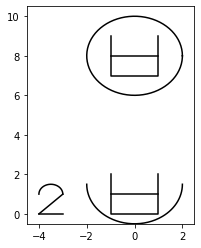

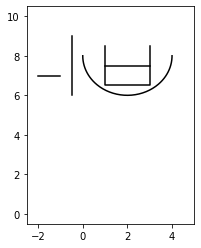

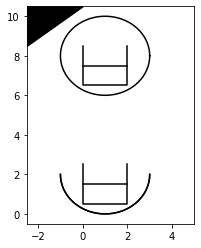

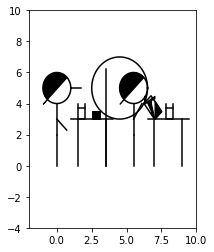

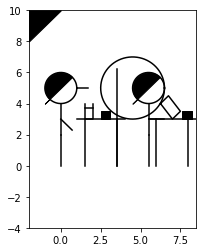

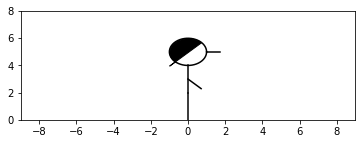

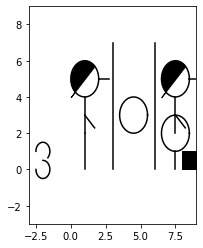

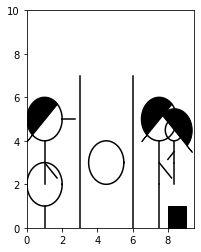

In [20]:
# [1, 0]
one_10P15 = [['circle', {'radius':2,
                        'centroid':[0, 8]
                    }, [0, 0], 'black', False],
        ['other',{'x':np.array([-1, -1, 1, 1]),
                      "y": np.array([9, 7, 7, 9])},
                    [0, 0],'black', False],
        ['other',{'x':np.array([-1, 1]),
                      "y": np.array([8, 8])},
                    [0, 0],'black', False],
        ['other',{'x':np.array([-1, -1, 1, 1]),
                      "y": np.array([2, 0, 0, 2])},
                    [0, 0],'black', False],
        ['other',{'x':np.array([-1, 1]),
                      "y": np.array([1, 1])},
                    [0, 0],'black', False],
        ['other', {'x':2 * np.cos( np.linspace(np.pi, 2*np.pi, 150) ), 
                       'y':2 * np.sin( np.linspace(np.pi, 2*np.pi, 150)) + 1.5}, [0, 0], 'black', False],
        ['other', {'x':0.5 * np.cos( np.linspace(0, np.pi, 150)) - 3.5, 
                   'y':0.5 * np.sin( np.linspace(0, np.pi, 150)) + 1}, [0, 0], 'black', False],
        ['other', {'x':np.array([-4,-3]), 
                   'y':np.array([0,1])}, [0, 0], 'black', False],
        ['other', {'x':np.array([-4,-3]), 
                   'y':np.array([0,0])}, [0, 0], 'black', False]
]
fig1_10P15 = draw(3, 4, (-4.5, 2.5), (-0.5,10.5), one_10P15)
fig1_10P15.savefig("fig1_10P15")

one_10P15_b = [['other', {
                'x':np.array([-2, -1]),
                'y':np.array([7, 7])
            }, [0, 0], 'black', False],
        ['other', {
                'x':np.array([-.5, -.5]),
                'y':np.array([6, 9])
            }, [0, 0], 'black', False],
        ['other', {
                'x':np.array([1, 1, 3, 3]),
                'y':np.array([8.5, 6.5, 6.5, 8.5])
            }, [0, 0], 'black', False],
        ['other', {
                'x':np.array([1, 3]),
                'y':np.array([7.5, 7.5])
            }, [0, 0], 'black', False],
        ['other', {
                'x':2 * np.cos( np.linspace(np.pi, 2*np.pi, 150) ) + 2,
                'y':2 * np.sin( np.linspace(np.pi, 2*np.pi, 150) ) + 8
            }, [0, 0], 'black', False]
]   

#ax1[1, 0].plot(2 * np.cos( np.linspace(np.pi, 2*np.pi, 150) ) + 7, 2 * np.sin( np.linspace(np.pi, 2*np.pi, 150) ) + 8, color = 'black')
fig1_10P15_b = draw(3, 4, (-2.5, 5), (-0.5,10.5), one_10P15_b)
fig1_10P15_b.savefig("fig1_10P15_b")

one_10P15_c = [
        ['other',{'x_lower':-2.5, 'x_upper': 0, 
                'y_low_i':8.5, 'y_low_f':10.5, 
                'y_high_i':10.5, 'y_high_f':10.5}, [0, 0], 'black', True],
        ['circle', {'radius':2,
                        'centroid':[1, 8]
                    }, [0, 0], 'black', False],
        ['other', {
                'x':np.array([0, 0, 2, 2]),
                'y':np.array([8.5, 6.5, 6.5, 8.5])
            }, [0, 0], 'black', False],
        ['other', {
                'x':np.array([0, 2]),
                'y':np.array([7.5, 7.5])
            }, [0, 0], 'black', False],
        ['other', {
                'x':2 * np.cos( np.linspace(np.pi, 2*np.pi, 150) ) + 1,
                'y':2 * np.sin( np.linspace(np.pi, 2*np.pi, 150) ) + 2
            }, [0, 0], 'black', False],
        ['other', {
                'x':2 * np.cos( np.linspace(np.pi, 2*np.pi, 150) ) + 1,
                'y':2 * np.sin( np.linspace(np.pi, 2*np.pi, 150) ) + 2
            }, [0, 0], 'black', False],
        ['other',{'x':np.array([0, 0, 2, 2]),
                      "y": np.array([2.5, 0.5, 0.5, 2.5])},
                    [0, 0],'black', False],
        ['other',{'x':np.array([0, 2]),
                      "y": np.array([1.5, 1.5])},
                    [0, 0],'black', False]
]   
fig1_10P15_c = draw(3, 4, (-2.5, 5), (-0.5,10.5), one_10P15_c)
fig1_10P15_c.savefig("fig1_10P15_c")

# [1, 1]
one_11P15 = [['person', man_stand_no_hold_w_arm, [0, 0], 'black', False], 
            ['table', table_plan,[1.5, 0], 'black', False],
            ['circle', {'radius':2,
                        'centroid':[4.5, 5]
                    }, [0, 0], 'black', False],
            ['cup', {"x":np.array([1.5, 1.5, 2, 2]), 
                     "y":np.array([4, 3, 3, 4])                      
            }, [0, 0], 'black', False],
            ['other', {'x':np.array([1.5, 2]), 
                       'y':np.array([3.7, 3.7]),
                    }, [0, 0],'black', False],
            ['box',{'origin':[2.5, 3],
                        'height': 0.5,
                        "length": 0.6}, [0, 0],'black', True],
            ['other', {'x':np.array([3.5, 3.5]), 
                       'y':np.array([0, 6.25]),
                    }, [0, 0],'black', False],
            ['person', man_stand_no_hold_no_nose, [5.5, 0], 'black', False], 
            ['other', {
                "x": [5.5, 6.1],
                "y": [3, 4]
            }, [0, 0],'black', False],
            ['cup', {"x":np.array([6.25, 7, 7.5, 6.75, 6.25]),
                     "y":np.array([4, 3, 3.5, 4.5, 4])                     
            }, [0, 0], 'black', False],
            ['table', table_plan,[7, 0], 'black', False],
            ['cup', {"x":np.array([7.8, 7.8, 8.3, 8.3]), 
                     "y":np.array([4, 3, 3, 4])                      
            }, [0, 0], 'black', False],
            ['other', {'x':np.array([7.8, 8.3]), 
                       'y':np.array([3.7, 3.7]),
                    }, [0, 0],'black', False],
            ['other',{'x_lower': 6.25 , 'x_upper': 7, 
            'y_low_i':4, 'y_low_f':4.5, 
            'y_high_i':4, 'y_high_f':4.335}, 
            [0, 0], 'black', True],
            ['other',{'x_lower': 6.25, 'x_upper': 6.75, 
            'y_low_i':4, 'y_low_f':4.335, 
            'y_high_i':4.5, 'y_high_f':3.5}, 
            [0, 0], 'black', True],
            ['other',{'x_lower': 6.75, 'x_upper': 7, 
            'y_low_i':4, 'y_low_f':3, 
            'y_high_i':3.35, 'y_high_f':3}, 
            [0, 0], 'black', True],
            ['other',{'x_lower': 7, 'x_upper': 7.5, 
            'y_low_i':3, 'y_low_f':3.5, 
            'y_high_i':4.2, 'y_high_f':3.5}, 
            [0, 0], 'black', True]
]
fig1_11P15 = draw(3, 4, (-2, 10), (-4,10), one_11P15)
fig1_11P15.savefig("fig1_11P15")

one_11P15_b = [['other',
            {'x_lower':-2, 'x_upper': 0, 'y_low_i':8, 'y_low_f':10, 'y_high_i':10, 'y_high_f':10}, [0, 0], 'black', True],
            ['person', man_stand_no_hold_w_arm, [0, 0], 'black', False], 
            ['table', table_plan,[1.5, 0], 'black', False],
            ['circle', {'radius':2,
                        'centroid':[4.5, 5]
                    }, [0, 0], 'black', False],
            ['cup', {"x":np.array([1.5, 1.5, 2, 2]), 
                     "y":np.array([4, 3, 3, 4])                      
            }, [0, 0], 'black', False],
            ['other', {'x':np.array([1.5, 2]), 
                       'y':np.array([3.7, 3.7]),
                    }, [0, 0],'black', False],
            ['box',{'origin':[2.5, 3],
                        'height': 0.5,
                        "length": 0.6}, [0, 0],'black', True],
            ['other', {'x':np.array([3.5, 3.5]), 
                       'y':np.array([0, 6.25]),
                    }, [0, 0],'black', False],
            ['person', man_stand_no_nose, [5.5, 0], 'black', False], 
            ['cup', {"x":np.array([6.25, 7, 7.5, 6.75, 6.25]),
                     "y":np.array([4, 3, 3.5, 4.5, 4])                     
            }, [0, 0], 'black', False],
            ['table', table_plan,[6, 0], 'black', False],
            ['box',{'origin':[7.6, 3],
                        'height': 0.5,
                        "length": 0.6}, [0, 0],'black', True]
]   

fig1_11P15_partB = draw(3, 4, (-2, 8.5), (-4,10), one_11P15_b)
fig1_11P15_partB.savefig("fig1_11P15_partB")

one_12_42_and_51_P15_up = [['person', man_stand_no_hold_w_arm, [0, 0], 'black', False]]   

fig1_12_42_and_51P15_up= draw(6, 2, (-9, 9), (0,8), one_12_42_and_51_P15_up)
fig1_12_42_and_51P15_up.savefig("fig1_12_42_and_51P15_up")

one_12P15_bottom_left = [['person', man_stand_no_hold_w_arm, [1, 0], 'black', False],
                        ['other', {
                             'x':np.array([3, 3]),
                             'y':np.array([0, 7])}, [0, 0], 'black', False],
                        ['circle', {'radius':1,
                        'centroid':[4.5, 3]}, [0, 0], 'black', False],
                        ['other', {
                             'x':np.array([6, 6]),
                             'y':np.array([0, 7])}, [0, 0], 'black', False],
                        ['circle', {'radius':1,
                        'centroid':[7.5, 2]}, [0, 0], 'black', False],
                        ['other', {
                             'x':np.array([7.5, 7.5]),
                             'y':np.array([0, 1])
                        }, [0, 0], 'black', False],
                        ['person', man_stand_no_hold_w_arm, [7.5, 0], 'black', False, 'leg'],
                        ['box',{'origin':[8, 0],
                        'height': 1,
                        "length": 1}, [0, 0],'black', True],
        ['other', {'x':0.5 * np.cos( np.linspace(-0.25*np.pi, np.pi, 150)) - 2, 
                   'y':0.5 * np.sin( np.linspace(-0.25*np.pi, np.pi, 150)) + 1}, [0, 0], 'black', False],
        ['other', {'x':0.5 * np.cos( np.linspace(-np.pi, np.pi/2, 150)) - 2, 
                   'y':0.5 * np.sin( np.linspace(-np.pi, np.pi/2, 150))}, [0, 0], 'black', False]]
   

fig1_12P15_bottom_left= draw(3, 4, (-3, 9), (-3,9), one_12P15_bottom_left)
fig1_12P15_bottom_left.savefig("fig1_12P15_bottom_left")

one_12P15_bottom_right = [
                        ['circle', {'radius':1,
                        'centroid':[1, 2]}, [0, 0], 'black', False],
                        ['other', {
                             'x':np.array([1, 1]),
                             'y':np.array([0, 1])
                        }, [0, 0], 'black', False],
                        ['person', man_stand_no_hold_w_arm, [1, 0], 'black', False, 'leg'],
                        ['other', {
                             'x':np.array([3, 3]),
                             'y':np.array([0, 7])}, [0, 0], 'black', False],
                        ['circle', {'radius':1,
                        'centroid':[4.5, 3]}, [0, 0], 'black', False],
                        ['other', {
                             'x':np.array([6, 6]),
                             'y':np.array([0, 7])}, [0, 0], 'black', False],
                        ['person', man_stand_no_hold_w_arm, [7.5, 0], 'black', False],
                        ['person', man_stand_no_hold_w_arm_child_left, [7.35 + np.array(2)/2, 2], 'black', False],
                        ['box',{'origin':[8, 0],
                        'height': 1,
                        "length": 1}, [0, 0],'black', True]
                        ]
#man_stand_no_hold_w_arm_child_left

fig1_12P15_bottom_right= draw(3, 4, (0, 9.5), (0,10), one_12P15_bottom_right)
fig1_12P15_bottom_right.savefig("fig1_12P15_bottom_right")
#plt.fill_between(
#    0.3*np.cos( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + man_stand_no_hold_w_arm_left['head centroid'][0] + man_stand_no_hold_dim_w_arm['x_arm'][-1] + 7.5,
##    -0.3*np.cos( np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + man_stand_no_hold_w_arm_left['head centroid'][0]+ 4.5,
#   0.3*np.sin(np.concatenate( (np.linspace(-np.pi/4, 0,75), (np.linspace(0, 3*np.pi/4,75) ) ) ) ) + man_stand_no_hold_w_arm_left['head centroid'][0]+ 4.5,color='black')

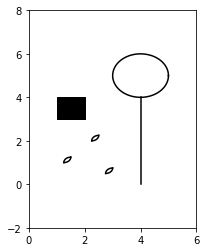

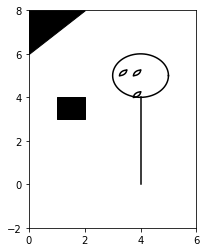

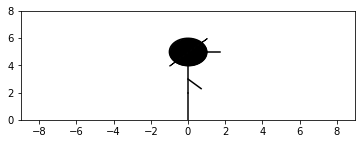

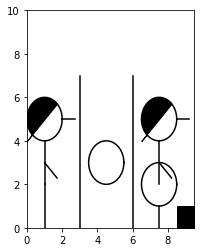

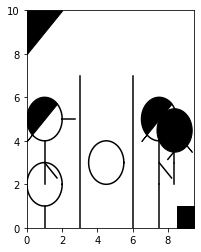

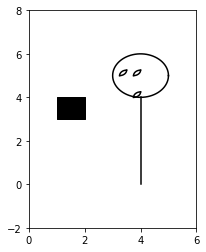

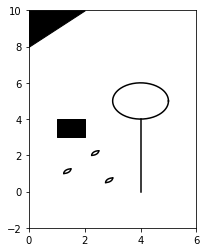

In [21]:
# [2, 0]
one_20P15 = [
            ['box',{'origin':[1,3],
                        'height': 1,
                        "length": 1},
                        [0, 0],'black', True],
            ['circle', {'radius':1,
                        'centroid':[4, 5]
                    }, [0, 0], 'black', False],
            ['other', {
                'x':np.array([4, 4]),
                'y':np.array([0, 4])
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75) ) + 2.5,
                'y':0.25*np.sin(  np.linspace(np.pi/2, np.pi, 75) ) + 2
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75)) + 2.25,
                'y':0.25*np.sin(  np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 2.25
            },[0, 0],'black', False],

            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75) ) + 1.5,
                'y':0.25*np.sin(  np.linspace(np.pi/2, np.pi, 75) ) + 1
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75)) + 1.25,
                'y':0.25*np.sin(  np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 1.25
            },[0, 0],'black', False],

            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75) ) + 3,
                'y':0.25*np.sin(  np.linspace(np.pi/2, np.pi, 75) ) + 0.5
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75)) + 2.75,
                'y':0.25*np.sin(  np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 0.75
            },[0, 0],'black', False]
]   
fig1_20P15 = draw(3, 4, (0, 6), (-2,8), one_20P15)
fig1_20P15.savefig("fig1_20P15")



one_20P15_partB = [
            ['other',{'x_lower': 0 , 'x_upper': 2, 
            'y_low_i':6, 'y_low_f':8, 
            'y_high_i':8, 'y_high_f':8}, 
            [0, 0], 'black', True],
            ['box',{'origin':[1,3],
                        'height': 1,
                        "length": 1},
                        [0, 0],'black', True],
            ['circle', {'radius':1,
                        'centroid':[4, 5]
                    }, [0, 0], 'black', False],
            ['other', {
                'x':np.array([4, 4]),
                'y':np.array([0, 4])
            },[0, 0],'black', False],

            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75) ) + 4,
                'y':0.25*np.sin(  np.linspace(np.pi/2, np.pi, 75) ) + 4
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 3.75,
                'y':0.25*np.sin( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 4.25
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75)) + 3.5,
                'y':0.25*np.sin( np.linspace(np.pi/2, np.pi, 75)) + 5
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 3.25,
                'y':0.25*np.sin( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 5.25
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75)) +4,
                'y':0.25*np.sin( np.linspace(np.pi/2, np.pi, 75)) + 5
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 3.75,
                'y':0.25*np.sin( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 5.25
            },[0, 0],'black', False]
            
] 
fig1_20P15_partB = draw(3, 4, (0, 6), (-2, 8), one_20P15_partB)
fig1_20P15_partB.savefig("fig1_20P15_partB")




one_21P15_up = [['person', man_stand_no_hold_w_arm, [0, 0], 'black', True]]   
fig1_21P15_up = draw(6, 2, (-9, 9), (0,8), one_21P15_up)
fig1_21P15_up.savefig("fig1_21P15")
# fig1_21P15 same as fig
one_21P15_bottom_left = [
    ['person', man_stand_no_hold_w_arm, [1, 0], 'black', False],
                        ['other', {
                             'x':np.array([3, 3]),
                             'y':np.array([0, 7])}, [0, 0], 'black', False],
                        ['circle', {'radius':1,
                        'centroid':[4.5, 3]}, [0, 0], 'black', False],
                        ['other', {
                             'x':np.array([6, 6]),
                             'y':np.array([0, 7])}, [0, 0], 'black', False],
                        ['circle', {'radius':1,
                        'centroid':[7.5, 2]}, [0, 0], 'black', False],
                        ['other', {
                             'x':np.array([7.5, 7.5]),
                             'y':np.array([0, 1])
                        }, [0, 0], 'black', False],
                        ['person', man_stand_no_hold_w_arm, [7.5, 0], 'black', False, 'leg'],
                        ['box',{'origin':[8.5, 0],
                        'height': 1,
                        "length": 1}, [0, 0],'black', True]
]
fig1_21P15_bottom_left = draw(3, 4, (0, 9.5), (0,10), one_21P15_bottom_left)
fig1_21P15_bottom_left.savefig("fig1_21P15_bottom_left")
one_21P15_bottom_right = [['other',{'x_lower': 0 , 'x_upper': 2, 
                        'y_low_i':8, 'y_low_f':10, 
                        'y_high_i':10, 'y_high_f':10}, 
                        [0, 0], 'black', True],
                        ['circle', {'radius':1,
                        'centroid':[1, 2]}, [0, 0], 'black', False],
                        ['other', {
                             'x':np.array([1, 1]),
                             'y':np.array([0, 1])
                        }, [0, 0], 'black', False],
                        ['person', man_stand_no_hold_w_arm, [1, 0], 'black', False, 'leg'],
                        ['other', {
                             'x':np.array([3, 3]),
                             'y':np.array([0, 7])}, [0, 0], 'black', False],
                        ['circle', {'radius':1,
                        'centroid':[4.5, 3]}, [0, 0], 'black', False],
                        ['other', {
                             'x':np.array([6, 6]),
                             'y':np.array([0, 7])}, [0, 0], 'black', False],
                        ['person', man_stand_no_hold_w_arm, [7.5, 0], 'black', False],
                        ['person', man_stand_no_hold_w_arm_child_left, [7.35 + np.array(2)/2, 2], 'black', True],
                        ['box',{'origin':[8.5, 0],
                        'height': 1,
                        "length": 1}, [0, 0],'black', True]
]   
one_21P15_bottom_right = draw(3, 4, (0, 9.5), (0,10), one_21P15_bottom_right)
one_21P15_bottom_right.savefig("fig1_21P15_bottom_right")
#
one_22P15 = [['box',{'origin':[1,3],
                        'height': 1,
                        "length": 1},
                        [0, 0],'black', True],
            ['circle', {'radius':1,
                        'centroid':[4, 5]
                    }, [0, 0], 'black', False],
            ['other', {
                'x':np.array([4, 4]),
                'y':np.array([0, 4])
            },[0, 0],'black', False],

            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75) ) + 4,
                'y':0.25*np.sin(  np.linspace(np.pi/2, np.pi, 75) ) + 4
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 3.75,
                'y':0.25*np.sin( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 4.25
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75)) + 3.5,
                'y':0.25*np.sin( np.linspace(np.pi/2, np.pi, 75)) + 5
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 3.25,
                'y':0.25*np.sin( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 5.25
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75)) +4,
                'y':0.25*np.sin( np.linspace(np.pi/2, np.pi, 75)) + 5
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 3.75,
                'y':0.25*np.sin( np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 5.25
            },[0, 0],'black', False]
]   

fig1_22P15 = draw(3, 4, (0, 6), (-2,8), one_22P15)
fig1_22P15.savefig("fig1_22P15")

one_22P15_partB = [['other',
            {'x_lower':0, 'x_upper': 2, 'y_low_i':8, 'y_low_f':10, 'y_high_i':10, 'y_high_f':10}, [0, 0], 'black', True],
            ['box',{'origin':[1,3],
                        'height': 1,
                        "length": 1},
                        [0, 0],'black', True],
            ['circle', {'radius':1,
                        'centroid':[4, 5]
                    }, [0, 0], 'black', False],
            ['other', {
                'x':np.array([4, 4]),
                'y':np.array([0, 4])
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75) ) + 2.5,
                'y':0.25*np.sin(  np.linspace(np.pi/2, np.pi, 75) ) + 2
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75)) + 2.25,
                'y':0.25*np.sin(  np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 2.25
            },[0, 0],'black', False],

            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75) ) + 1.5,
                'y':0.25*np.sin(  np.linspace(np.pi/2, np.pi, 75) ) + 1
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75)) + 1.25,
                'y':0.25*np.sin(  np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 1.25
            },[0, 0],'black', False],

            ['other', {
                'x':0.25*np.cos( np.linspace(np.pi/2, np.pi, 75) ) + 3,
                'y':0.25*np.sin(  np.linspace(np.pi/2, np.pi, 75) ) + 0.5
            },[0, 0],'black', False],
            ['other', {
                'x':0.25*np.cos( np.linspace(3*np.pi/2, 2*np.pi, 75)) + 2.75,
                'y':0.25*np.sin(  np.linspace(3*np.pi/2, 2*np.pi, 75) ) + 0.75
            },[0, 0],'black', False]]
fig1_22P15_partB = draw(3, 4, (0, 6), (-2,10), one_22P15_partB)
fig1_22P15_partB.savefig("fig1_22P15_partB")


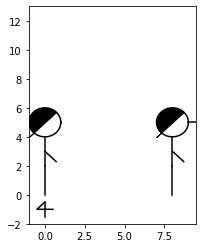

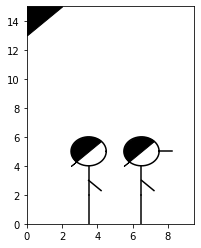

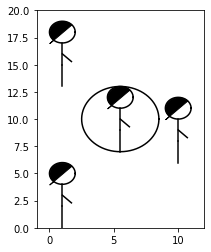

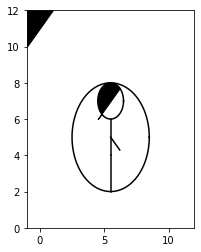

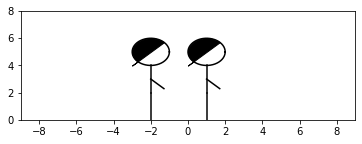

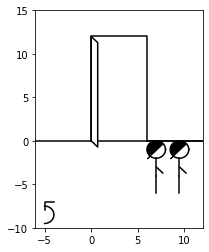

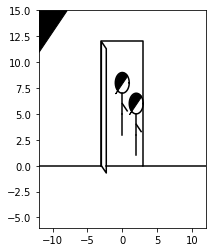

In [22]:
# [3, 0]
one_30P15= [
    ['person', man_stand_no_hold_w_arm_no_nose, [0, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm, [8, 0], 'black', False],
    ['other',{'x':np.array([0, -0.5, 0.5]), 'y':np.array([-0.5, -1, -1])}, [0, 0], 'black', False],
    ['other',{'x':np.array([0, 0]), 'y':np.array([-0.5, -1.5])}, [0, 0], 'black', False]
]
fig1_30P15 = draw(3, 4, (-1, 9.5), (-2,13), one_30P15)
fig1_30P15.savefig("fig1_30P15")
one_30P15_partB= [
    ['other',
            {'x_lower':0, 'x_upper': 2, 'y_low_i':13, 'y_low_f':15, 'y_high_i':15, 'y_high_f':15}, [0, 0], 'black', True],
    ['person', man_stand_no_hold_w_arm_no_nose, [3.5, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm, [6.5, 0], 'black', False],
]
fig1_30P15_partB = draw(3, 4, (0, 9.5), (0,15), one_30P15_partB)
fig1_30P15_partB.savefig("fig1_30P15_partB")

# [3, 1]
one_31P15= [
    ['person', man_stand_no_hold_w_arm_no_nose, [1, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [1, 13], 'black', False],
    ['circle', {'radius':3,
                        'centroid':[5.5, 10]}, [0, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [5.5, 7], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [10, 6], 'black', False]
]
fig1_31P15 = draw(3, 4, (-1, 12), (0,20), one_31P15)
fig1_31P15.savefig("fig1_31P15")

one_31P15_partB= [
    ['other',
            {'x_lower':-1, 'x_upper': 1, 'y_low_i':10, 'y_low_f':12, 'y_high_i':12, 'y_high_f':12}, [0, 0], 'black', True],
    ['circle', {'radius':3,
                        'centroid':[5.5, 5]}, [0, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [5.5, 2], 'black', False]
]
fig1_31P15_partB = draw(3, 4, (-1, 12), (0, 12), one_31P15_partB)
fig1_31P15_partB.savefig("fig1_31P15_partB")
one_32P15_up = [['person', man_stand_no_hold_w_arm_no_nose, [-2, 0], 'black', False],
                ['person', man_stand_no_hold_w_arm_no_nose, [1, 0], 'black', False]]   

fig1_32P15_up= draw(6, 2, (-9, 9), (0,8), one_32P15_up)
fig1_32P15_up.savefig("fig1_32P15_up") 

one_32P15_bottom_left = [['door', door_plan, [0, 0], 'black', False],
    ['other', {'x':np.array([-6,0]), 'y':np.array([0,0])}, [0, 0], 'black', False],
    ['other', {'x':np.array([6,20]), 'y':np.array([0,0])}, [0, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [7, -6], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [9.5, -6], 'black', False],
    ['other', {'x':np.array([6,20]), 'y':np.array([0,0])}, [0, 0], 'black', False],
    ['other', {'x':np.array([-4, -5, -5]), 
               'y':np.array([-7, -7, -8])}, [0, 0], 'black', False],
    ['other', {'x':np.cos(np.linspace( -np.pi/2, np.pi/2, 150  )) -5, 
               'y':np.sin(np.linspace( -np.pi/2, np.pi/2, 150  )) -8.5}, [0, 0], 'black', False]
]
fig1_32P15_bottom_left= draw(3, 4, (-6, 12), (-10,15), one_32P15_bottom_left)
fig1_32P15_bottom_left.savefig("fig1_32P15_bottom_left") 

one_32P15_bottom_right  = [['other',
            {'x_lower':-12, 'x_upper': -8, 'y_low_i':11, 'y_low_f':15, 'y_high_i':15, 'y_high_f':15}, [0, 0], 'black', True],
    ['door', door_plan, [-3, 0], 'black', False],
    ['other', {'x':np.array([-12,-3]), 'y':np.array([0,0])}, [0, 0], 'black', False],
    ['other', {'x':np.array([3,12]), 'y':np.array([0,0])}, [0, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [0, 3], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [2, 1], 'black', False]
]
fig1_32P15_bottom_right= draw(3, 4, (-12, 12), (-6,15), one_32P15_bottom_right)
fig1_32P15_bottom_right.savefig("fig1_32P15_bottom_right") 


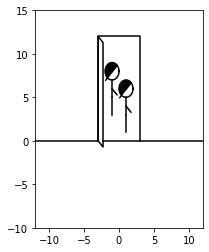

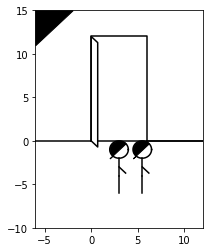

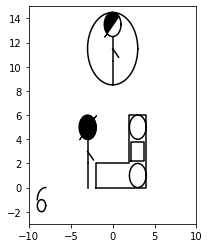

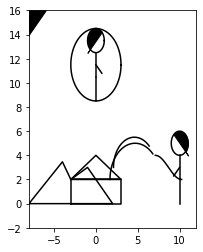

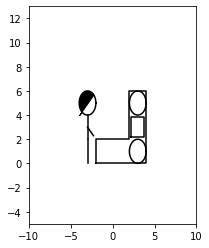

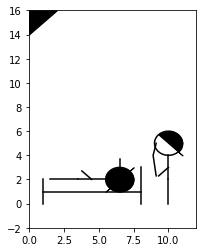

In [23]:
one_40P15 = [['door', door_plan, [-3, 0], 'black', False],
    ['other', {'x':np.array([-12,-3]), 'y':np.array([0,0])}, [0, 0], 'black', False],
    ['other', {'x':np.array([3,12]), 'y':np.array([0,0])}, [0, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [-1, 3], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [1, 1], 'black', False]
]
fig1_40P15_bottom_left= draw(3, 4, (-12, 12), (-10,15), one_40P15)
fig1_40P15_bottom_left.savefig("fig1_40P15_bottom_left") 

one_40P15_partB  = [['other',
            {'x_lower':-6, 'x_upper': -2, 'y_low_i':11, 'y_low_f':15, 'y_high_i':15, 'y_high_f':15}, [0, 0], 'black', True],
    ['door', door_plan, [0, 0], 'black', False],
    ['other', {'x':np.array([-6,0]), 'y':np.array([0,0])}, [0, 0], 'black', False],
    ['other', {'x':np.array([6,20]), 'y':np.array([0,0])}, [0, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [3, -6], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [5.5, -6], 'black', False],
    ['other', {'x':np.array([6,20]), 'y':np.array([0,0])}, [0, 0], 'black', False],
]
fig1_40P15= draw(3, 4, (-6, 12), (-10,15), one_40P15_partB)
fig1_40P15.savefig("fig1_40P15_bottom_right") 

one_41P15= [
    ['circle', {'radius':3,
                        'centroid':[0, 11.5]}, [0, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [0, 8.5], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [-3, 0], 'black', True],
    ['other', {
        'x': np.array([-2, -2, 2, 2, 4, 4, -2]),
        'y': np.array([0, 2, 2,6, 6, 0, 0]),
    }, [0, 0], 'black', False],
    ['circle', {'radius':1,
                        'centroid':[3, 5]}, [0, 0], 'black', False],
    ['circle', {'radius':1,
                        'centroid':[3, 1]}, [0, 0], 'black', False],
    ['other', {
        'x':  1 * np.cos( np.linspace(np.pi/2, np.pi, 75)) - 8,
        'y':  1 * np.sin( np.linspace(np.pi/2, np.pi, 75)) - 1,
    }, [0, 0], 'black', False],
    ['circle', {'radius':0.5,
                        'centroid':[-8.5, -1.5]}, [0, 0], 'black', False],
    ['box',{'origin':[2.2,2.2],
                        'height': 1.6,
                        "length": 1.6},
                        [0, 0],'black', False]
]
fig1_41P15= draw(3, 4, (-10, 10), (-3,15), one_41P15)
fig1_41P15.savefig("fig1_41P15") 
one_41P15_partB= [
    ['other',
            {'x_lower':-10, 'x_upper': -6, 'y_low_i':12, 'y_low_f':16, 'y_high_i':16, 'y_high_f':16}, [0, 0], 'black', True],
    ['circle', {'radius':3,
                        'centroid':[0, 11.5]}, [0, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm_no_nose, [0, 8.5], 'black', False],
    ['person', man_stand_no_hold_w_arm_left_no_nose, [10, 0], 'black', False],
    ['other', {
        'x':  np.array([-8, -4, -3, -1, 2, -8]),
        'y':  np.array([0, 2*np.sqrt(3), 2, 3, 0, 0]),
    }, [0, 0], 'black', False],
    ['box',{'origin':[-3,0],
                        'height': 2,
                        "length": 6},
                        [0, 0],'black', False],
    ['other', {
        'x':np.array([-3, 0, 3, -3]),
        'y':np.array([2, 4, 2, 2])
    }, [0, 0],'black', False],
    ['other', {
        'x':np.linspace(0, np.pi, 150),
        'y':np.cos(np.linspace(0, np.pi, 150)) + 2
    }, [7.1, 1],'black', False],
    ['other', {
        'x':3*np.cos(np.linspace(np.pi/4, np.pi, 150)),
        'y':3*np.sin(np.linspace(np.pi/4, np.pi, 150))
    }, [4.68, 2],'black', False],
    ['other', {
        'x':2.5*np.cos(np.linspace(np.pi/4, np.pi, 150)),
        'y':2.5*np.sin(np.linspace(np.pi/4, np.pi, 150))
    }, [4.6, 3],'black', False],
    #['box',{'origin':[2.2,2.2],
    #                    'height': 1.6,
    #                    "length": 1.6},
    #                    [0, 0],'black', False]
]
fig1_41P15_partB= draw(3, 4, (-8, 12), (-2,16), one_41P15_partB)
fig1_41P15_partB.savefig("fig1_41P15_partB") 
# [4, 2]
# top figure is same as [1, 2] up
one_42P15_bottom_left= [
    
    ['person', man_stand_no_hold_w_arm_no_nose, [-3, 0], 'black', False],
    ['other', {
        'x': np.array([-2, -2, 2, 2, 4, 4, -2]),
        'y': np.array([0, 2, 2,6, 6, 0, 0]),
    }, [0, 0], 'black', False],
    ['circle', {'radius':1,
                        'centroid':[3, 5]}, [0, 0], 'black', False],
    ['circle', {'radius':1,
                        'centroid':[3, 1]}, [0, 0], 'black', False],
    
    ['box',{'origin':[2.2,2.2],
                        'height': 1.6,
                        "length": 1.6},
                        [0, 0],'black', False]
]
fig1_42P15_bottom_left= draw(3, 4, (-10, 10), (-5,13), one_42P15_bottom_left)
fig1_42P15_bottom_left.savefig("fig1_42P15_bottom_left") 
one_42P15_bottom_right= [
    ['other',
            {'x_lower':0, 'x_upper': 2, 'y_low_i':14, 'y_low_f':16, 'y_high_i':16, 'y_high_f':16}, [0, 0], 'black', True],
    ['person', man_stand_no_hold_w_arm_left_no_nose, [10, 0], 'black', False],
    ['other', 
     {'x': np.array([9.12, 8.9, 9.12]), 'y': np.array([2.3, 4, 5])}, [0, 0], 'black', False],
    ['bed', {
        'origin':[1, 0],
        'direction':'left',
        'height':2,
        'length':7,
        'gap':1,
        'scale':1
    },[0, 0], 'black', False],
    ['person', man_stand_no_hold_w_arm_left_lying, [1.5, 2], 'black', True]
]
fig1_42P15_bottom_right= draw(3, 4, (0, 12), (-2,16), one_42P15_bottom_right)
fig1_42P15_bottom_right.savefig("fig1_42P15_bottom_right") 


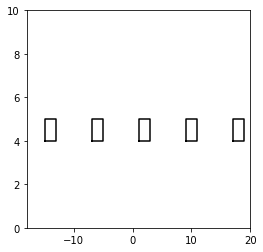

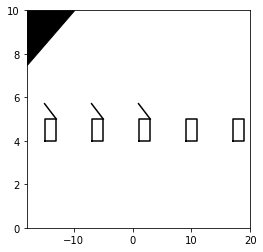

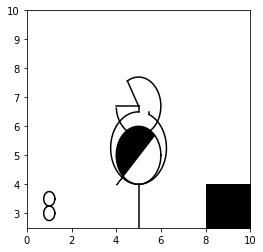

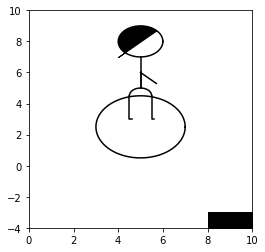

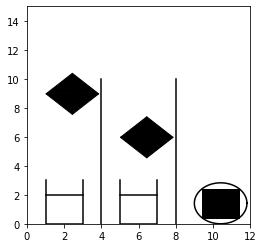

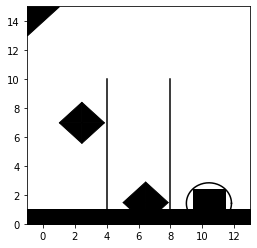

In [24]:
[5, 0]
one_50P15 = [
    ['box',{'origin':[-15,0],
                        'height': 1,
                        "length": 2},
                        [0, 4],'black', False],
    ['box',{'origin':[-7,0],
                        'height': 1,
                        "length": 2},
                        [0, 4],'black', False],
    ['box',{'origin':[1,0],
                        'height': 1,
                        "length": 2},
                        [0, 4],'black', False],
    ['box',{'origin':[9,0],
                        'height': 1,
                        "length": 2},
                        [0, 4],'black', False],
    ['box',{'origin':[17,0],
                        'height': 1,
                        "length": 2},
                        [0, 4],'black', False]
]
fig1_50P15= draw(4, 4, (-18, 20), (0,10), one_50P15)
fig1_50P15.savefig("fig1_50P15") 
one_50P15_partB = [
    ['other',
            {'x_lower':-18, 'x_upper': -10, 'y_low_i':7.5, 'y_low_f':10, 'y_high_i':10, 'y_high_f':10}, [0, 0], 'black', True],
    ['box',{'origin':[-15,0],
                        'height': 1,
                        "length": 2},
                        [0, 4],'black', False],
    ['other', {
        'x': np.array([-15, -13]),
        'y': np.array([1 + np.sqrt(2)/2, 1])
    }, [0, 4],'black', False],
    ['box',{'origin':[-7,0],
                        'height': 1,
                        "length": 2},
                        [0, 4],'black', False],
    ['other', {
        'x': np.array([-7, -5]),
        'y': np.array([1 + np.sqrt(2)/2, 1])
    }, [0, 4],'black', False],
    ['box',{'origin':[1,0],
                        'height': 1,
                        "length": 2},
                        [0, 4],'black', False],
    ['other', {
        'x': np.array([1, 3]),
        'y': np.array([1 + np.sqrt(2)/2, 1])
    }, [0, 4],'black', False],
    ['box',{'origin':[9,0],
                        'height': 1,
                        "length": 2},
                        [0, 4],'black', False],
    ['box',{'origin':[17,0],
                        'height': 1,
                        "length": 2},
                        [0, 4],'black', False]
]
fig1_50P15_partB= draw(4, 4, (-18, 20), (0,10), one_50P15_partB)
fig1_50P15_partB.savefig("fig1_50P15_partB")
# 5, 1
#np.arctan(1.25/.5) + 2*np.pi
one_51P15_bottom_left = [
    ['person', man_stand_no_hold_no_nose, [5, 0], 'black', False],
    ['other', {
        'x':1.25*np.cos( np.linspace(np.pi/2, np.arctan(1.25/.5) + 2*np.pi, 150) ) + 5,
        'y':1.25*np.sin( np.linspace(np.pi/2, np.arctan(1.25/.5) + 2*np.pi, 150) ) + 5.25,
    },[0, 0], 'black', False],
    ['other', {
        'x':1*np.cos( np.linspace(4.1*np.pi/4, (2/3)*np.pi + 2*np.pi, 150) ) + 5,
        'y':1*np.sin( np.linspace(4.1*np.pi/4, (2/3)*np.pi + 2*np.pi, 150) ) + 6.7,
    },[0, 0], 'black', False],
    ['other', {
        'x':np.array([np.cos(4.1*np.pi/4 ) + 5, 5]),
        'y':np.array([6.7, 6.7])
    },[0, 0], 'black', False],
    ['other', {
        'x':np.array([5, 5]),
        'y':np.array([6.5, 6.7])
    },[0, 0], 'black', False],
    ['other', {
        'x':np.array([np.cos(4.1*np.pi/4 ) + 5,np.cos(4.1*np.pi/4 ) + 5]),
        'y':np.array([6.7, 6.7])
    },[0, 0], 'black', False],
    
    ['other', {
        'x':np.array([1.25*np.cos(np.arctan(1.25/.5)) + 5, 1.25*np.cos(np.arctan(1.25/.5)) + 5]),
        'y':np.array([1.25*np.sin(np.arctan(1.25/.5)) + 5.25, 1.25*np.sin(np.arctan(1.25/.5)) + 5.25 + 0.1])
    },[0, 0], 'black', False],
    ['other', {
        'x':np.array([np.cos(2*np.pi/3) + 5 , 5]),
        'y':np.array([np.sin(2*np.pi/3) + 6.7, 6.7])
    },[0, 0], 'black', False],
    ['box',{'origin':[8,2],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', True],
    ['circle', {'radius':.25,
                        'centroid':[1, 3.5]}, [0, 0], 'black', False],
    ['circle', {'radius':.25,
                        'centroid':[1, 3]}, [0, 0], 'black', False]
]
fig1_51P15_bottom_left= draw(4, 4, (0, 10), (2.5,10), one_51P15_bottom_left)
fig1_51P15_bottom_left.savefig("fig1_51P15_bottom_left")
one_51P15_bottom_right = [
    ['person', man_stand_no_hold_w_arm_no_nose, [5, 3], 'black', False, 'leg'],
    ['other', {
        'x': 0.5*np.cos( np.linspace(0, np.pi, 150)) + 5,
        #np.concatenate(np.array([4.6, 4.5, 4.5])  ,, np.array([5.5, 5.5, 5.6])) , 
        'y': 0.5*np.sin( np.linspace(0, np.pi, 150)  ) + 4.5 #np.concatenate(np.array([5, 5, 5.5])  , np.array([5.5, 5, 5.5]) ) 
    },[0, 0], 'black', False],
    ['other', {
        'x': np.array([5, 5]),
        #np.concatenate(np.array([4.6, 4.5, 4.5]) , np.array([5.5, 5.5, 5.6])) , 
        'y': np.array([5, 6])
    },[0, 0], 'black', False],
    ['other', {
        'x': np.array([4.6, 4.5, 4.5]),
        #np.concatenate(np.array([4.6, 4.5, 4.5]) , np.array([5.5, 5.5, 5.6])) , 
        'y': np.array([3, 3, 4.5]) #np.concatenate(np.array([5, 5, 5.5])  , np.array([5.5, 5, 5.5]) ) 
    },[0, 0], 'black', False],
    ['other', {
        'x': np.array([5.5, 5.5, 5.6]),
        #np.concatenate(np.array([4.6, 4.5, 4.5]) , np.array([5.5, 5.5, 5.6])) , 
        'y': np.array([4.5, 3, 3])#np.concatenate(np.array([5, 5, 5.5])  , np.array([5.5, 5, 5.5]) ) 
    },[0, 0], 'black', False],
    ['circle', {'radius':2,
                        'centroid':[5, 2.5]}, [0, 0], 'black', False],
    ['box',{'origin':[8,-4],
                        'height': 1,
                        "length": 2},
                        [0, 0],'black', True]
]
fig1_51P15_bottom_right= draw(4, 4, (0, 10), (-4,10), one_51P15_bottom_right)
fig1_51P15_bottom_right.savefig("fig1_51P15_bottom_right")
#[5, 2]
one_52P15 = [
    ['other',
            {'x_lower':1, 'x_upper': np.sqrt(2) + 1, 'y_low_i':9, 'y_low_f': 9, 'y_high_i': 9, 'y_high_f': 9 + np.sqrt(2)}, [0, 0], 'black', True],
    ['other',
            {'x_lower':np.sqrt(2) + 1, 'x_upper': 2*np.sqrt(2) + 1, 'y_low_i':9, 'y_low_f':9, 'y_high_i': 9+ np.sqrt(2), 'y_high_f':9}, [0, 0], 'black', True],
    ['other',
            {'x_lower':1, 'x_upper': np.sqrt(2) + 1, 'y_low_i':9, 'y_low_f': 9 - np.sqrt(2), 'y_high_i': 9, 'y_high_f': 9}, [0, 0], 'black', True],
    ['other',
            {'x_lower':np.sqrt(2) + 1, 'x_upper': 2*np.sqrt(2) + 1, 'y_low_i':9- np.sqrt(2), 'y_low_f': 9, 'y_high_i': 9, 'y_high_f': 9}, [0, 0], 'black', True],
    ['line',
            {'x': np.array([4, 4]), 'y':np.array([0, 10])}, [0, 0], 'black', False],
    ['other',
            {'x': np.array([1, 1, 3, 3]), 'y':np.array([3, 0, 0, 3])}, [0, 0], 'black', False],
    ['other',
            {'x': np.array([1, 3]), 'y':np.array([2, 2])}, [0, 0], 'black', False],
    ['other',
            {'x_lower':5, 'x_upper': np.sqrt(2) + 5, 'y_low_i':6, 'y_low_f': 6, 'y_high_i': 6, 'y_high_f': 6 + np.sqrt(2)}, [0, 0], 'black', True],
    ['other',
            {'x_lower':np.sqrt(2) + 5, 'x_upper': 2*np.sqrt(2) + 5, 'y_low_i':6, 'y_low_f':6, 'y_high_i': 6+ np.sqrt(2), 'y_high_f':6}, [0, 0], 'black', True],
    ['other',
            {'x_lower':5, 'x_upper': np.sqrt(2) + 5, 'y_low_i':6, 'y_low_f': 6 - np.sqrt(2), 'y_high_i': 6, 'y_high_f': 6}, [0, 0], 'black', True],
    ['other',
            {'x_lower':np.sqrt(2) + 5, 'x_upper': 2*np.sqrt(2) + 5, 'y_low_i':6- np.sqrt(2), 'y_low_f': 6, 'y_high_i': 6, 'y_high_f': 6}, [0, 0], 'black', True],
    ['line',
            {'x': np.array([5, 5, 7, 7]), 'y':np.array([3, 0, 0, 3])}, [0, 0], 'black', False],
    ['line',
            {'x': np.array([5, 7]), 'y':np.array([2, 2])}, [0, 0], 'black', False],
    ['line',
            {'x': np.array([8, 8]), 'y':np.array([0, 10])}, [0, 0], 'black', False],
    ['circle', {'radius':np.sqrt(2),
                        'centroid':[ 9 + np.sqrt(2), np.sqrt(2)]}, [0, 0], 'black', False],
    ['box',{'origin':[9 + np.sqrt(2) - 1 , np.sqrt(2) - 1],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', True]
]
fig1_52P15= draw(4, 4, (0, 12), (0,15), one_52P15)
fig1_52P15.savefig("fig1_52P15")
one_52P15_partB = [
    ['other',
            {'x_lower':-1, 'x_upper': 1, 'y_low_i':13, 'y_low_f':15, 'y_high_i':15, 'y_high_f':15}, [0, 0], 'black', True],
    
    ['other',
            {'x_lower':1, 'x_upper': np.sqrt(2) + 1, 'y_low_i':7, 'y_low_f': 7, 'y_high_i': 7, 'y_high_f': 7 + np.sqrt(2)}, [0, 0], 'black', True],
    ['other',
            {'x_lower':np.sqrt(2) + 1, 'x_upper': 2*np.sqrt(2) + 1, 'y_low_i':7, 'y_low_f':7, 'y_high_i': 7 + np.sqrt(2), 'y_high_f':7}, [0, 0], 'black', True],
    ['other',
            {'x_lower':1, 'x_upper': np.sqrt(2) + 1, 'y_low_i':7, 'y_low_f': 7 - np.sqrt(2), 'y_high_i': 7, 'y_high_f': 7}, [0, 0], 'black', True],
    ['other',
            {'x_lower':np.sqrt(2) + 1, 'x_upper': 2*np.sqrt(2) + 1, 'y_low_i':7- np.sqrt(2), 'y_low_f': 7, 'y_high_i': 7, 'y_high_f': 7}, [0, 0], 'black', True],
    ['line',
            {'x': np.array([4, 4]), 'y':np.array([0, 10])}, [0, 0], 'black', False],
    ['other',
            {'x_lower':5, 'x_upper': np.sqrt(2) + 5, 'y_low_i':1.5, 'y_low_f': 1.5, 'y_high_i': 1.5, 'y_high_f': 1.5 + np.sqrt(2)}, [0, 0], 'black', True],
    ['other',
            {'x_lower':np.sqrt(2) + 5, 'x_upper': 2*np.sqrt(2) + 5, 'y_low_i':1.5, 'y_low_f':1.5, 'y_high_i': 1.5+ np.sqrt(2), 'y_high_f':1.5}, [0, 0], 'black', True],
    ['other',
            {'x_lower':5, 'x_upper': np.sqrt(2) + 5, 'y_low_i':1.5, 'y_low_f': 1.5 - np.sqrt(2), 'y_high_i': 1.5, 'y_high_f': 1.5}, [0, 0], 'black', True],
    ['other',
            {'x_lower':np.sqrt(2) + 5, 'x_upper': 2*np.sqrt(2) + 5, 'y_low_i':1.5- np.sqrt(2), 'y_low_f': 1.5, 'y_high_i': 1.5, 'y_high_f': 1.5}, [0, 0], 'black', True],
    ['line',
            {'x': np.array([8, 8]), 'y':np.array([0, 10])}, [0, 0], 'black', False],
    ['circle', {'radius':np.sqrt(2),
                        'centroid':[ 9 + np.sqrt(2), np.sqrt(2)]}, [0, 0], 'black', False],
    ['box',{'origin':[9 + np.sqrt(2) - 1 , np.sqrt(2) - 1],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', True],
    ['box',{'origin':[-1 , 0],
                        'height': 1,
                        "length": 14},
                        [0, 0],'black', True]
]
fig1_52P15_partB= draw(4, 4, (-1, 13), (0,15), one_52P15_partB)
fig1_52P15_partB.savefig("fig1_52P15_partB")

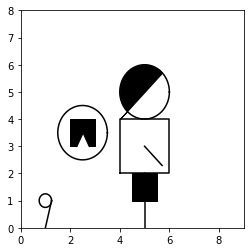

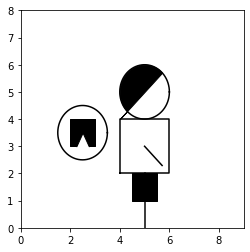

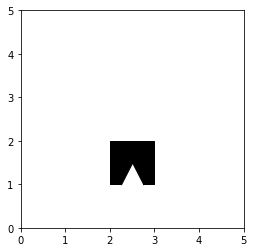

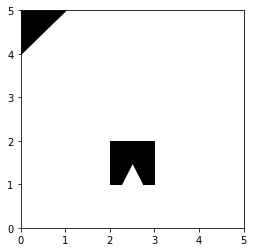

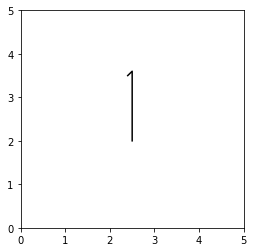

In [25]:
one_60P15 = [
    ['circle', {'radius':1,
                        'centroid':[2.5, 3.5]}, [0, 0], 'black', False],
    ['pant', {'origin':[2, 3],
               'waist width':1,
               'leg width': 0.25, 
               'length':1
        
    },[0, 0], 'black', True],
    ['person', man_stand_no_hold_w_arm_no_nose, [5, 0], 'black', False, 'body'],
    ['box',{'origin':[4,2],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', False],
    ['box',{'origin':[4.5,1],
                        'height': 1,
                        "length": 1},
                        [0, 0],'black', True],
    ['circle', {'radius':.25,
                        'centroid':[1, 1]}, [0, 0], 'black', False],
    ['other', {'x':np.array([1, 1.25]),
               'y':np.array([0, 1.])}, [0, 0], 'black', False],
]
fig1_60P15= draw(4, 4, (0, 9), (0,8), one_60P15)
fig1_60P15.savefig("fig1_60P15")
one_60P15_partB = [
    ['other',
            {'x_lower':0, 'x_upper': 1, 'y_low_i':8, 'y_low_f':9, 'y_high_i':9, 'y_high_f':9}, [0, 0], 'black', True],
    ['circle', {'radius':1,
                        'centroid':[2.5, 3.5]}, [0, 0], 'black', False],
    ['pant', {'origin':[2, 3],
               'waist width':1,
               'leg width': 0.25, 
               'length':1
        
    },[0, 0], 'black', True],
    ['person', man_stand_no_hold_w_arm_no_nose, [5, 0], 'black', False, 'body'],
    ['box',{'origin':[4,2],
                        'height': 2,
                        "length": 2},
                        [0, 0],'black', False],
    ['box',{'origin':[4.5,1],
                        'height': 1,
                        "length": 1},
                        [0, 0],'black', True]
]
fig1_60P15_partB= draw(4, 4, (0, 9), (0,8), one_60P15_partB)
fig1_60P15_partB.savefig("fig1_60P15_partB")
one_61P15 = [

    ['pant', {'origin':[2, 1],
               'waist width':1,
               'leg width': 0.25, 
               'length':1
        
    },[0, 0], 'black', True]
]
fig1_61P15= draw(4, 4, (0, 5), (0,5), one_61P15)
fig1_61P15.savefig("fig1_61P15")
one_61P15_partB = [
    ['other',
            {'x_lower':0, 'x_upper': 1, 'y_low_i':4, 'y_low_f':5, 'y_high_i':5, 'y_high_f':5}, [0, 0], 'black', True],

    ['pant', {'origin':[2, 1],
               'waist width':1,
               'leg width': 0.25, 
               'length':1
        
    },[0, 0], 'black', True],
    
]
fig1_61P15_partB= draw(4, 4, (0, 5), (0,5), one_61P15_partB)
fig1_61P15_partB.savefig("fig1_61P15_partB")
one_62P15 = [

    ['number', {'x':np.array([2.4, 2.5, 2.5]),
               'y':np.array([3.5, 3.6, 2]),
        
    },[0, 0], 'black', False]
]
fig2_61P15= draw(4, 4, (0, 5), (0,5), one_62P15)
fig2_61P15.savefig("fig1_62P15")

In [45]:
def parsing(sentence, translation_sentence, language_to_translate):
    # word db
    word_list = nltk.tokenize.word_tokenize(sentence)
    word_list_property = dict( nltk.pos_tag( word_list ) )
    words = list(word_list_property.keys())
    # words then translation to other language
    english_to_language = dict()
    if language_to_translate == 'Chinese':
        english_to_language = english_to_chinese(words)
    property_list = list(word_list_property.values())
    print(property_list)
    # end word db
    time_frame = ' '
    time_frame_list = ['now', 'yesterday', 'today', 'tomorrow']
    verb_list = dict( [(i, words[i]) for i, e in enumerate(property_list) if "VB" in e] )
    verb = ''
    verb_index = 0
    subject = 'person'; subject_index = 0
    objects = None; object_index = 0
    if len(verb_list)>0:
        verb = list(verb_list.values())[-1]
        verb_index = list(verb_list.keys())[-1]
    else:
        verb = list(verb_list.values())[0]
        verb_index = list(verb_list.keys())[0]
    if  WordNetLemmatizer().lemmatize( verb,'v' ) != 'be':
        verb = WordNetLemmatizer().lemmatize( verb,'v' )
    if verb == 'pick' and words.index('pick') + 1 == words.index('up'):
        verb = verb + ' up'
    time_index = 0
    subject_list = dict( [(i, words[i]) for i, e in enumerate(property_list) if "NN" in e] )
    print(len(subject_list))
    n_index = 0
    sentimental_list = dict( [(i, words[i]) for i, e in enumerate(property_list) if "JJ" in e] )
    sentimental = 'not yet'
    for k, v in subject_list.items():
        if v in time_frame_list:
            time_index = k
            time_frame = v
    sentimental_subject = None
    if time_frame in subject_list.values():
        del subject_list[time_index]
    if len(subject_list) == 0:
        # Such as sentences: 'get up!', or 'go!'
        objects = None
    elif len(subject_list)==1:
        # example: 'The man is strong'
        n_index = list(subject_list.keys())[0]
        if "JJ" in property_list:
            subject =list(subject_list.values())[0]
            sentimental = list(sentimental_list.values())[0]
        else:
            if n_index < verb_index:
                # sentence such as: 'The man drives!'
                objects = None
                subject = list(subject_list.values())[0]
            else:
                # sentence such as: 'Get a job!'
                subject = None
                objects = list(subject_list.values())[0]
    else:
        # sentence as" S + V + O"
        if "JJ" in property_list:
            if len(sentimental_list)>1:
                sentimental_subject = list(sentimental_list.values())[0]
                sentimental = list(sentimental_list.values())[-1]
            else:
                sentimental = list(sentimental_list.values())[0]
        subject =list(subject_list.values())[0]
        objects = list(subject_list.values())[-1]
    print(subject_list)
    print('subject = ', subject)
    print('verb = ', verb)
    print('object = ', objects)
    print('time frame =', time_frame)
    if 'JJ' in property_list:
        if sentimental_subject is not None:
            return {'subject': subject, 'verb':verb, 'subject adjective': sentimental_subject,'object adjective': sentimental, 'object': objects}, word_list_property, time_frame, english_to_language
        else:
            return {'subject': subject, 'verb':verb, 'adjective': sentimental, 'object': objects}, word_list_property, time_frame, english_to_language
    else:
        return {'subject': subject, 'verb':verb, 'object': objects}, word_list_property, time_frame, english_to_language
def english_to_chinese(word_list):
    global man_audio, box_audio, open_audio, pick_up_audio, will_audio
    result = dict()
    noun_translation = {
        'man': ['男人', man_audio],
        'box': ['盒子', box_audio],
    }
    verb_translation = {
        'open':['打开',open_audio],
        'pick up':['拿起',pick_up_audio]
    }
    other_translation = {
        'will': ['将', will_audio]
    }
    for e in word_list:
        print(e)
        if e in verb_translation.keys():
            result[e] = verb_translation[e][0]
            play
        elif e in noun_translation.keys():
            result[e] = noun_translation[e][0]
        elif e in other_translation.keys():
            result[e] = other_translation[e][0]
        elif WordNetLemmatizer().lemmatize(e,'v' ) in verb_translation and 'ing' in e:
            result[e] = '正在' + verb_translation[e]
    return result

def sentence_to_list(sentence, x_pic_i, x_pic_f,  y_pic_i, y_pic_f, translation_word, foreign_language, two_sentence = True):
    import string
    if sentence[-1] in string.punctuation:
        sentence = sentence[:-1]
    sentence_list = []
    time_frame1 = ''
    time_frame2 = ''
    english_dictionary = dict()
    if two_sentence:
        translation_word1 =  translation_word[0]
        translation_word2 =  translation_word[1]
        english_dictionary2 = dict()
        if "." in sentence and sentence[-1]!=".":
            sentence_list = sentence.split(". ")
        elif "?" in sentence and sentence[-1]!="?":
            sentence_list = sentence.split("? ")
        else:
            sentence_list = re.split(r', |; |: ', sentence)
        items_in_sentence_1, word_list_property1, time_frame1, english_dictionary = parsing(sentence_list[0], translation_word1, foreign_language)
        items_in_sentence_2, word_list_property2, time_frame2, english_dictionary2 = parsing(sentence_list[1], translation_word2, foreign_language)
        return language_processing(sentence_list[0], items_in_sentence_1,word_list_property1, x_pic_i, x_pic_f,  y_pic_i, y_pic_f,time_frame1), language_processing(sentence_list[1],word_list_property2, items_in_sentence_2, x_pic_i, x_pic_f,  y_pic_i, y_pic_f, time_frame2), english_dictionary, english_dictionary2
    else: 
        result = parsing(sentence,  translation_word, foreign_language)
        #if len(result)==4:
        time_frame1 = result[2]
        english_dictionary = result[3]
        items_in_sentence1 = result[0]
        word_list_property1 = result[1]
        pic = language_processing(sentence, items_in_sentence1, word_list_property1 ,x_pic_i, x_pic_f,  y_pic_i, y_pic_f, time_frame1)
        return english_dictionary
#end of initial reception function sentence_to_list
def language_processing(sentence, sentence_item, word_list_property, x_pic_i, x_pic_f,  y_pic_i, y_pic_f, time_frame):
    print(sentence_item)
    # sentence: original sentence, such as "The person holds a box"
    # sentence_item: {'subject': ..., 'verb': ..., 'object': ...} OR word_list_property: {'subject': ..., 'verb': ..., 'adjective': ...}
    # word_list_property: {"Man": "NN", "picks":"VB"...} saves all the word properties
    global man_stand_no_hold_w_arm_no_nose, table_plan, man_bow_no_nose, man_stand, man_stand_no_nose,man_stand_no_hold, man_stand_no_hold_no_nose,man_stand_no_hold_w_arm 
    global man_stand_no_hold_w_arm_lying, man_stand_no_hold_w_arm_child, man_stand_no_hold_w_arm_no_nose
    global man_bow_left ,man_bow_left_no_nose, man_stand_left, man_stand_left_no_nose, man_stand_no_hold_left, man_stand_no_hold_left_no_nose, man_stand_no_hold_w_arm_left
    global man_stand_no_hold_w_arm_left_lying, man_stand_no_hold_w_arm_child_left, man_stand_no_hold_w_arm_left_no_nose
    global door_plan, door_plan_right
    word_list = list(word_list_property.keys())
    pic_item = [] #output 1
    man_list = ['man', 'woman', 'men', 'women', 'lady', 'child', 'children', 'kid', 'kids', 'person']
    color_db = ['red', 'yellow', 'green', 'blue', 'pink', 'orange', 'black', 'white', 'purple']
    color = ''
    property_list = list(dict(word_list_property).values())
    a, b = 0, 0
    r = 0 # init for sentence with will
    # item extraction from input
    objects = ''
    subject_adjective = None
    object_adjective = None
    adjective = None
    subject = sentence_item['subject']
    verb = sentence_item['verb']
    if 'object' in sentence_item.keys():
        objects = sentence_item['object']
    else:
        objects = None
    if 'adjective' in sentence_item.keys():
        adjective = sentence_item['adjective']
        print('adjective =', adjective)
    elif 'subject adjective' in sentence_item.keys():
        subject_adjective = sentence_item['subject adjective']
        object_adjective = sentence_item['object adjective']
        print('subject adjective =', adjective, '; object adjective =', object_adjective)
    # end of item - extraction
    color_subject, color_object = None, None
    if adjective in color_db:
        color = adjective
        print('color =', color)
    if subject_adjective is not None and object_adjective in color_db:
        color_subject = subject_adjective
        print('color subject=', color_subject)
    if object_adjective is not None and object_adjective in color_db:
        color_object = object_adjective
        print('color object=', color_object)
    print('subject', subject)
    print('verb =', verb)
    print('object=', objects)
    pic_item1 = []
    flower ={"root":np.array([0, 0]), 'radius':0.25, "stem length":1,"color": 'r'}
    if 'can' in sentence:
        pic_item2 = [] # output 3
        if subject in man_list:
                pic_item.append(['person', man_stand_no_hold_w_arm_no_nose, [x_pic_f/2,   1 + y_pic_f/2], 'black', False])
                pic_item2.append(['person', man_stand_no_hold_w_arm_no_nose, [x_pic_f/2, 1 + y_pic_f/2], 'black', False])
        #elif subject in ...:
        #    print()
        pic_item.append(['circle', 
                        {'radius':3,
                        'centroid':[x_pic_f/2, 4 + y_pic_f/2]}, 
                        [0, 0], 'black', False])
        pic_item2.append(['circle', 
                        {'radius':3,
                        'centroid':[x_pic_f/2, 4 + y_pic_f/2]}, 
                        [0, 0], 'black', False])
    elif 'will' in sentence or 'would' in sentence:
        print('will')
        r = min(x_pic_f/5, y_pic_f/5)
        pic_item.append(
                ['circle', {'radius': int(r),
                        'centroid':[0.75*x_pic_f, 0.75*y_pic_f]}, [0, 0], 'black', False]
        )
        pic_item.append(
                ['other',
                 {'x': [x_pic_f/2, x_pic_f/2],
                  'y': [y_pic_f/2, y_pic_f]},
                [0, 0],
                'black', False]
        )
        pic_item1.append(
                ['circle', {'radius': int(r),
                        'centroid':[0.75*x_pic_f, 0.75*y_pic_f]}, [0, 0], 'black', False]
        )
        pic_item1.append(
                ['other',
                 {'x': [x_pic_f/2, x_pic_f/2],
                  'y': [y_pic_f/2, y_pic_f]},
                [0, 0],
                'black', False]
        )
    #adj
    if 'JJ' in property_list and adjective not in color_db:
        #general
        pic_item.append(['circle', 
                        {'radius':3,
                        'centroid':[x_pic_f/2, 4 + y_pic_f/2]}, 
                        [0, 0], 'black', False])
        pic_item1.append(['person', man_stand_no_hold_w_arm_no_nose, [x_pic_f/2, 1 + y_pic_f/2], 'black', False])
        if subject in man_list:
            pic_item.append(['person', man_stand_no_hold_w_arm_no_nose, [x_pic_f/2, 1 + y_pic_f/2], 'black', False])
            pic_item1.append(['circle', 
                        {'radius':3,
                        'centroid':[x_pic_f/2, 4 + y_pic_f/2]}, 
                        [0, 0], 'black', False])
    # verb
    print("time = ", time_frame)
    if 'pick' in verb:
        if verb == 'pick up':
            print('word now becomes pick up')
            if 'will' in sentence or 'would' in sentence:
                if subject in man_list:
                    pic_item.append(['person', man_bow, [2, y_pic_f/2], 'black', False])
                    pic_item1.append(['person', man_bow,[2, y_pic_f/2], 'black', False])
                if objects == 'box':
                    pic_item.append(['box', {'origin':[3,y_pic_f/2], 'height': 2, "length": 2},[0, 0],'black', False])
                    pic_item1.append(['box',{'origin':[3,y_pic_f/2], 'height': 2, "length": 2},[0, 0],'black', False])
                elif 'ball' in objects:
                    pic_item.append(['circle', {'radius': 1, 'centroid':[4, y_pic_f/2 + 1]}, [0, 0], 'black', False])
                    pic_item1.append(['circle', {'radius': 1, 'centroid':[4, y_pic_f/2 + 1]}, [0, 0], 'black', False])
                elif 'flower' in objects:
                    if color is not None:
                        flower['color'] = color
                    else:
                        flower['color'] = 'red'
                    pic_item.append(['flower', flower, [4, y_pic_f/2 + 1], flower['color'], False])
                    pic_item1.append(['flower', flower,[4, y_pic_f/2 + 1], flower['color'], False])
            # base case ...
            if 'can' not in sentence:
                # man picking up the box 
                if (subject in man_list) :
                    if time_frame=='today':
                        #1
                        pic_item.append(['person', man_bow, [1, 0], 'black', False])
                        
                        #1,2s ep
                        pic_item.append(['other',{'x': [x_pic_f/4, x_pic_f/4],'y': [0, 2*y_pic_f/5]}, [a, 0],'black', False])
                        #2
                        pic_item.append(['person', man_bow, [x_pic_f/4 + 1.5, 0], 'black', False])
                        
                        # sep 2, 3
                        pic_item.append(['other',{'x': [x_pic_f/2, x_pic_f/2],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                        pic_item.append(['box', {'origin':[x_pic_f/2, 0], 'height': y_pic_f/2.5 - y_pic_f/10, "length": x_pic_f/4},[0, 0],'black', True])
                        
                        #3,4s ep
                        pic_item.append(['other',{'x': [0.75*x_pic_f, 0.75*x_pic_f],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                        #4
                        pic_item.append(['person', man_stand, [1.5 + 0.75*x_pic_f, 0], 'black', False])
                        
                        # next
                        #1
                        pic_item1.append(['person', man_bow, [1, 0], 'black', False])
                        #1,2s ep
                        pic_item1.append(['other',{'x': [x_pic_f/4, x_pic_f/4],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                        #2
                        pic_item1.append(['person', man_stand, [x_pic_f/4 + 1.5, 0], 'black', False])
                        pic_item1.append(['box', {'origin':[x_pic_f/2, 0], 'height': y_pic_f/2.5 - y_pic_f/10, "length": x_pic_f/4},[0, 0],'black', True])
                        # sep 2, 3
                        pic_item1.append(['other',{'x': [x_pic_f/2, x_pic_f/2],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                        #3 
                        #3,4s ep
                        pic_item1.append(['other',{'x': [0.75*x_pic_f, 0.75*x_pic_f],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                        if objects == 'box':
                            pic_item.append(['box', {'origin':[2 , 0], 'height': 2, "length": 2},[a, 0],'black', False])
                            pic_item.append(['box', {'origin':[x_pic_f/4 + 2.5, 0], 'height': 2, "length": 2},[0, 0],'black', False])
                            pic_item.append(['box',{'origin':[2.5 + 0.75*x_pic_f, 2],
                                                'height': 2,
                                                "length": 2},
                                            [0, 0],'black', False])
                            pic_item1.append(['box', {'origin':[2, 0], 'height': 2, "length": 2},[0, 0],'black', False])
                            pic_item1.append(['box',{'origin':[x_pic_f/4 + 2.5,2],
                                                'height': 2,
                                                "length": 2},
                                            [0, 0],'black', False])
                        elif objects == 'ball':
                            pic_item.append(['circle', {'radius': 1, 'centroid':[3.5,1]}, [0, 0], 'black', False])
                            pic_item.append(['circle', {'radius': 1, 'centroid':[x_pic_f/4 + 3.5, 1]}, [0, 0], 'black', False])
                            pic_item.append(['circle', {'radius': 1, 'centroid':[3.5 + 0.75*x_pic_f, 3]}, [0, 0], 'black', False])
                            pic_item1.append(['circle', {'radius':1, 'centroid':[3.5, 1]}, [0, 0], 'black', False])
                            pic_item1.append(['circle', {'radius':1, 'centroid':[x_pic_f/4 + 3.5, 3]}, [0, 0], 'black', False])
                        elif 'flower' in objects:
                            if color is not None:
                                flower['color'] = color
                            else:
                                flower['color'] = 'red'
                            pic_item.append(['flower', flower, [3.8, 1], flower['color'], False])
                            pic_item.append(['flower', flower, [x_pic_f/4 + 4, 1], flower['color'], False])
                            pic_item.append(['flower', flower, [2.5 + 0.75*x_pic_f, 3.5], flower['color'], False])
                            pic_item1.append(['flower', flower, [3.8, 1], flower['color'], False])
                            pic_item1.append(['flower', flower, [2.5 + x_pic_f/4, 3.5], flower['color'], False])
                    elif time_frame=='tomorrow':
                        #1
                        pic_item1.append(['person', man_bow, [1, 0], 'black', False])
                        #1,2s ep
                        pic_item1.append(['other',{'x': [x_pic_f/4, x_pic_f/4],'y': [0, 2*y_pic_f/5]}, [a, 0],'black', False])
                        #2
                        pic_item1.append(['person', man_bow, [x_pic_f/4 + 1.5, 0], 'black', False])
                        
                        # sep 2, 3
                        pic_item1.append(['other',{'x': [x_pic_f/2, x_pic_f/2],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                        #3 
                        pic_item1.append(['box', {'origin':[x_pic_f/2, 0], 'height': y_pic_f/2.5 - y_pic_f/10, "length": x_pic_f/4},[0, 0],'black', True])
                        #3,4s ep
                        pic_item1.append(['other',{'x': [0.75*x_pic_f, 0.75*x_pic_f],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                        #4
                        pic_item1.append(['person', man_stand, [1.5 + 0.75*x_pic_f, 0], 'black', False])
                        # next
                        #1
                        pic_item.append(['person', man_bow, [1, 0], 'black', False])
                        
                        #1,2s ep
                        pic_item.append(['other',{'x': [x_pic_f/4, x_pic_f/4],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                        #2
                        pic_item.append(['person', man_stand, [x_pic_f/4 + 1.5, 0], 'black', False])
                        pic_item.append(['box', {'origin':[x_pic_f/2, 0], 'height': y_pic_f/2.5 - y_pic_f/10, "length": x_pic_f/4},[0, 0],'black', True])
                        # sep 2, 3
                        pic_item.append(['other',{'x': [x_pic_f/2, x_pic_f/2],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                        #3,4s ep
                        pic_item.append(['other',{'x': [0.75*x_pic_f, 0.75*x_pic_f],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                        if objects == 'box':
                            pic_item1.append(['box', {'origin':[2 , 0], 'height': 2, "length": 2},[a, 0],'black', False])
                            pic_item1.append(['box', {'origin':[x_pic_f/4 + 2.5, 0], 'height': 2, "length": 2},[0, 0],'black', False])
                            
                            pic_item1.append(['box',{'origin':[2.5 + 0.75*x_pic_f, 2],
                                                'height': 2,
                                                "length": 2},
                                            [0, 0],'black', False])
                            pic_item.append(['box', {'origin':[2, 0], 'height': 2, "length": 2},[0, 0],'black', False])
                            pic_item.append(['box',{'origin':[x_pic_f/4 + 2.5,2],
                                                'height': 2,
                                                "length": 2},
                                            [0, 0],'black', False])
                        elif objects == 'ball':
                            pic_item.append(['circle', {'radius': 1, 'centroid':[3.5,1]}, [0, 0], 'black', False])
                            pic_item.append(['circle', {'radius': 1, 'centroid':[x_pic_f/4 + 3.5, 3]}, [0, 0], 'black', False])
                            pic_item1.append(['circle', {'radius':1, 'centroid':[3.5, 1]}, [0, 0], 'black', False])
                            pic_item1.append(['circle', {'radius':1, 'centroid':[x_pic_f/4 + 3.5, 1]}, [0, 0], 'black', False])
                            pic_item1.append(['circle', {'radius': 1, 'centroid':[3.5 + 0.75*x_pic_f, 3]}, [0, 0], 'black', False])
                        elif 'flower' in objects:
                            if color is not None:
                                flower['color'] = color
                            else:
                                flower['color'] = 'red'
                            pic_item1.append(['flower', flower, [3.8, 1], flower['color'], False])
                            pic_item1.append(['flower', flower, [x_pic_f/4 + 4, 1], flower['color'], False])
                            pic_item1.append(['flower', flower, [2.5 + 0.75*x_pic_f, 3.5], flower['color'], False])
                            pic_item.append(['flower', flower, [3.8, 1], flower['color'], False])
                            pic_item.append(['flower', flower, [2.5 + x_pic_f/4, 3.5], flower['color'], False])
                    else:
                        print('in progress1')
            else:
                # one
                pic_item.append(['person', man_bow, [x_pic_f/4 + 1.5, 0], 'black', False])
                pic_item.append(['other',{'x': [x_pic_f/2, x_pic_f/2],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                pic_item.append(['person', man_bow, [x_pic_f/2 + 1.5, 0], 'black', False])
                # two
                pic_item1.append(['person', man_bow, [x_pic_f/4 + 1.5, y_pic_f/2], 'black', False])
                pic_item1.append(['other',{'x': [x_pic_f/2, x_pic_f/2],'y': [y_pic_f/2, 4*y_pic_f/5]}, [0, 0],'black', False])
                pic_item1.append(['person', man_stand, [x_pic_f/2 + 1.5, y_pic_f/2], 'black', False])
                # three
                pic_item2.append(['person', man_bow, [x_pic_f/4 + 1.5, 0], 'black', False])
                pic_item2.append(['other',{'x': [x_pic_f/2, x_pic_f/2],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                pic_item2.append(['person', man_stand, [x_pic_f/2 + 1.5, 0], 'black', False])


                if objects == 'box':    
                    pic_item.append(['box',{'origin':[x_pic_f/2 + 2.5, 0],
                                                'height': 2,
                                                "length": 2},
                                            [0, 0],'black', False]) 
                    pic_item.append(['box',{'origin':[x_pic_f/4 + 2.5, 0],
                                                'height': 2,
                                                "length": 2},
                                            [0, 0],'black', False]) 
                    pic_item1.append(['box',{'origin':[x_pic_f/2 + 2.5,y_pic_f/2 + 2],
                                                'height': 2,
                                                "length": 2},
                                            [0, 0],'black', False]) 
                    pic_item1.append(['box',{'origin':[x_pic_f/4 + 2.5, y_pic_f/2],
                                                'height': 2,
                                                "length": 2},
                                            [0, 0],'black', False]) 
                    pic_item2.append(['box',{'origin':[x_pic_f/2 + 2.5, 2],
                                                'height': 2,
                                                "length": 2},
                                            [0, 0],'black', False]) 
                    pic_item2.append(['box',{'origin':[x_pic_f/4 + 2.5, 0],
                                                'height': 2,
                                                "length": 2},
                                            [0, 0],'black', False]) 
        # elif ...
        else:
            print('verb = pick')
    if verb == 'lose' or verb == 'win':
        if 'can' not in word_list:
            #target a
            pic_item.append(['box', {'origin':[x_pic_f/3 - 3,0],
                                                'height': 4,
                                                "length": 2},[0, 0],'black', False])
            pic_item.append(['other', {'x':np.array([x_pic_f/3 - 3, x_pic_f/3 - 1, x_pic_f/3 - 2, x_pic_f/3 - 3]),
                                                'y':np.array([4, 4, np.sqrt(3) + 4, 4])},[0, 0],'black', False])
            pic_item.append(['other', {'x':np.array([x_pic_f/3, x_pic_f/3]),
                                                'y':np.array([0, y_pic_f/2.5])},[0, 0],'black', False])
            # target b
            pic_item1.append(['box', {'origin':[x_pic_f/3 - 3,0],
                                                'height': 4,
                                                "length": 2},[0, 0],'black', False])
            pic_item1.append(['other', {'x':np.array([x_pic_f/3 - 3, x_pic_f/3 - 1, x_pic_f/3 - 2, x_pic_f/3 - 3]),
                                                'y':np.array([4, 4, np.sqrt(3) + 4, 4])},[0, 0],'black', False])
            pic_item1.append(['other', {'x':np.array([x_pic_f/3, x_pic_f/3]),
                                                'y':np.array([0, y_pic_f/2.5])},[0, 0],'black', False])
            # base 1
            pic_item.append(['box', {'origin':[x_pic_f/1.5 - 3,0],
                                                'height': 4,
                                                "length": 2},[0, 0],'black', False])
            pic_item.append(['other', {'x':np.array([x_pic_f/1.5 - 3, x_pic_f/1.5 - 1, x_pic_f/1.5 - 2, x_pic_f/1.5 - 3]),
                                                'y':np.array([4, 4, np.sqrt(3) + 4, 4])},[0, 0],'black', False])
            pic_item.append(['other', {'x':np.array([x_pic_f/1.5, x_pic_f/1.5]),
                                                'y':np.array([0, y_pic_f/2.5])},[0, 0],'black', False])
            pic_item.append(['person', man_stand_no_hold_w_arm, [x_pic_f/3 + 1, 0], 'black', False])
            # base 2
            pic_item.append(['box', {'origin':[x_pic_f - 3,0],
                                                'height': 4,
                                                "length": 2},[0, 0],'black', False])
            pic_item.append(['other', {'x':np.array([x_pic_f - 3, x_pic_f - 1, x_pic_f - 2, x_pic_f - 3]),
                                                'y':np.array([4, 4, np.sqrt(3) + 4, 4])},[0, 0],'black', False])
            pic_item.append(['person', man_stand_no_hold_w_arm, [x_pic_f/1.5 + 1, 0], 'black', False])
            # base 3
            pic_item1.append(['box', {'origin':[x_pic_f/1.5 - 3,0],
                                                'height': 4,
                                                "length": 2},[0, 0],'black', False])
            pic_item1.append(['other', {'x':np.array([x_pic_f/1.5 - 3, x_pic_f/1.5 - 1, x_pic_f/1.5 - 2, x_pic_f/1.5 - 3]),
                                                'y':np.array([4, 4, np.sqrt(3) + 4, 4])},[0, 0],'black', False])
            pic_item1.append(['other', {'x':np.array([x_pic_f/1.5, x_pic_f/1.5]),
                                                'y':np.array([0, y_pic_f/2.5])},[0, 0],'black', False])
            pic_item1.append(['person', man_stand_no_hold_w_arm, [x_pic_f/3 + 1, 0], 'black', False])
            # base 4
            pic_item1.append(['box', {'origin':[x_pic_f - 3,0],
                                                'height': 4,
                                                "length": 2},[0, 0],'black', False])
            pic_item1.append(['other', {'x':np.array([x_pic_f - 3, x_pic_f - 1, x_pic_f - 2, x_pic_f - 3]),
                                                'y':np.array([4, 4, np.sqrt(3) + 4, 4])},[0, 0],'black', False])
            pic_item1.append(['person', man_stand_no_hold_w_arm, [x_pic_f/1.5 + 1, 0], 'black', False])
            if 'will' in word_list:
                pic_item.append(['person', man_stand_no_hold_w_arm, [1, y_pic_f/2], 'black', False])
                pic_item1.append(['person', man_stand_no_hold_w_arm,[1, y_pic_f/2], 'black', False])
                pic_item.append(['box', {'origin':[5,y_pic_f/2],
                                            'height': 4,
                                            "length": 4},[0, 0],'black', False])
                pic_item.append(['other', {'x':np.array([5, 9, 7, 5]),
                                            'y':np.array([y_pic_f/2 + 4, y_pic_f/2 + 4, y_pic_f/2 + 2*np.sqrt(3) + 4, y_pic_f/2 + 4])},[0, 0],'black', False])
                pic_item1.append(['box', {'origin':[5,y_pic_f/2],
                                            'height': 4,
                                            "length": 4},[0, 0],'black', False])
                pic_item1.append(['other', {'x':np.array([5, 9, 7, 5]),
                                            'y':np.array([y_pic_f/2 + 4, y_pic_f/2 + 4, y_pic_f/2 + 2*np.sqrt(3) + 4, y_pic_f/2 + 4])},[0, 0],'black', False])
            if objects == 'ball':
                if 'will' in word_list:
                    pic_item.append(['circle', {'radius': 0.5,
                                                    'centroid':[2, 2.5 + y_pic_f/2]}, [0, 0], 'black', False])
                    pic_item1.append(['circle', {'radius': 0.5,
                                                    'centroid':[2, 2.5 + y_pic_f/2]}, [0, 0], 'black', False])
                if verb == 'win':
                    pic_item.append(['circle', {'radius': 0.5,
                                                        'centroid':[2 + x_pic_f/1.5, 2.5]}, [0, 0], 'black', False])
                    pic_item1.append(['circle', {'radius': 0.5,
                                                        'centroid':[2 + x_pic_f/1.5, 2.5]}, [0, 0], 'black', False])    
                else:
                    pic_item.append(['circle', {'radius': 0.5,
                                                        'centroid':[2 + x_pic_f/1.5, 2.5]}, [0, 0], 'black', False])
                    pic_item1.append(['circle', {'radius': 0.5,
                                                        'centroid':[2 + x_pic_f/3, 2.5]}, [0, 0], 'black', False])    
            
    elif  verb=='open':
        if subject in man_list and objects == 'box':
            if 'will' in word_list:
                print('will open')
                pic_item.append(['person', man_bow, [2, y_pic_f/2], 'black', False])
                pic_item.append(
                                ['box', {'origin':[3,y_pic_f/2], 'height': 2, "length": 2},[0, 0],'black', False]
                )
                pic_item1.append(['person', man_bow, [2, y_pic_f/2], 'black', False])
                pic_item1.append(['box', {'origin':[3,y_pic_f/2], 'height': 2, "length": 2},[0, 0],'black', False])
            #bottom
            if 'can' not in word_list:
                #1
                pic_item.append(['person', man_bow, [1, 0], 'black', False])
                pic_item.append(['box', {'origin':[2 , 0], 'height': 2, "length": 2},[0, 0],'black', False])
                #1,2s ep
                pic_item.append(['other',{'x': [x_pic_f/4, x_pic_f/4],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                #2
                pic_item.append(['person', man_stand, [x_pic_f/4+1.5, 0], 'black', False])
                pic_item.append(['box',{'origin':[x_pic_f/4+2.5,2],
                                        'height': 2,
                                        "length": 2},
                                        [0, 0],'black', False])
                # sep 2, 3
                pic_item.append(['other',{'x': [x_pic_f/2, x_pic_f/2],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                #3
                pic_item.append(['person', man_bow, [1 + x_pic_f/2, 0], 'black', False])
                pic_item.append(['box', {'origin':[2 + x_pic_f/2, 0], 'height': 2, "length": 2},[0, 0],'black', False])
                #3,4s ep
                pic_item.append(['other',{'x': [0.75*x_pic_f, 0.75*x_pic_f],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                #4
                pic_item.append(['person', man_stand, [0.75*x_pic_f+1.5, 0], 'black', False])
                pic_item.append(['box',{'origin':[0.75*x_pic_f+2.5,2],
                                        'height': 2,
                                        "length": 2},
                                    [0, 0],'black', False])
                # open the box 
                #1
                pic_item1.append(['person', man_bow, [1, 0], 'black', False])
                pic_item1.append(['box', {'origin':[2, 0], 'height': 2, "length": 2},[0, 0],'black', False])
                #1,2s ep
                pic_item1.append(['other',{'x': [x_pic_f/4, x_pic_f/4],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                #2
                pic_item1.append(['person', man_stand, [x_pic_f/4 + 1.5, 0], 'black', False])
                pic_item1.append(['box',{'origin':[x_pic_f/4 + 2.5, 0],
                                            'height': 2,
                                            "length": 2},
                                            [0, 0],'black', False])
                pic_item1.append(['cap',{'x':[x_pic_f/4 + 2.5, 4.5 + x_pic_f/4],
                                            'y': [3, 2]},
                                            [0, 0],'black', False])
                # sep 2, 3
                pic_item1.append(['other',{'x': [x_pic_f/2, x_pic_f/2],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                #3
                pic_item1.append(['person', man_bow, [1 + x_pic_f/2, 0], 'black', False])
                pic_item1.append(['box', {'origin':  [2 + x_pic_f/2, 0], 'height': 2, "length": 2},[0, 0],'black', False])
                #3,4s ep
                pic_item1.append(['other',{'x': [0.75*x_pic_f, 0.75*x_pic_f],'y': [0, 2*y_pic_f/5]}, [0, 0],'black', False])
                #4
                pic_item1.append(['person', man_stand, [1.5 + 3*x_pic_f/4, 0], 'black', False])
                pic_item1.append(['box',{'origin':[2.5 + 3*x_pic_f/4, 0],
                                            'height': 2,
                                            "length": 2},
                                            [0, 0],'black', False])
                pic_item1.append(['cap',{'x':[2.5 + 3*x_pic_f/4, 4.5 + 3*x_pic_f/4],
                                            'y': [3, 2]},
                                            [0, 0],'black', False])
            else: 
                #1
                #pic_item.append(['person', man_bow, [1, 0], 'black', False])
                #pic_item.append(['box', {'origin':[2 , 0], 'height': 2, "length": 2},[0, 0],'black', False])
                #1
                #pic_item.append(['person', man_bow, [3, 0], 'black', False])
                #pic_item.append(['box', {'origin':[4 , 0], 'height': 2, "length": 2},[0, 0],'black', False])
                print('in progress now')
    elif 'hold' in verb:
        # future tense
        if 'will' in sentence:
            if subject in man_list:
                pic_item.append(['person', man_stand, [2, y_pic_f/2], 'black', False])
                pic_item1.append(['person', man_stand, [2, y_pic_f/2], 'black', False])
            if objects == 'box':
                pic_item.append(['box', {'origin':  [3, y_pic_f/2 + 3], 'height': 2, "length": 2},[0, 0],'black', True])
                pic_item1.append(['box', {'origin':  [3, y_pic_f/2 + 3], 'height': 2, "length": 2},[0, 0],'black', True])
            if objects == 'flower':
                if color is not None:
                    flower['color'] = color
                else:
                    flower['color'] = 'red'
                pic_item.append(['flower', flower, [3, y_pic_f/2 +3.5], flower['color'], False])
                pic_item1.append(['flower', flower,[3, y_pic_f/2 +3.5], flower['color'], False])

        # subject
        if subject in man_list:
            if subject!='woman' or subject!='female':
                pic_item.append(['person', man_stand, [x_pic_f/3, 0], 'black', False])
                pic_item1.append(['person', man_stand, [x_pic_f/3, 0], 'black', False])
            elif 'child' in subject or 'kid' in subject:
                print('in progress')
            else:
                print('in progress')
        elif subject == 'table':
            pic_item.append(['table', table_plan, [x_pic_f/2.5, 0], 'black', False])
            pic_item1.append(['table', table_plan, [x_pic_f/2.5, 0], 'black', False])
        # object 
        if objects == 'box':
            if subject == 'table':
                pic_item.append(['box', {'origin':  [x_pic_f/3 + 1, 3], 'height': 2, "length": 2},[0, 0],'black', True])
                pic_item1.append(['box', {'origin':  [x_pic_f/3 + 1, 3], 'height': 2, "length": 2},[0, 0],'black', True])
            else:
                pic_item.append(['box', {'origin':  [x_pic_f/3 + 1, 2], 'height': 2, "length": 2},[0, 0],'black', True])
                pic_item1.append(['box', {'origin':  [x_pic_f/3 + 1, 2], 'height': 2, "length": 2},[0, 0],'black', True])
        elif objects == 'ball':
            pic_item.append(['circle', {'radius': 1, 'centroid':[x_pic_f/3 + 2,3]}, [0, 0], 'black', False])
            pic_item1.append(['circle', {'radius': 1, 'centroid':[x_pic_f/3 + 2,3]}, [0, 0], 'black', False])
        elif objects == 'flower':
            if color is not None:
                flower['color'] = color
            else:
                flower['color'] = 'red'
            pic_item.append(['flower', flower, [1 + x_pic_f/3, 3.5], flower['color'], False])
            pic_item1.append(['flower', flower, [1 + x_pic_f/3, 3.5], flower['color'], False])
        else:
            pic_item.append(['box', {'origin':  [x_pic_f/2 - 2, 0], 'height': 4, "length": 4},[0, 0],'black', True])
            pic_item1.append(['box', {'origin':  [x_pic_f/2 - 2, 0], 'height': 4, "length": 4},[0, 0],'black', True])
            

    # return 
    if 'can' in word_list:
        return draw(4, 4, (x_pic_i, x_pic_f), (y_pic_i, y_pic_f) ,pic_item), draw(4, 4, (x_pic_i, x_pic_f), (y_pic_i, y_pic_f) ,pic_item1), draw(4, 4, (x_pic_i, x_pic_f), (y_pic_i, y_pic_f) ,pic_item2)
    else:
        return draw(4, 4, (x_pic_i, x_pic_f), (y_pic_i, y_pic_f) ,pic_item), draw(4, 4, (x_pic_i, x_pic_f), (y_pic_i, y_pic_f) ,pic_item1)

Record in Chinese sentences and words

In [102]:
book2_01_wav = 'audio/book2_01_chn.wav'
query_file_01_book2 = takecommand('zh-cn', False, book2_01_wav)

Recognizing.....
user said 男人将打开盒子



In [103]:
#book2_54_wav = 'audio/book2_54_chn.wav'
#query_file_54_book2 = takecommand('zh-cn', False, book2_54_wav)
#book2_338_wav = 'audio/book2_338_chn.wav'
#query_file_338_book2 = takecommand('zh-cn', False, book2_338_wav)

Record of words or phrases in Chinese

In [ ]:
box_wav = 'audio/book2_01_chn.wav'
query_file_01_book2 = takecommand('zh-cn', False, book2_01_wav)

In [97]:
#from pydub import AudioSegment

#wav_filename = 'audio/book2_01_chn.wav'

#sound = AudioSegment.from_file(filename_01_book2, format='m4a')
#file_handle = sound.export(wav_filename, format='wav')

In [106]:
man_audio = 'audio/man_recording.wav'
query_man = takecommand('zh-cn', False, man_audio)
box_audio = 'audio/box_recording.wav' 
query_box = takecommand('zh-cn', False, box_audio)

Recognizing.....
user said 男人

Recognizing.....
user said 盒子



In [105]:
open_audio= ''
will_audio= ''
pick_up_audio=''

Recognizing.....
user said 盒子



['DT', 'NN', 'MD', 'VB', 'DT', 'NN']
2
{1: 'man', 5: 'box'}
subject =  man
verb =  open
object =  box
time frame =  
{'subject': 'man', 'verb': 'open', 'object': 'box'}
subject man
verb = open
object= box
will
time =   
will open
{'man': '男人', 'will': '将', 'open': '打开', 'box': '盒子'}


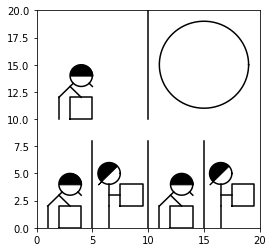

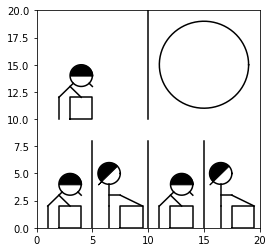

In [62]:
sentence1_book2 = 'The man will open the box.'
#pic1_book2a, pic1_book2b, 
pic1_book2_translation= sentence_to_list(sentence1_book2, 0, 20, 0, 20, query_file_01_book2, 'Chinese' ,False)
print(pic1_book2_translation)

['DT', 'NN', 'MD', 'VB', 'RP', 'DT', 'NN', 'NN']
3
{1: 'man', 6: 'box'}
subject =  man
verb =  pick up
object =  box
time frame = today
{'subject': 'man', 'verb': 'pick up', 'object': 'box'}
subject man
verb = pick up
object= box
will
time =  today
word now becomes pick up


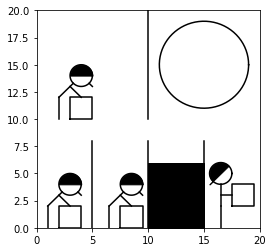

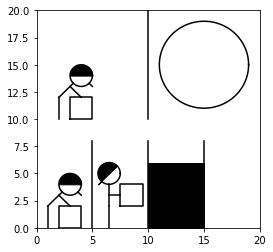

In [48]:
sentence54_book2 = 'The man will pick up the box today.'

pic54_book2_translation= sentence_to_list(sentence54_book2, 0, 20, 0, 20, 'None', 'Chinese',False)

['DT', 'NN', 'MD', 'VB', 'RP', 'DT', 'NN', 'NN']
3
{1: 'man', 6: 'box'}
subject =  man
verb =  pick up
object =  box
time frame = tomorrow
{'subject': 'man', 'verb': 'pick up', 'object': 'box'}
subject man
verb = pick up
object= box
will
time =  tomorrow
word now becomes pick up


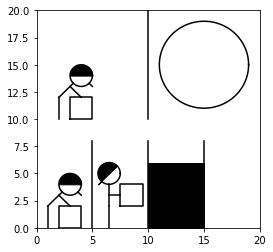

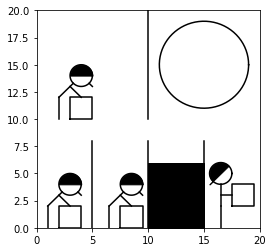

In [49]:
sentence338_book2 = 'The man will pick up the box tomorrow.'
pic338_book2_translation= sentence_to_list(sentence338_book2, 0, 20, 0, 20, 'None', 'Chinese',False)

['DT', 'NN', 'MD', 'VB', 'DT', 'NN']
2
{1: 'man', 5: 'ball'}
subject =  man
verb =  lose
object =  ball
time frame =  
{'subject': 'man', 'verb': 'lose', 'object': 'ball'}
subject man
verb = lose
object= ball
will
time =   


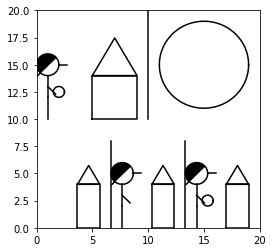

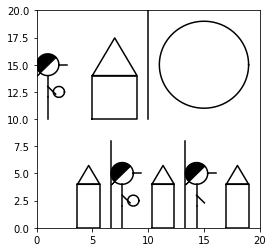

In [50]:
sentence312_book2 = 'The man will lose the ball.'
pic312_book2_translation= sentence_to_list(sentence312_book2, 0, 20, 0, 20, 'None', 'Chinese',False)

['DT', 'NN', 'MD', 'VB', 'RP', 'DT', 'NN']
2
{1: 'man', 6: 'box'}
subject =  man
verb =  pick up
object =  box
time frame =  
{'subject': 'man', 'verb': 'pick up', 'object': 'box'}
subject man
verb = pick up
object= box
time =   
word now becomes pick up


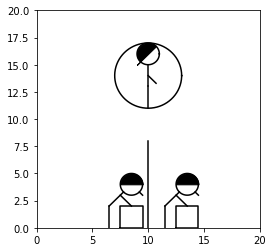

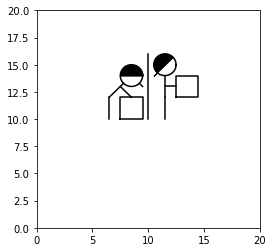

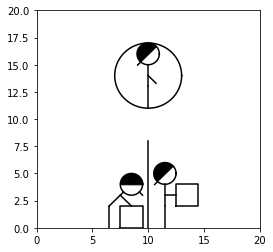

In [51]:
sentence6_book2 = 'The man can pick up the box.'
pic6_book2_translation= sentence_to_list(sentence6_book2, 0, 20, 0, 20, 'None', 'Chinese',False)

['DT', 'NN', 'VBZ', 'JJ']
1
{1: 'man'}
subject =  man
verb =  is
object =  None
time frame =  
{'subject': 'man', 'verb': 'is', 'adjective': 'brave', 'object': None}
adjective = brave
subject man
verb = is
object= None
time =   


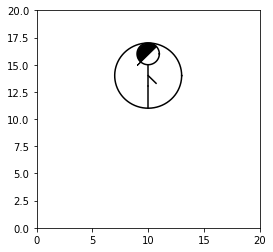

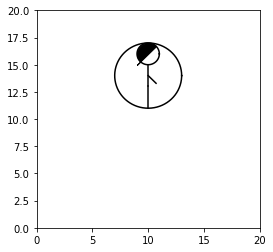

In [52]:
sentence7_book2 = 'The man is brave.'
pic7_book2_translation = sentence_to_list(sentence7_book2, 0, 20, 0, 20, 'None', 'Chinese',False)

['DT', 'NN', 'MD', 'VB', 'RP', 'NN', 'NN']
3
{1: 'man', 5: 'ball'}
subject =  man
verb =  pick up
object =  ball
time frame = today
{'subject': 'man', 'verb': 'pick up', 'object': 'ball'}
subject man
verb = pick up
object= ball
will
time =  today
word now becomes pick up


{'man': '男人', 'will': '将'}

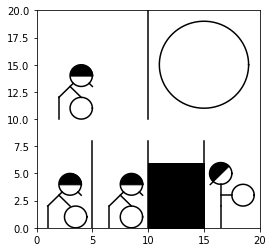

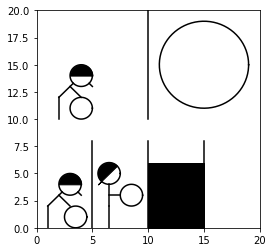

In [53]:
sentence_to_list('a man will pick up a ball today', 0, 20, 0, 20, 'None', 'Chinese',False)

['DT', 'NN', 'MD', 'VB', 'RP', 'NN', 'NN']
3
{1: 'man', 5: 'ball'}
subject =  man
verb =  pick up
object =  ball
time frame = tomorrow
{'subject': 'man', 'verb': 'pick up', 'object': 'ball'}
subject man
verb = pick up
object= ball
will
time =  tomorrow
word now becomes pick up


{'man': '男人', 'will': '将'}

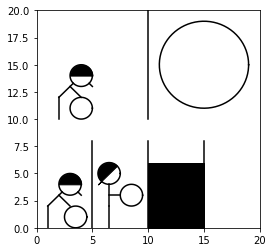

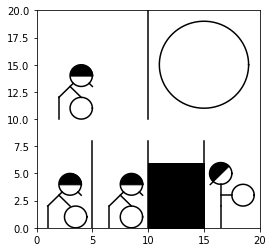

In [54]:
sentence_to_list('a man will pick up a ball tomorrow', 0, 20, 0, 20, 'None', 'Chinese',False)

['DT', 'NN', 'MD', 'VB', 'RP', 'JJ', 'NN', 'NN']
3
{1: 'man', 6: 'flower'}
subject =  man
verb =  pick up
object =  flower
time frame = today
{'subject': 'man', 'verb': 'pick up', 'adjective': 'red', 'object': 'flower'}
adjective = red
color = red
subject man
verb = pick up
object= flower
will
time =  today
word now becomes pick up


{'man': '男人', 'will': '将'}

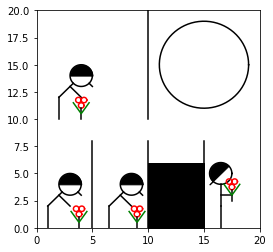

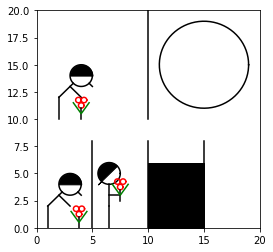

In [55]:
sentence_to_list('a man will pick up a red flower today', 0, 20, 0, 20, 'None', 'Chinese',False)

['DT', 'NN', 'MD', 'VB', 'RP', 'JJ', 'NN', 'NN']
3
{1: 'man', 6: 'flower'}
subject =  man
verb =  pick
object =  flower
time frame = tomorrow
{'subject': 'man', 'verb': 'pick', 'adjective': 'red', 'object': 'flower'}
adjective = red
color = red
subject man
verb = pick
object= flower
will
time =  tomorrow
word now becomes pick up


{'man': '男人', 'will': '将'}

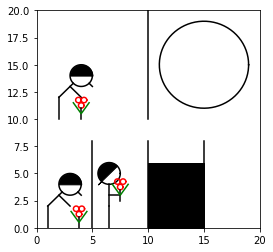

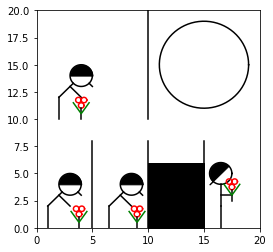

In [38]:
sentence_to_list('a man will pick up a red flower tomorrow', 0, 20, 0, 20, 'None', 'Chinese',False)

['DT', 'NN', 'MD', 'VB', 'RP', 'JJ', 'NN', 'NN']
3
{1: 'man', 6: 'flower'}
subject =  man
verb =  pick up
object =  flower
time frame = today
{'subject': 'man', 'verb': 'pick up', 'adjective': 'yellow', 'object': 'flower'}
adjective = yellow
color = yellow
subject man
verb = pick up
object= flower
will
time =  today
word now becomes pick up


{'man': '男人', 'will': '将'}

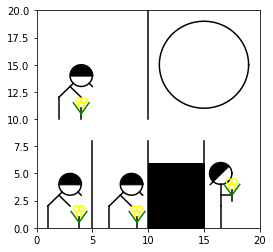

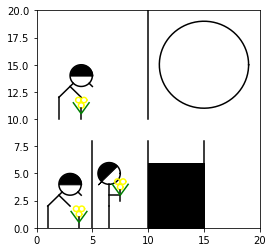

In [56]:
sentence_to_list('a man will pick up a yellow flower today', 0, 20, 0, 20, 'None', 'Chinese',False)

['DT', 'NN', 'MD', 'VB', 'RP', 'JJ', 'NN', 'NN']
3
{1: 'man', 6: 'flower'}
subject =  man
verb =  pick
object =  flower
time frame = tomorrow
{'subject': 'man', 'verb': 'pick', 'adjective': 'yellow', 'object': 'flower'}
adjective = yellow
color = yellow
subject man
verb = pick
object= flower
will
time =  tomorrow
word now becomes pick up


{'man': '男人', 'will': '将'}

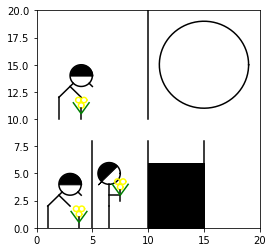

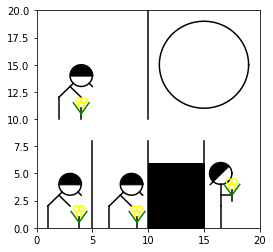

In [40]:
sentence_to_list('a man will pick up a yellow flower tomorrow', 0, 20, 0, 20, 'None', 'Chinese',False)

['DT', 'NN', 'MD', 'VB', 'JJ', 'NN']
2
{1: 'man', 5: 'flower'}
subject =  man
verb =  hold
object =  flower
time frame =  
{'subject': 'man', 'verb': 'hold', 'adjective': 'blue', 'object': 'flower'}
adjective = blue
color = blue
subject man
verb = hold
object= flower
will
time =   


{'man': '男人', 'will': '将'}

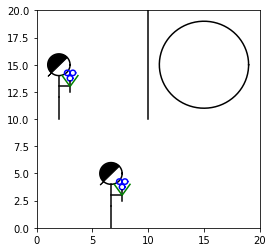

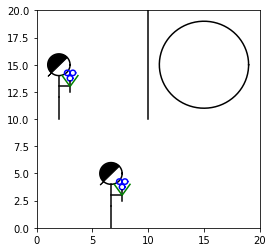

In [57]:
sentence_to_list('a man will hold a blue flower', 0, 20, 0, 20, 'None', 'Chinese',False)